# Лабораторная 1. Очистка набора данных

Отбор признаков - важная задача перед обучением модели машинного обучения. Признаки отбираются чаще всего вручную на основании описательной статистики, тепловой карты, показывающей линейную корреляцию и важности признаков. Никогда не смотрят только на что-то одно, всегда признаки рассматривают с разных сторон.

# Подключение модулей

Для определения важности признаков можно использовать вектор feature_importance, которые строится с помощью Random Forest. При этом для задач регрессии необходимо подключать именно RandomForestRegressor, для задач классификации - RandomForestClassifier также посмотрим PCA

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA


# Загрузка данных (регрессия)

В данной задаче у нас 28 признаков и 2 целевые переменные (G_total и КГФ). И это вносит дополнительную сложность, так как первая целевая переменная с большим количество пропусков.

In [4]:
df = pd.read_excel('1. Data.xlsx', sheet_name='VU')

In [5]:
df

Глубина манометра    Dшт    Руст(ср)  Рзаб(ср)    Pлин(ср)  Руст(кон)  \
0              3576.3   7.94  249.600000     370.1  101.800000      249.0   
1              3576.3   9.53  233.500000     364.6  101.300000      249.0   
2              3576.3  11.11  213.400000     357.1  101.600000      211.0   
3              3576.3  12.70  191.600000     347.4   98.400000      187.0   
4              3576.3  14.29  171.900000     337.7   99.200000      169.0   
..                ...    ...         ...       ...         ...        ...   
88             3284.0  12.70  215.000000     307.8   98.600000      215.0   
89             3284.0  14.29  198.000000     293.6   98.500000      197.0   
90             3288.6   7.94  231.229167     309.1   92.600000      230.0   
91             3288.6  11.11  217.201681     293.9   93.100000      215.0   
92             3289.8   9.53  199.000000     271.0   95.945951      199.0   

    Рзаб(кон)  Рлин(кон)  Туст  Тна шлейфе  ...  \
0       359.6    101.800  53.0        31.7  ...   
1       338.1    102.400  58.8        37.6  ...   
2       314.8    100.600  63.6        42.8  ...   
3       291.5     99.000  64.7        46.2  ...   
4       270.3     99.500  64.0        49.4  ...   
..        ...        ...   ...         ...  ...   
88      308.1     97.200  65.0        45.8  ...   
89      293.9     98.400  66.9        49.8  ...   
90      307.1     92.700  51.0         NaN  ...   
91      293.9     93.300  60.0         NaN  ...   
92      272.3     94.637  56.0         NaN  ...   

    Рпл. Тек (послед точка на КВД)  Рпл. Тек (Расчет по КВД)  \
0                            45.25                      56.5   
1                            45.25                      56.5   
2                            45.25                      56.5   
3                            45.25                      56.5   
4                            45.25                      56.5   
..                             ...                       ...   
88                           35.28                      40.5   
89                           35.28                      40.5   
90                           33.21                       NaN   
91                           33.21                       NaN   
92                             NaN                      39.9   

    Рпл. Тек (Карноухов)   Pсб      Ro_g   Ro_c    Ro_w  \
0                    NaN  93.6  0.806017  801.0  1000.0   
1                    NaN  92.9  0.806017  801.0  1000.0   
2                    NaN  91.4  0.806017  801.0  1000.0   
3                    NaN  89.2  0.806017  801.0  1000.0   
4                    NaN  89.7  0.806017  801.0  1000.0   
..                   ...   ...       ...    ...     ...   
88                  41.6  94.4       NaN  782.0     NaN   
89                  41.6  94.0       NaN  782.0     NaN   
90                   NaN  89.9       NaN  779.6     NaN   
91                   NaN  90.8       NaN  779.6     NaN   
92                   NaN  94.0       NaN  772.6     NaN   

    Удельная плотность газа    G_total       КГФ  
0                   0.669449  2.782623  311.9094  
1                   0.669449  3.697781  288.6003  
2                   0.669449  4.515073  248.7906  
3                   0.669449  5.217673  223.5591  
4                   0.669449  5.765092  215.1486  
..                       ...       ...       ...  
88                  0.660000       NaN  153.0000  
89                  0.660000       NaN  147.0000  
90                  0.668000       NaN  182.0000  
91                  0.668000       NaN  145.0000  
92                  0.671000       NaN  139.0000  

[93 rows x 30 columns]

# Описательная статистика

Описательная статистика для непрерывных и категориальных признаках отличается.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Руст(ср)                        93 non-null     float64
 3   Рзаб(ср)                        90 non-null     float64
 4   Pлин(ср)                        93 non-null     float64
 5   Руст(кон)                       93 non-null     float64
 6   Рзаб(кон)                       90 non-null     float64
 7   Рлин(кон)                       93 non-null     float64
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      60 non-null     float64
 10  Тзаб                            90 non-null     float64
 11  Tлин                            93 non-null     float64
 12  Дебит газа(ст)                  93 non

In [7]:
df.describe()

Глубина манометра        Dшт    Руст(ср)    Рзаб(ср)    Pлин(ср)  \
count          90.000000  93.000000   93.000000   90.000000   93.000000   
mean         3524.086667  10.951183  228.293412  331.762255   99.860962   
std           144.474862   2.423172   41.897238   56.481235    7.300663   
min          3276.000000   6.350000  138.157895  174.000000   73.306638   
25%          3427.625000   9.530000  201.636750  297.797500   95.945951   
50%          3579.000000  11.110000  229.894737  337.789172  100.800000   
75%          3652.250000  12.700000  252.000000  364.150000  103.865199   
max          3670.000000  15.880000  337.108108  458.600000  121.682930   

        Руст(кон)   Рзаб(кон)   Рлин(кон)       Туст  Тна шлейфе  ...  \
count   93.000000   90.000000   93.000000  93.000000   60.000000  ...   
mean   227.837817  330.334444   98.005453  56.172043   43.091667  ...   
std     41.814527   56.357493   12.425851  11.250781   19.602337  ...   
min    136.000000  174.000000   40.739839  24.200000   14.000000  ...   
25%    200.000000  294.625000   95.335032  50.300000   33.300000  ...   
50%    228.000000  334.250000  100.260000  58.000000   38.700000  ...   
75%    252.000000  362.150000  104.000000  64.000000   46.375000  ...   
max    333.000000  458.500000  123.616800  75.000000  110.200000  ...   

       Рпл. Тек (послед точка на КВД)  Рпл. Тек (Расчет по КВД)  \
count                       88.000000                 81.000000   
mean                        40.682881                 50.943684   
std                          5.374353                  4.378416   
min                         29.170000                 39.900000   
25%                         37.210000                 48.300000   
50%                         39.466050                 50.800000   
75%                         42.860000                 55.400000   
max                         53.270000                 56.700000   

       Рпл. Тек (Карноухов)         Pсб       Ro_g        Ro_c    Ro_w  \
count             64.000000   93.000000  23.000000   93.000000    23.0   
mean              50.773438   95.162366   0.807631  780.847527  1000.0   
std                4.006591    5.136060   0.015076   62.795111     0.0   
min               41.600000   85.500000   0.787416  186.000000  1000.0   
25%               49.425000   90.700000   0.787416  782.000000  1000.0   
50%               50.900000   94.200000   0.806017  787.000000  1000.0   
75%               52.700000   99.800000   0.821344  793.700000  1000.0   
max               56.800000  104.000000   0.824330  801.000000  1000.0   

       Удельная плотность газа     G_total         КГФ  
count                 93.000000  23.000000   93.000000  
mean                   0.665260   5.742359  201.705968  
std                    0.020485   2.112717   49.253925  
min                    0.570000   2.782623  131.000000  
25%                    0.660000   4.381813  164.000000  
50%                    0.667000   5.250915  192.000000  
75%                    0.679000   6.125723  224.000000  
max                    0.684660  10.931155  385.415949  

[8 rows x 30 columns]

Стандартные функции pandas не выводят всю необходимую описательную статистику, поэтому создадим свою таблицу с описательной статистикой. Для удобства закрасим признаки с единичной мощностью и большим количеством пропусков, чтобы потом их было легче удалить.

In [8]:
C=len(df.columns)
L=len(df.index)
CN=df.count() #количество
NP=((L-CN)/L)*100 #процент пропущенных значений
MN=df.min() #минимум
Q1=df.quantile(q=0.25) #первый квартиль
MA=df.mean() #среднее значение
ME=df.median() #медиана
Q3=df.quantile(q=0.75) #третий квартиль
MX=df.max() #максимум
ST=df.std() #стандартное отклонение
P=df.nunique() #мощность
IQ=Q3-Q1 #интерквартильный размах

In [9]:
frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
f1

Удалим признаки, у которых мощность равна 1 и пропусков слишком много

In [8]:
df=df.drop(['Ro_g', 'Ro_w'], axis=1)

# Тепловая карта

# Распределения

<Axes: >

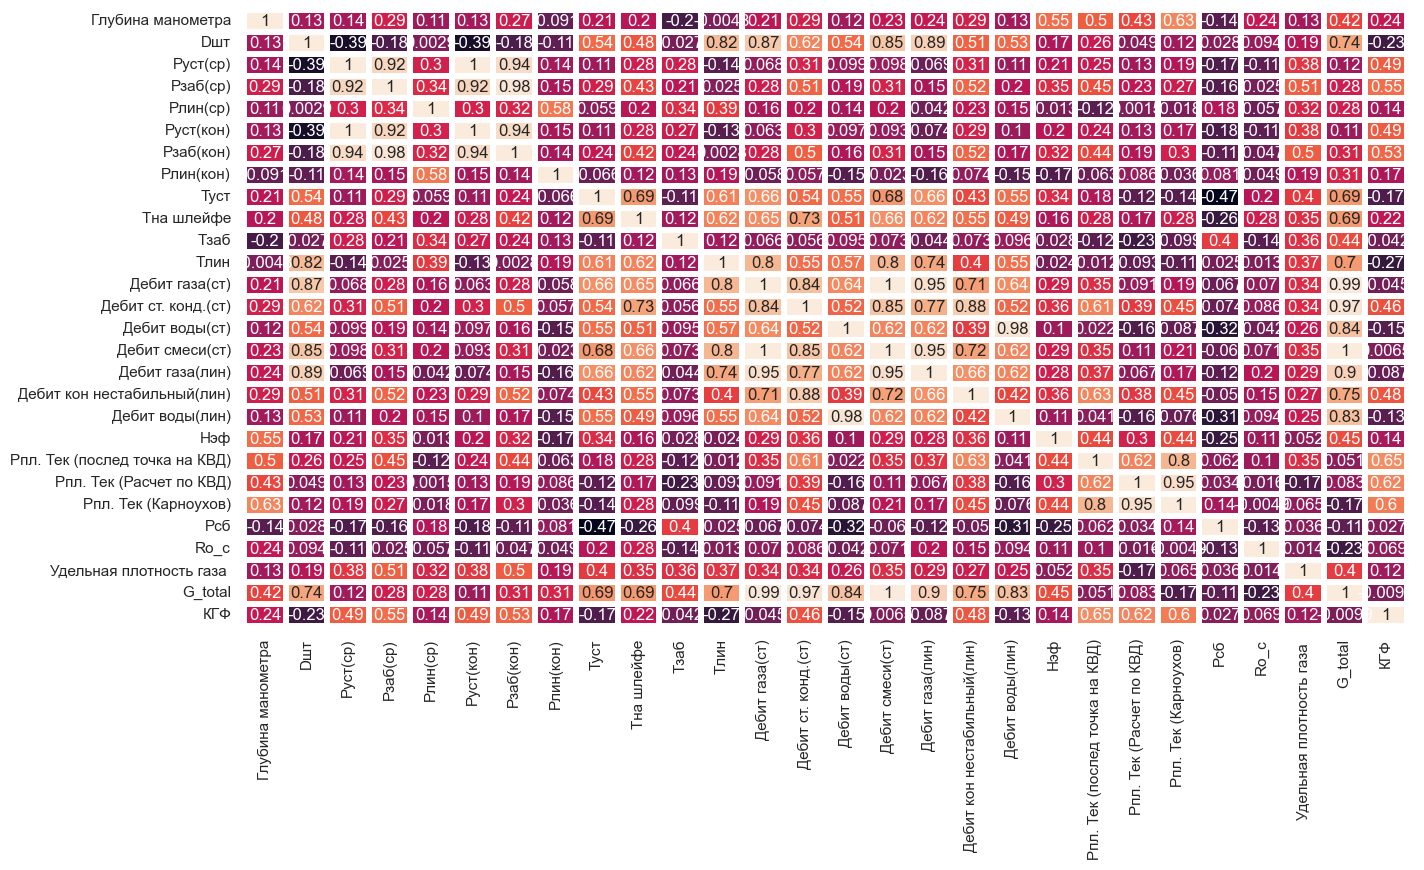

In [9]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True, linewidths=3, cbar=False)

In [10]:
df.columns[27]

'КГФ'

/Users/vladimirnikitin/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Глубина манометра                 2.349088e-03
Dшт                               5.347684e-06
Руст(ср)                          3.731477e-04
Рзаб(ср)                          2.223752e-03
Pлин(ср)                          9.790748e-03
Руст(кон)                         2.761107e-03
Рзаб(кон)                         2.229093e-03
Рлин(кон)                         5.751059e-03
Туст                              2.784806e-03
Тна шлейфе                        1.456725e-03
Тзаб                              2.009969e-02
Tлин                              8.352135e-03
Дебит газа(ст)                    1.133519e-03
Дебит ст. конд.(ст)               3.765909e-02
Дебит воды(ст)                    1.455449e-03
Дебит смеси(ст)                   5.130395e-05
Дебит газа(лин)                   8.963906e-05
Дебит кон нестабильный(лин)       3.078496e-03
Дебит воды(лин)                   4.948813e-04
Нэф                               1.032829e-03
Рпл. Тек (послед точка на КВД)    8.059031e-01
Рпл. Тек (Рас

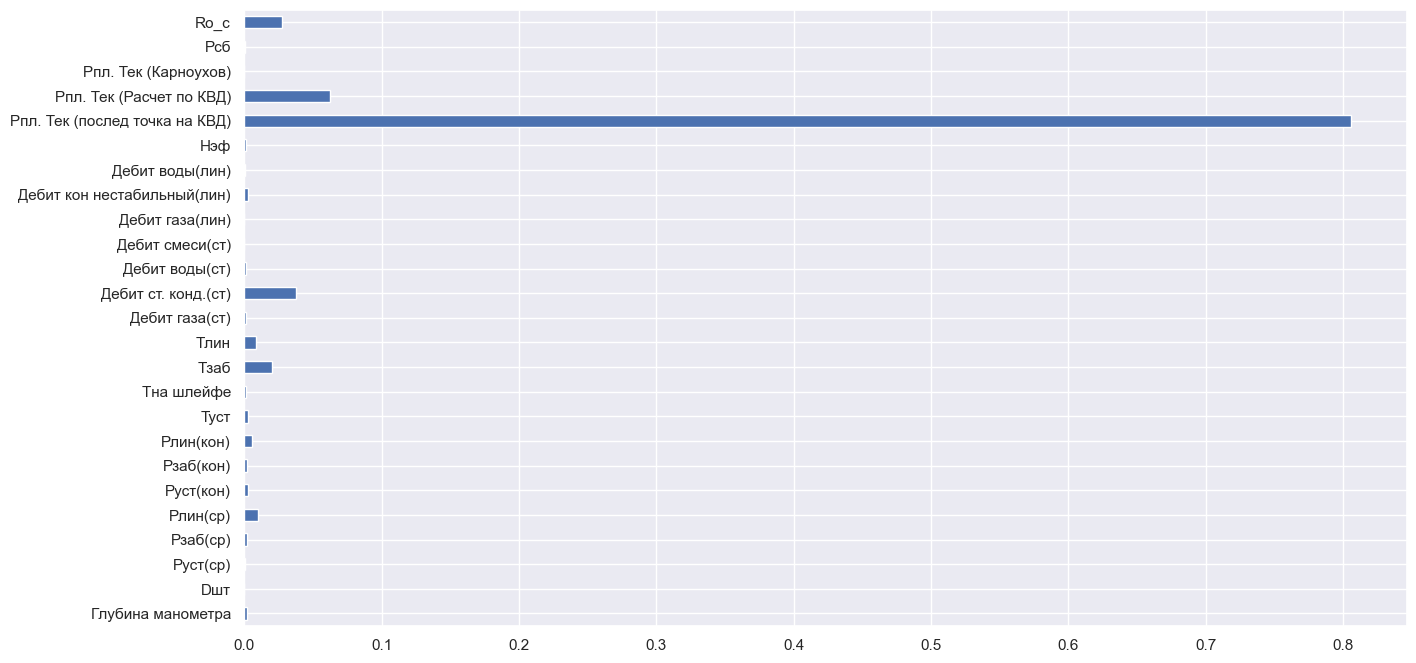

In [11]:
df1=df.fillna(-100)
X=df1.iloc[:, 0:25]
Y=df1.iloc[:, 26:27]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
feat_importances

In [13]:
#PCA не работает с nan поэтому заполним это дело медианой
import numpy as np

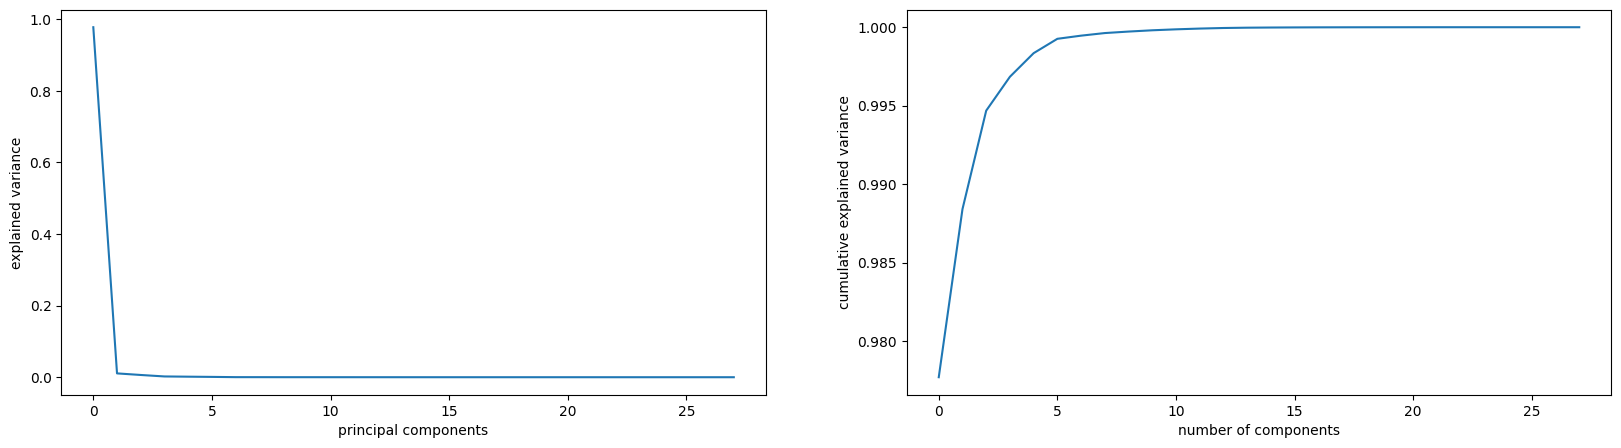

In [17]:
feat = df.drop(['G_total', 'КГФ'], axis = 1)
for f in feat.columns:
    feat[f] = feat[f].fillna(feat[f].median())
pca = PCA(svd_solver='randomized', random_state=123) #instant
pca.fit(feat)
fig = plt.figure(figsize = (20,5))
ax = plt.subplot(121)
plt.plot(pca.explained_variance_ratio_) 
plt.xlabel('principal components')
plt.ylabel('explained variance')
ax2 = plt.subplot (122)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Этот инструмент плохо сработал и мы пойдем разбираться ручками итерационн, в чем же дело и что оставляем

Построим графики распределения значений признаков. Дополнительно покажем линиями первый и третий квартили, медиану и среднее. Также выведем пороги отсечения выбросов по интерквартильному размаху.
Единственный выброс, который здесь можно гарантированно увидеть, это слева у признака "Ro_c"

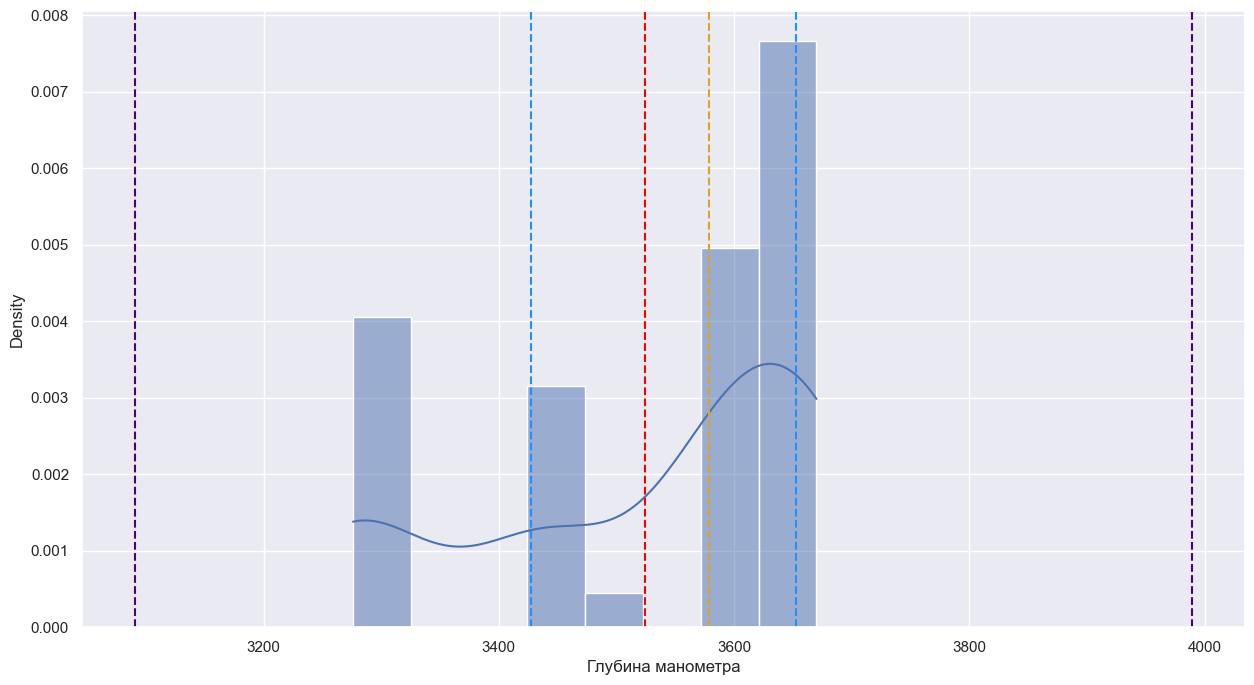

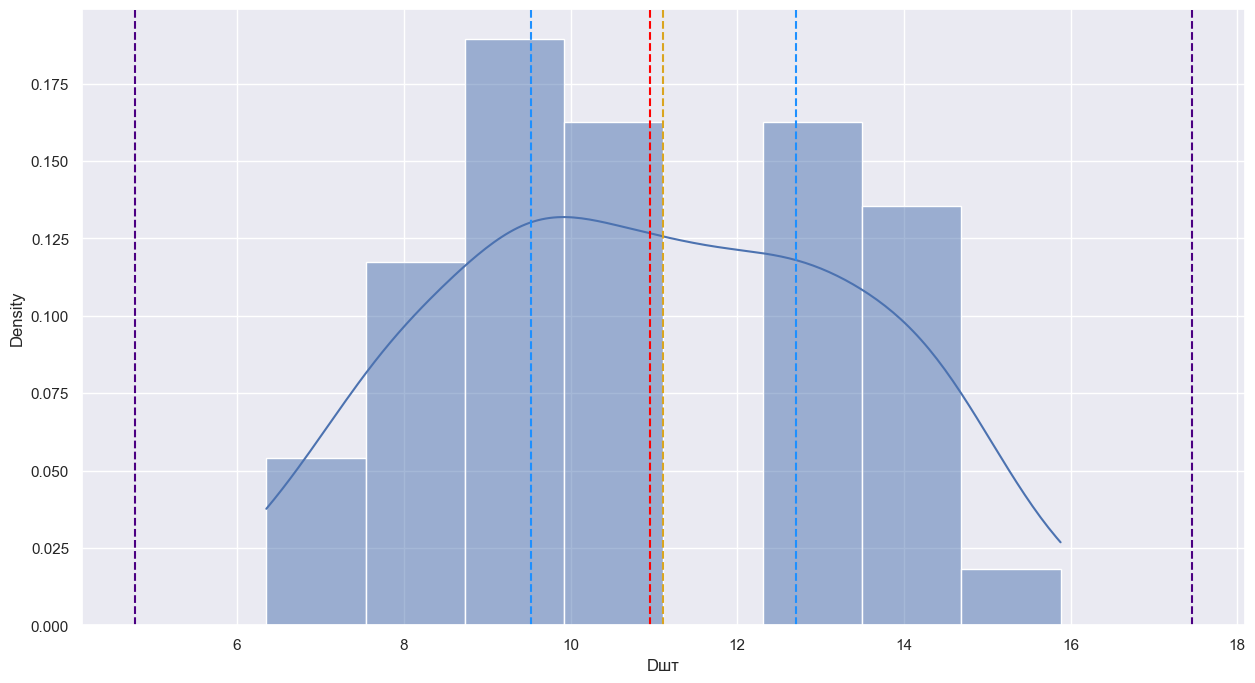

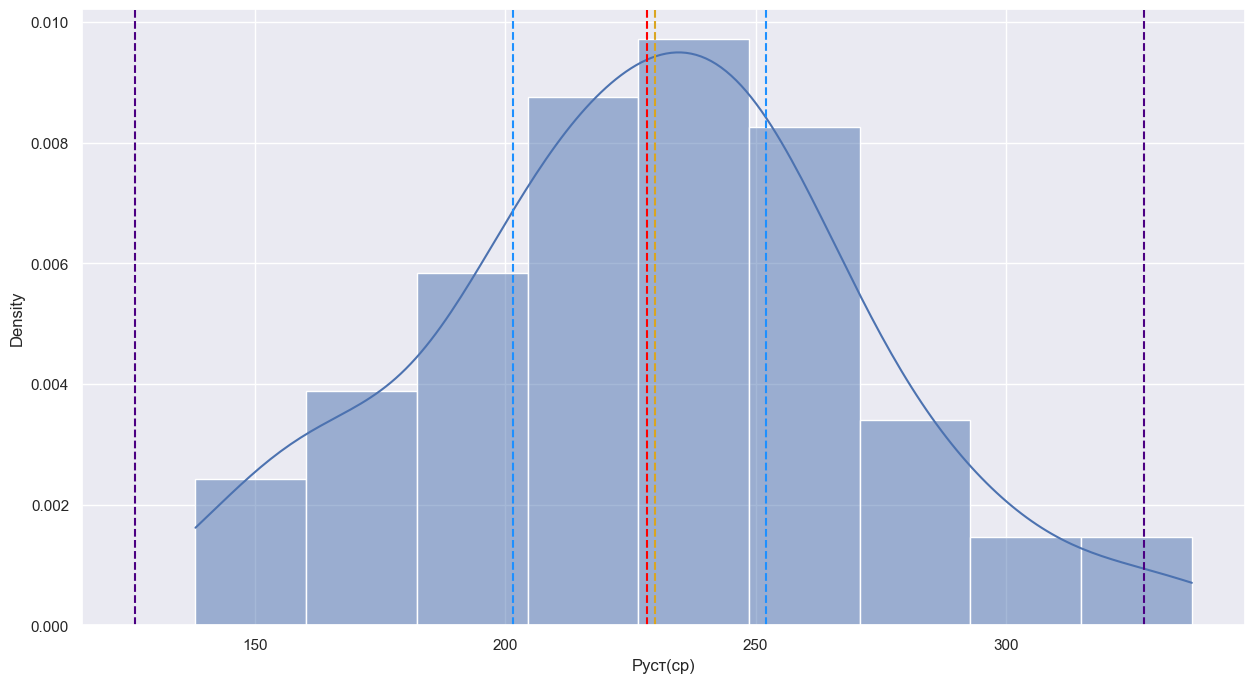

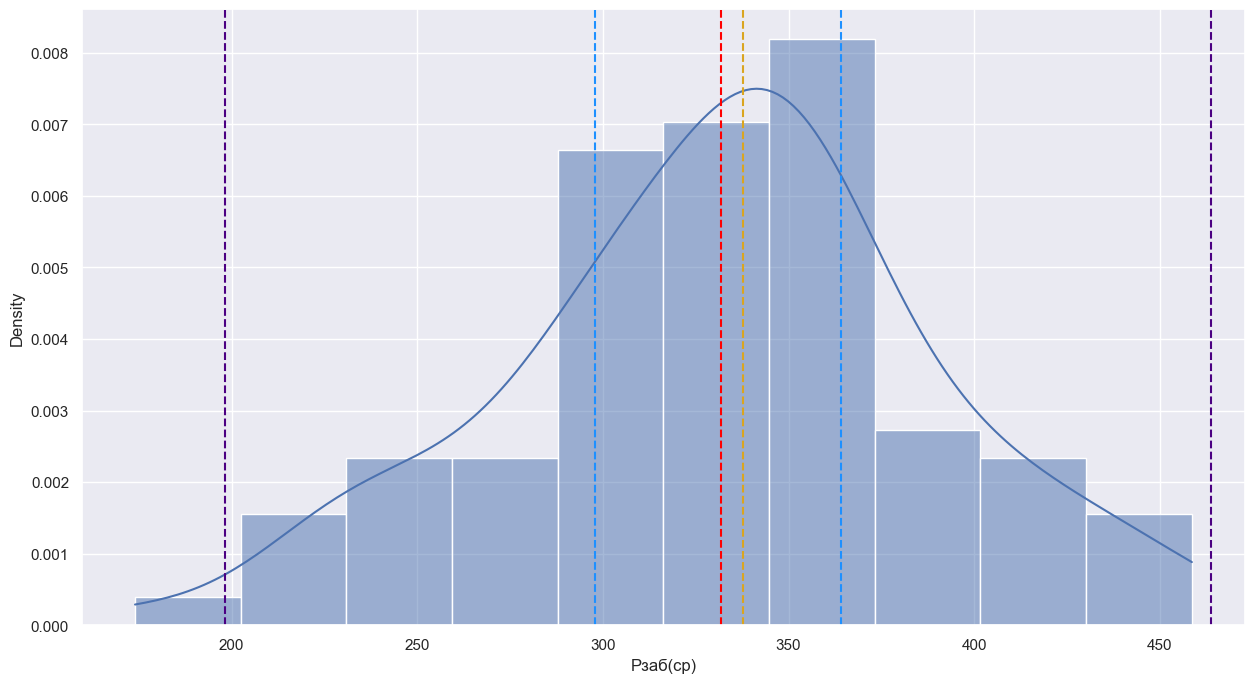

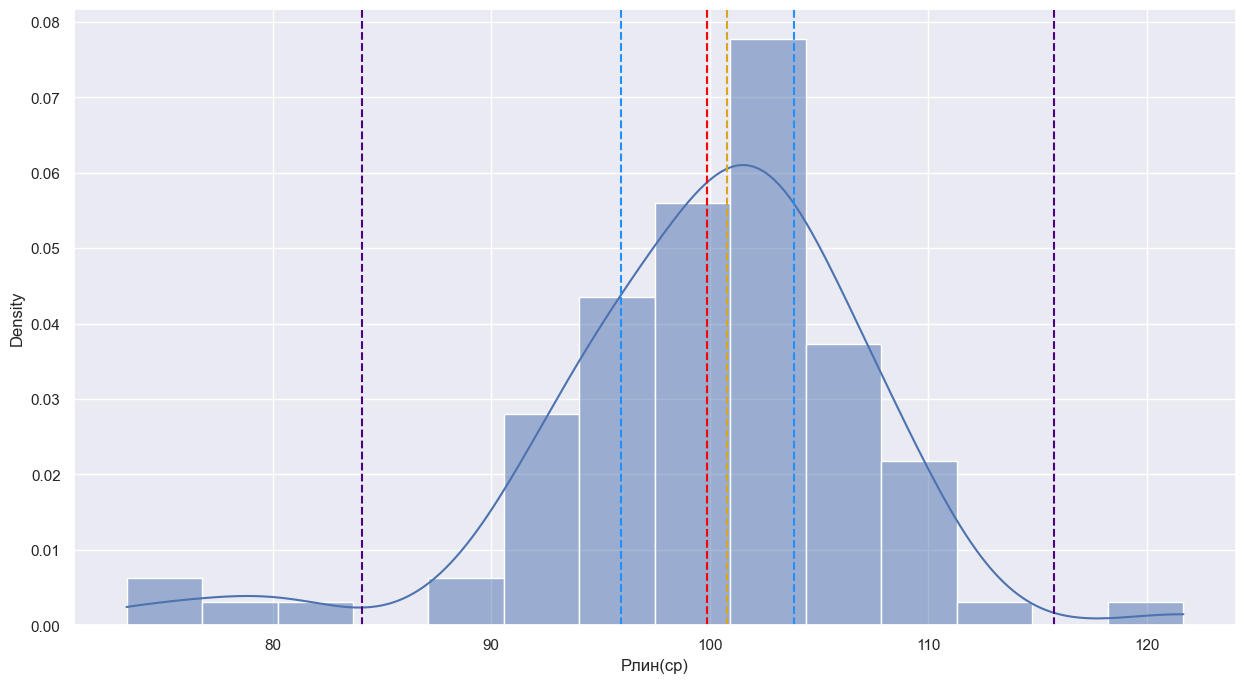

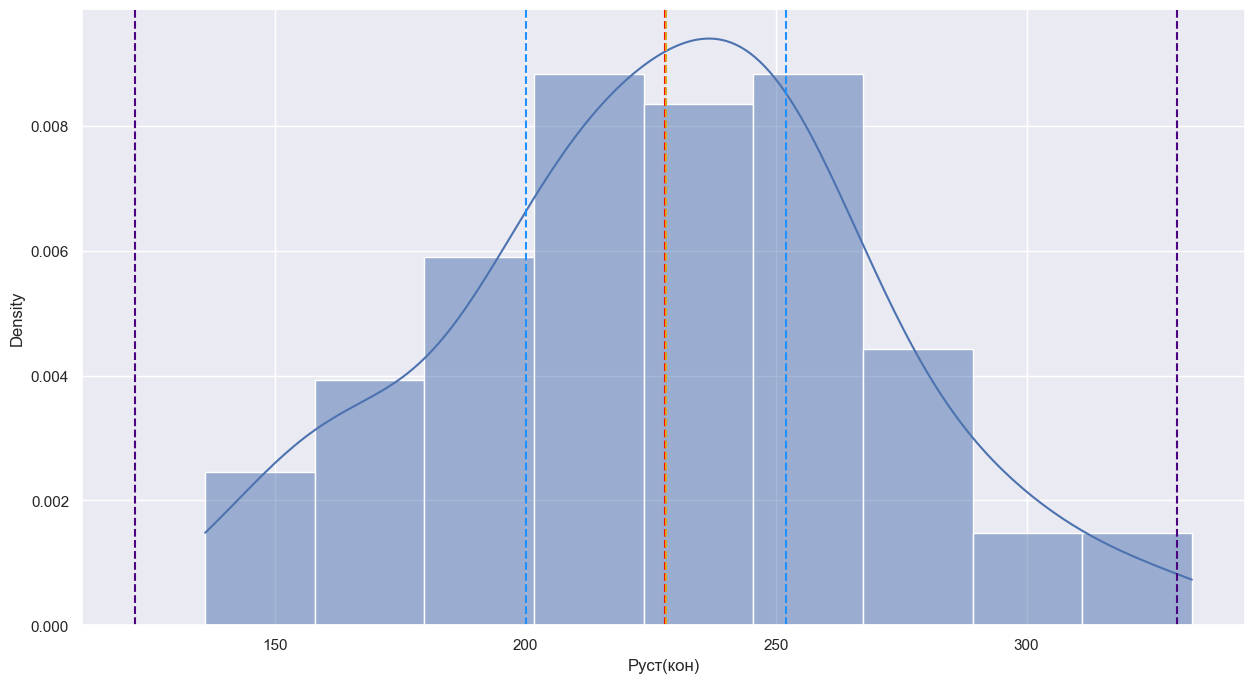

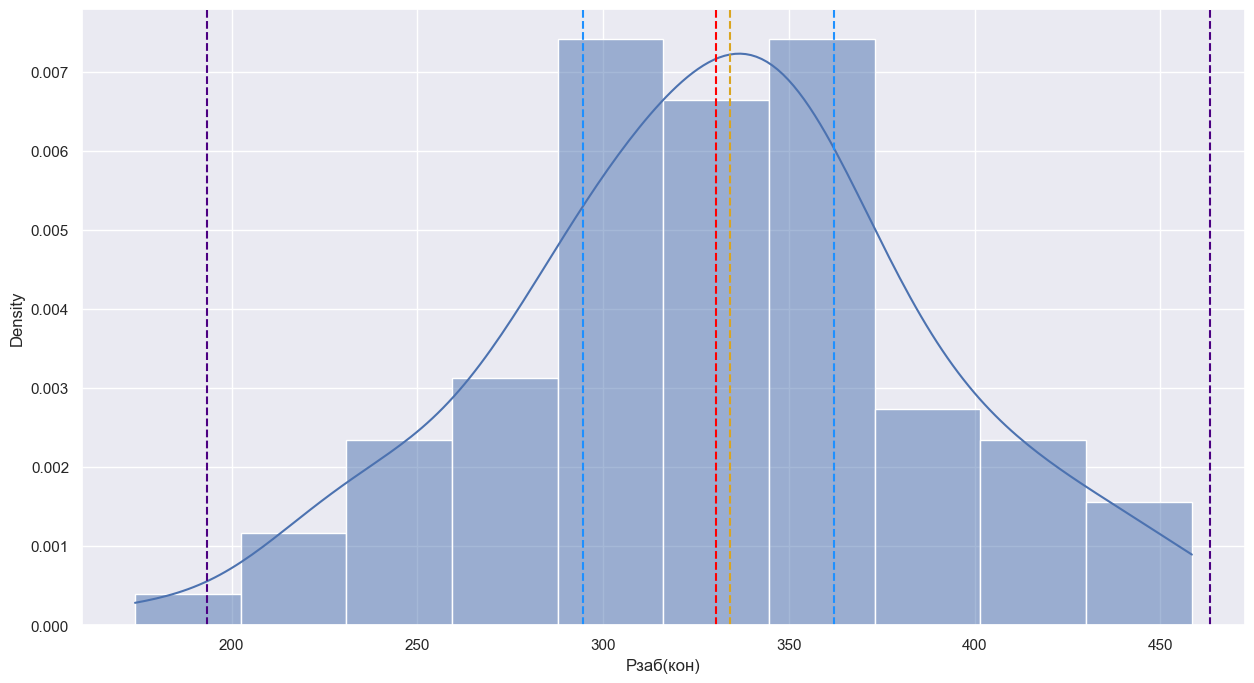

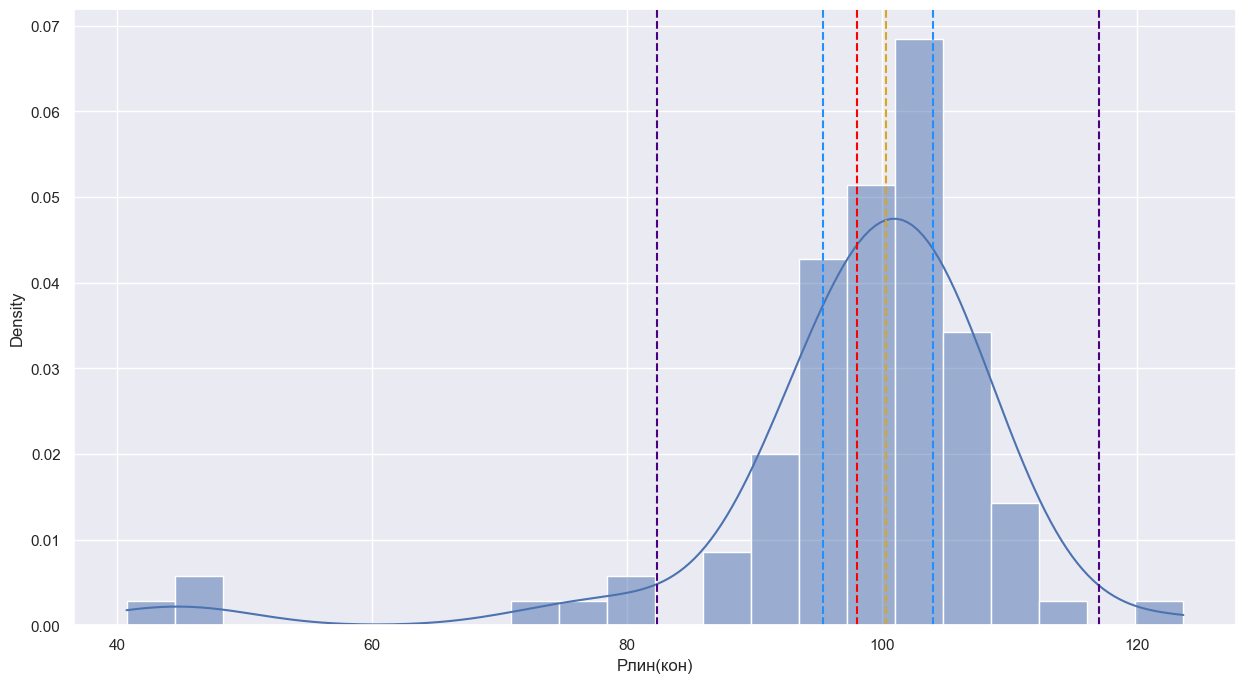

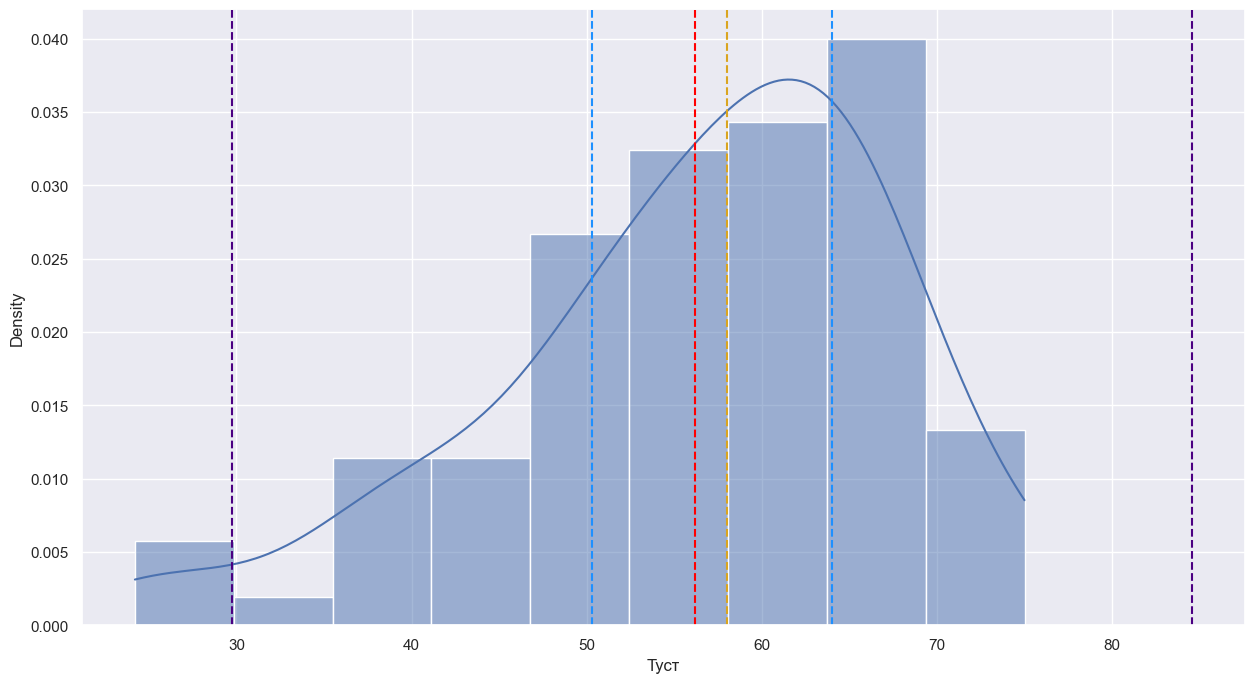

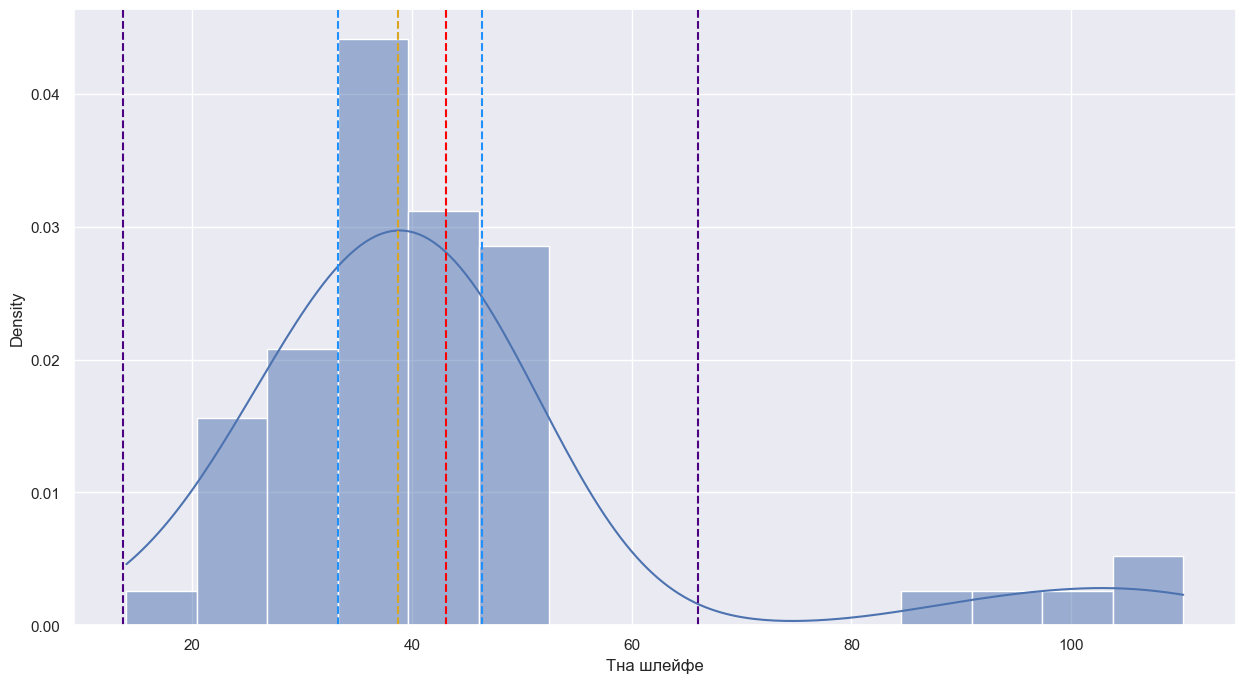

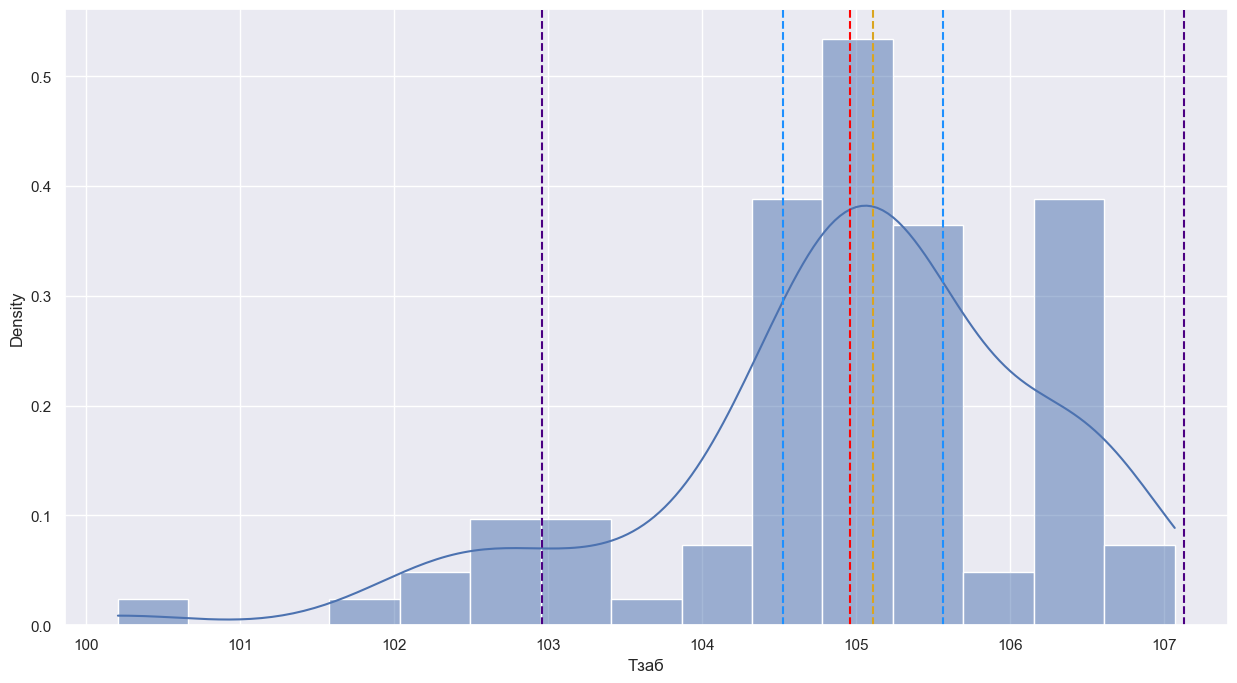

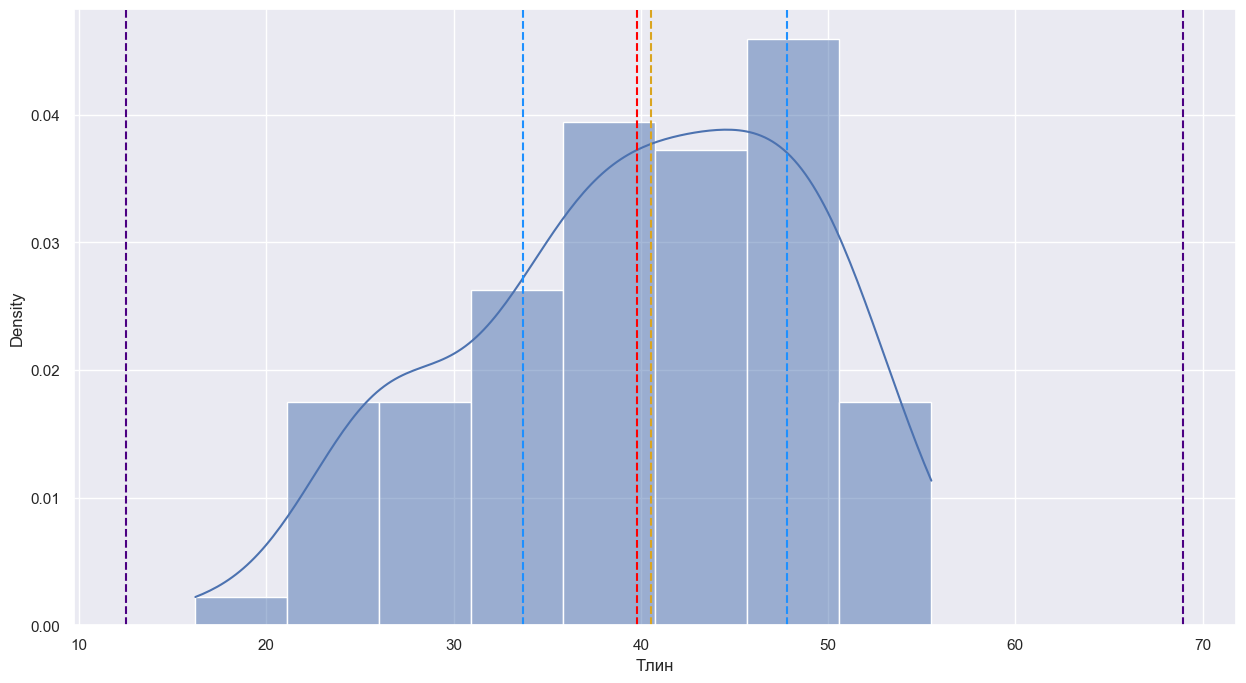

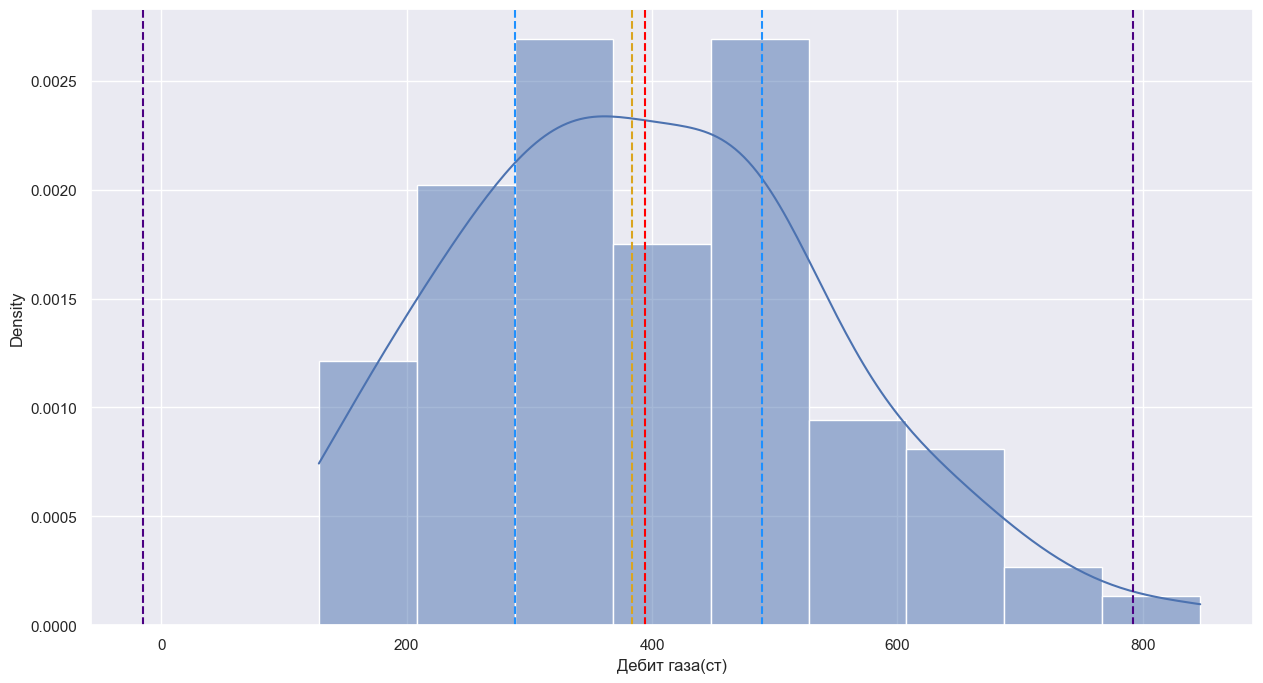

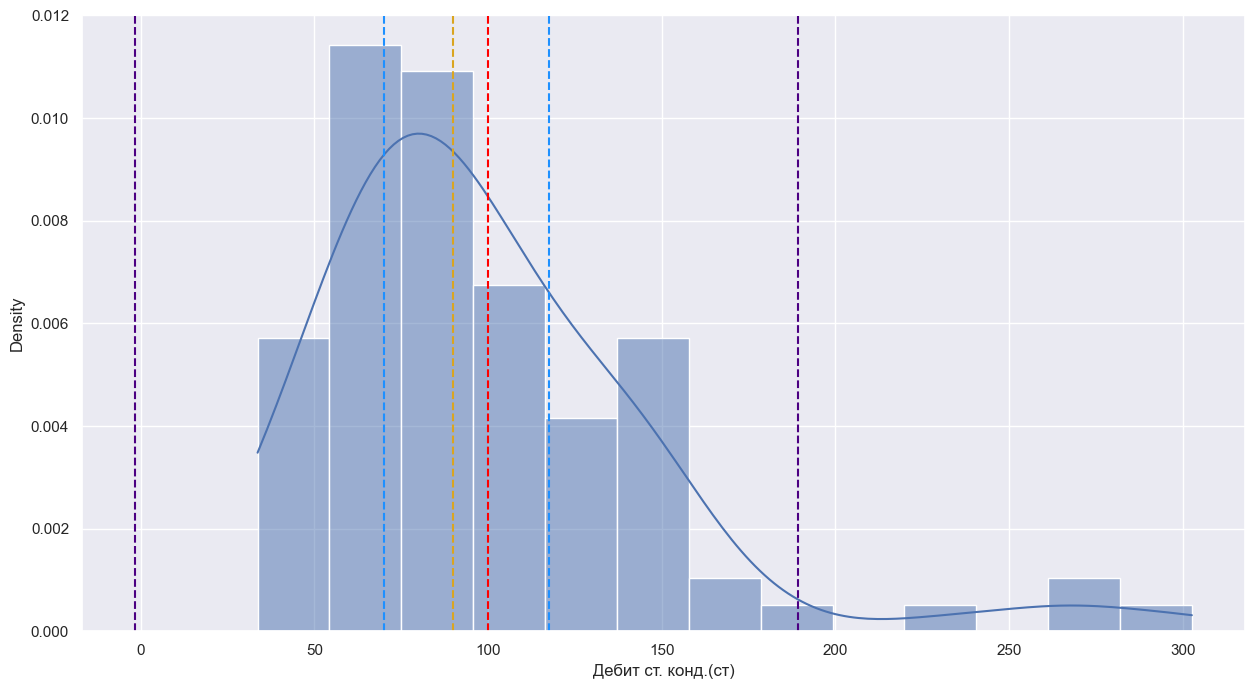

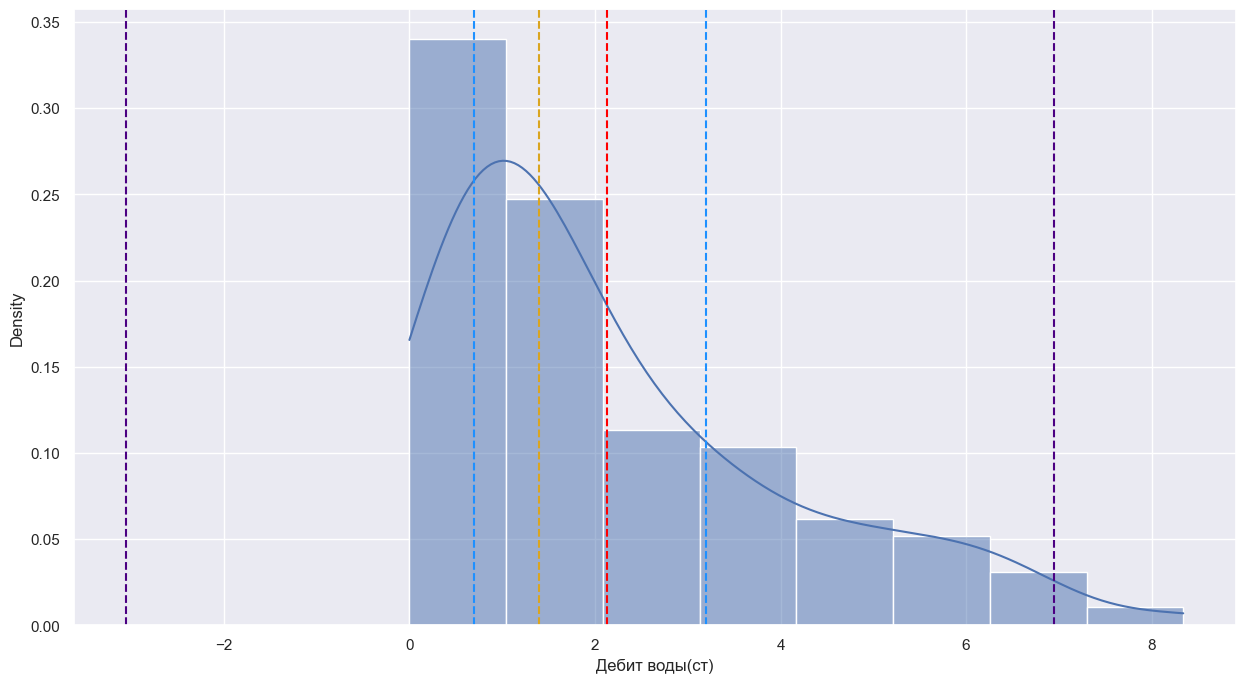

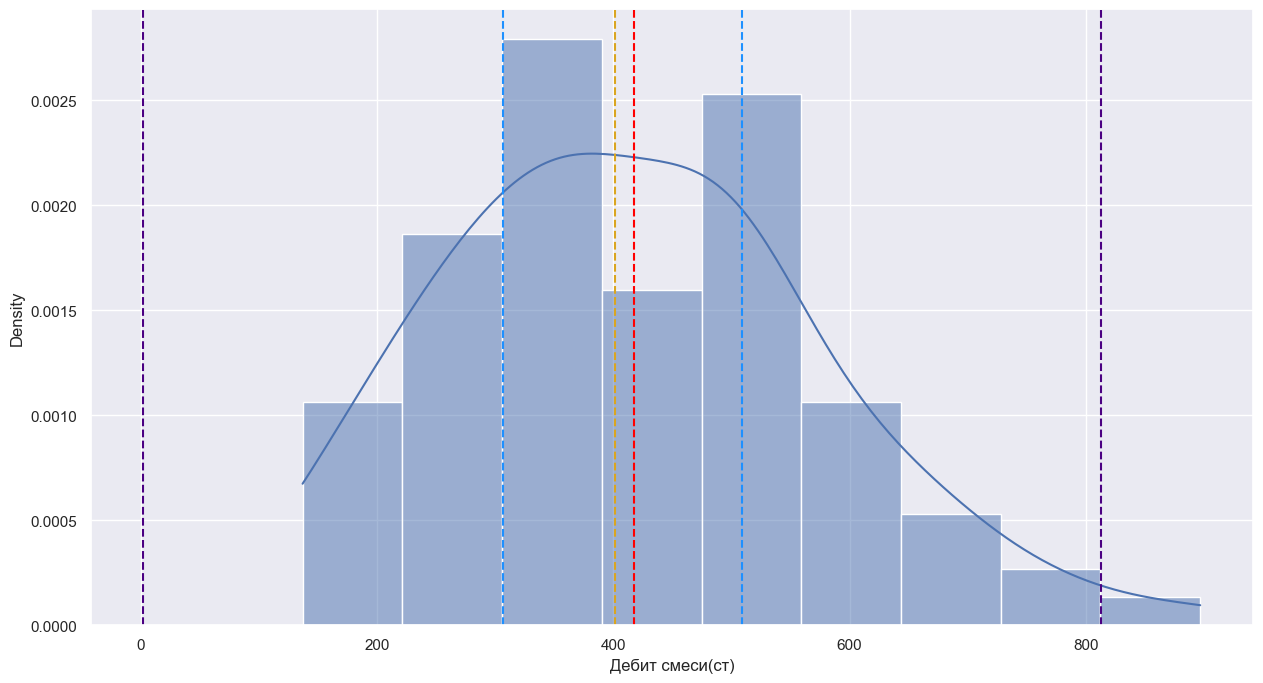

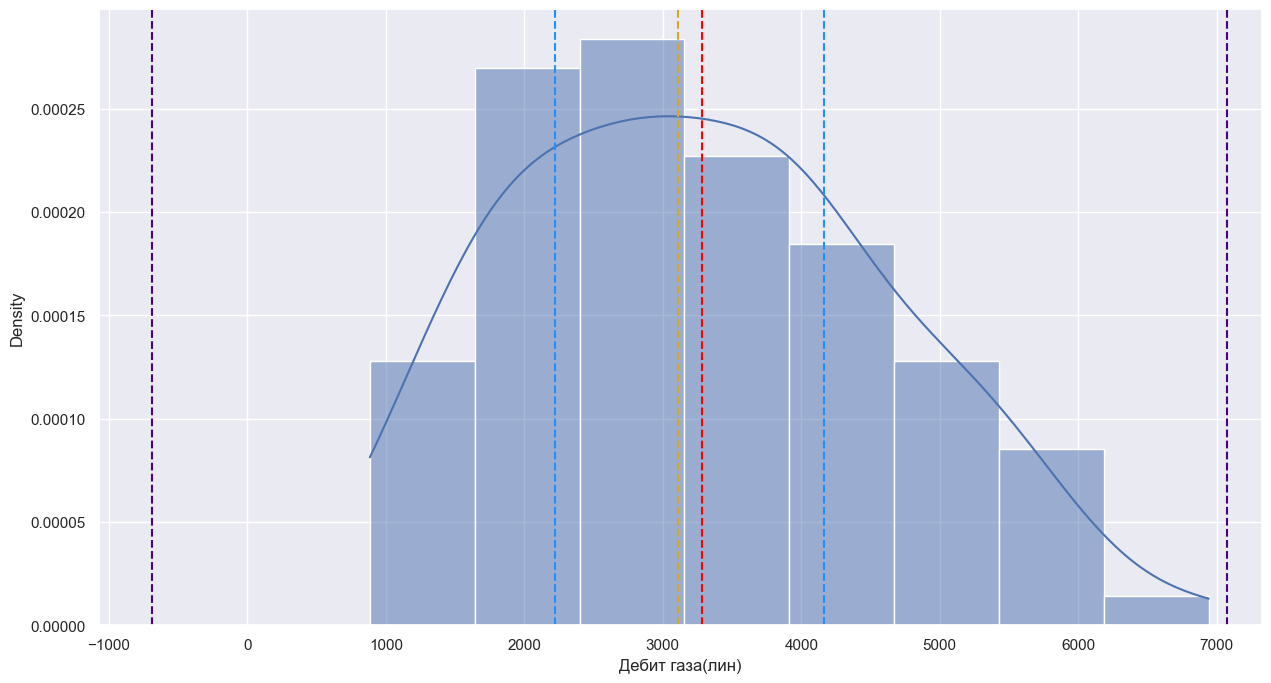

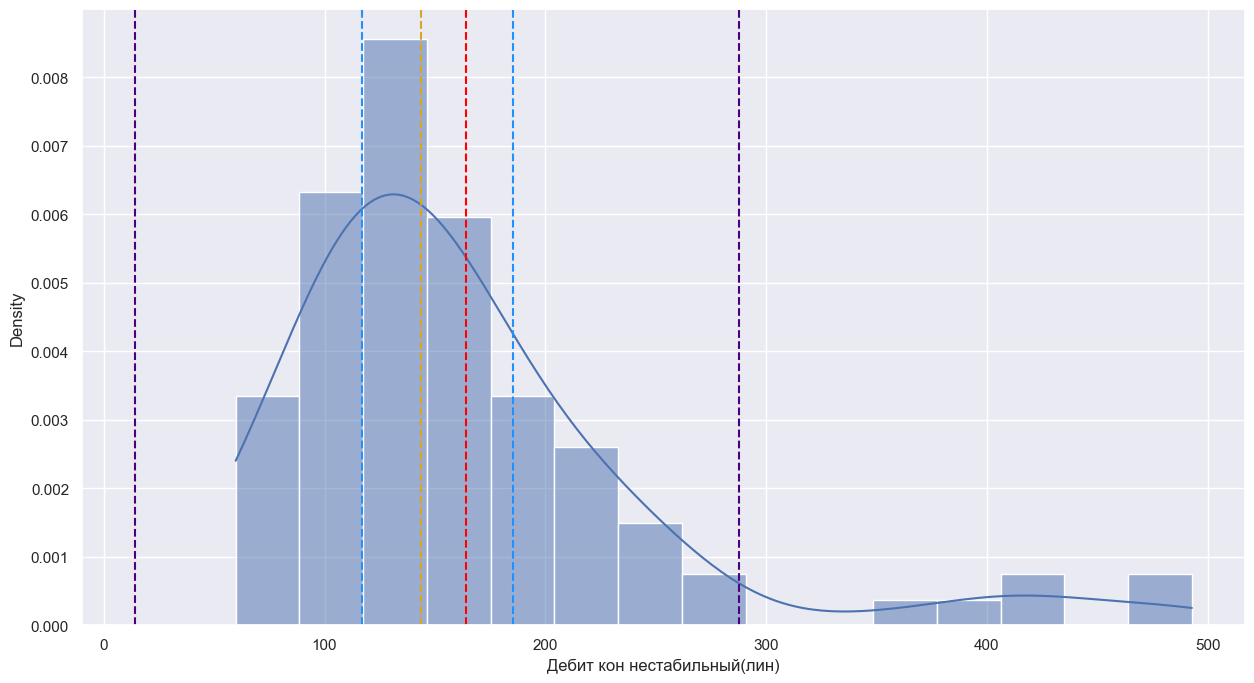

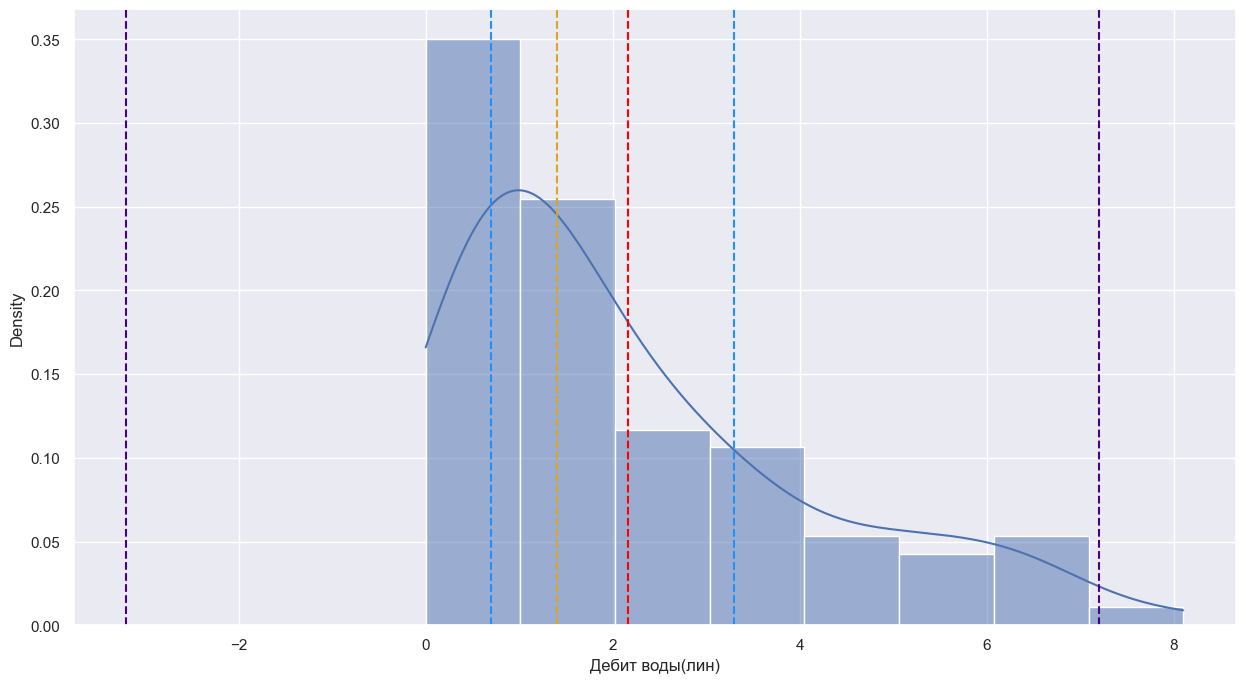

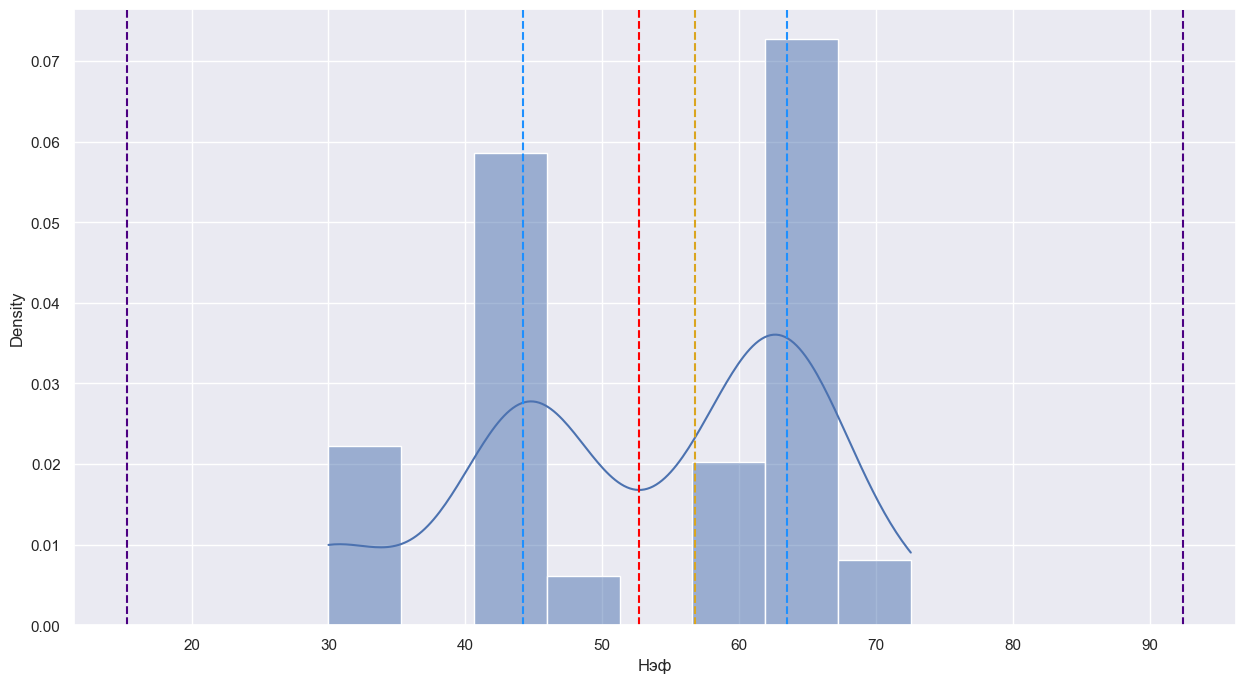

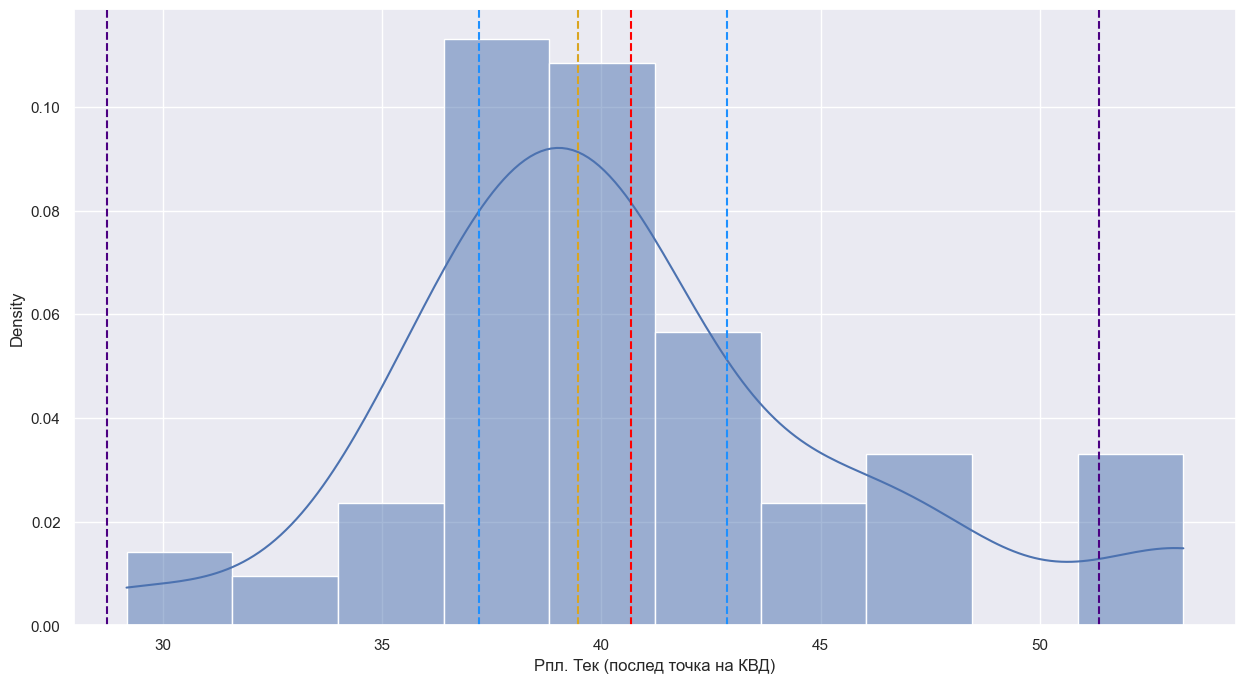

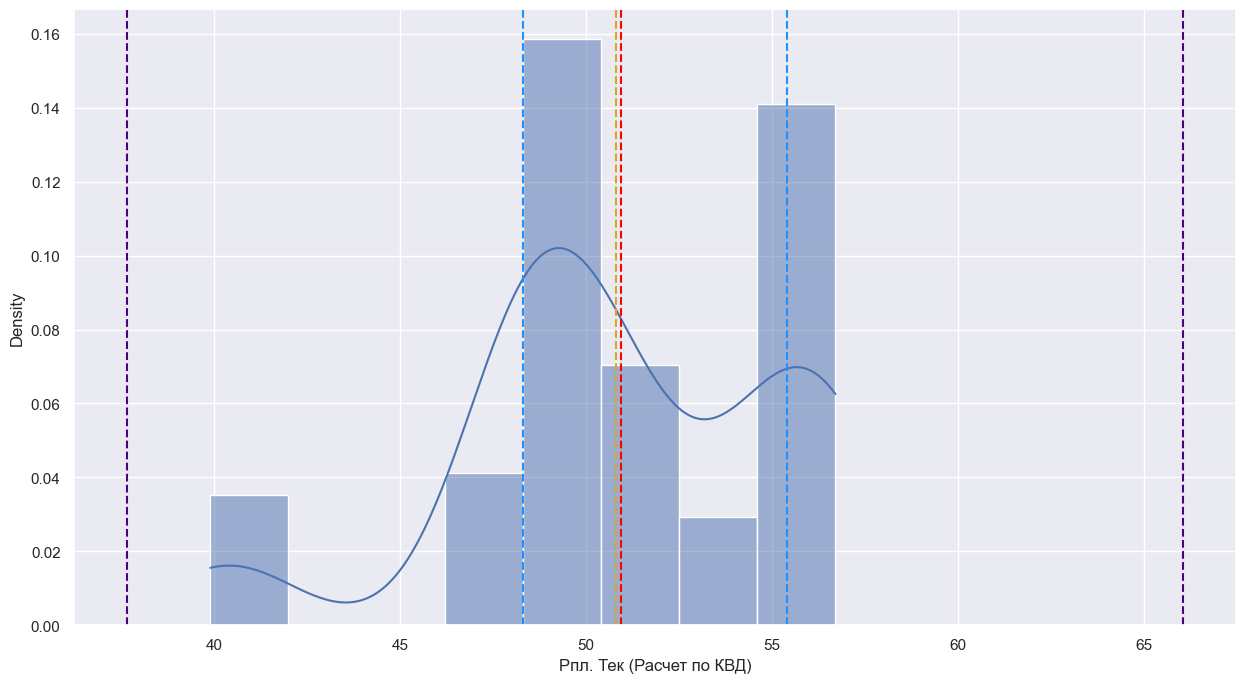

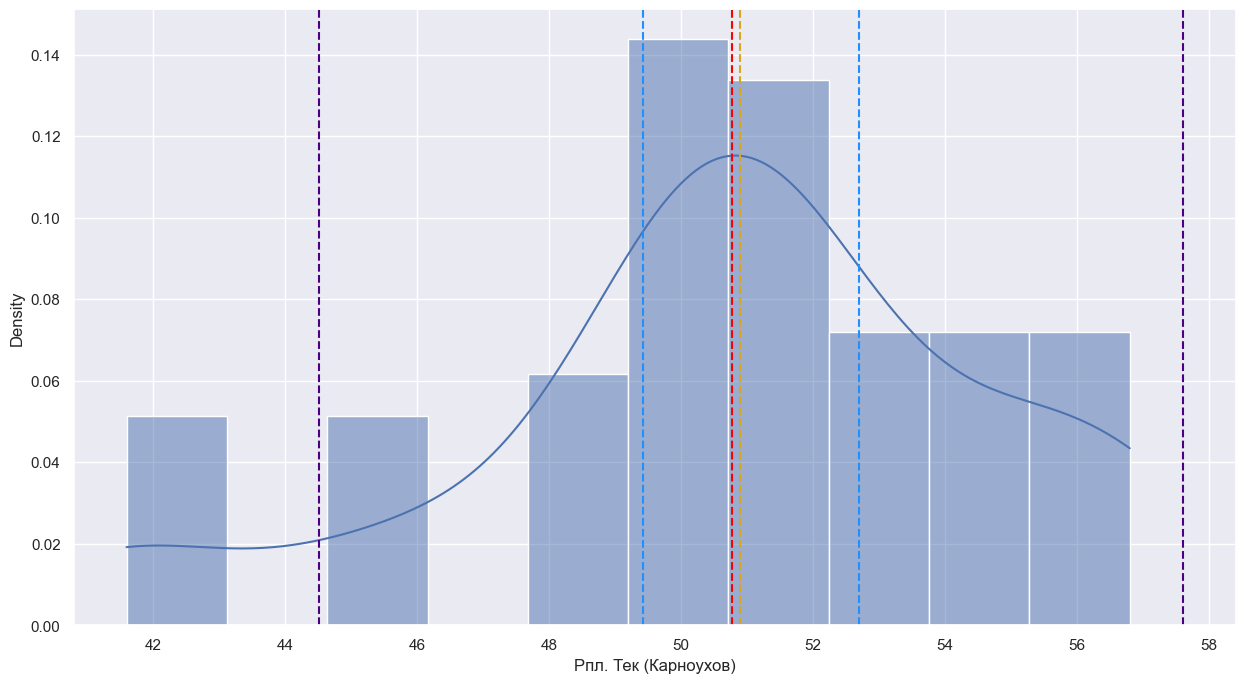

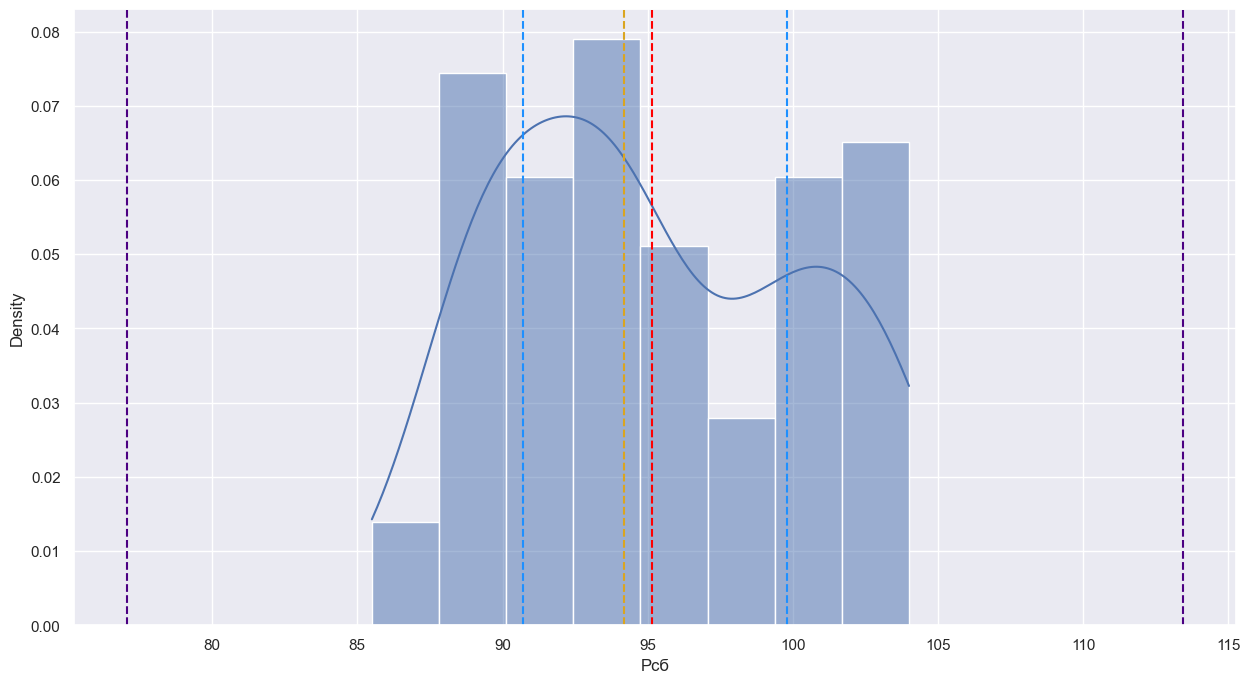

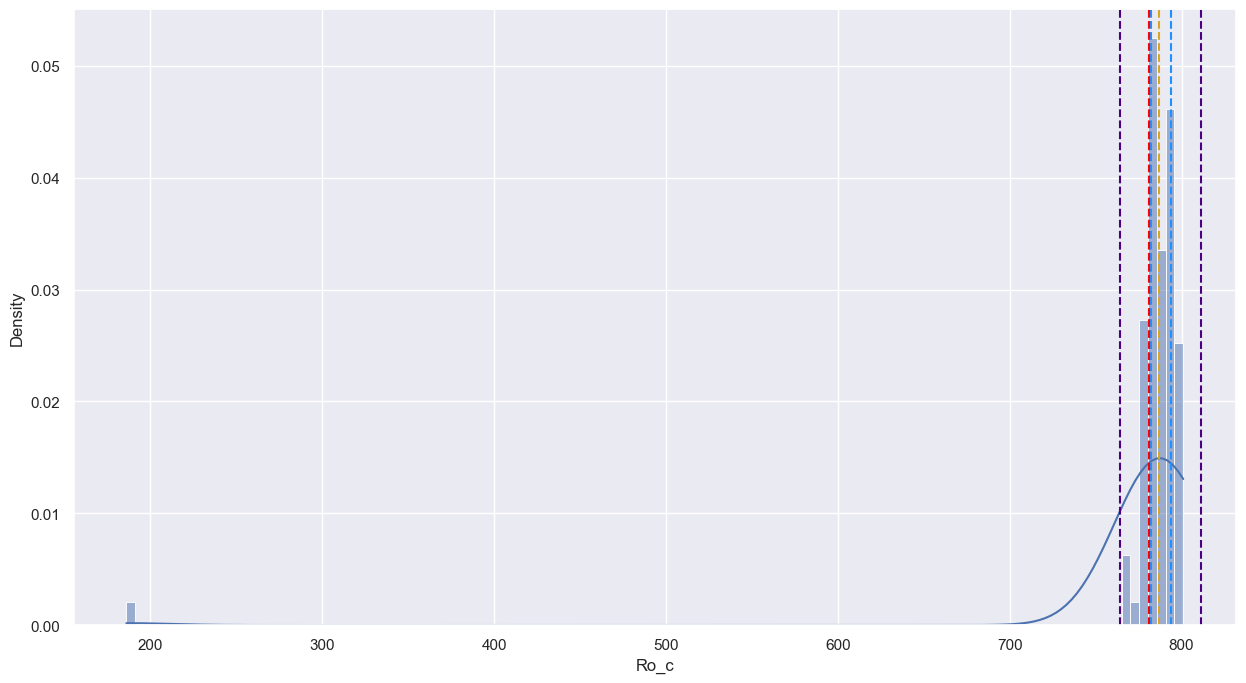

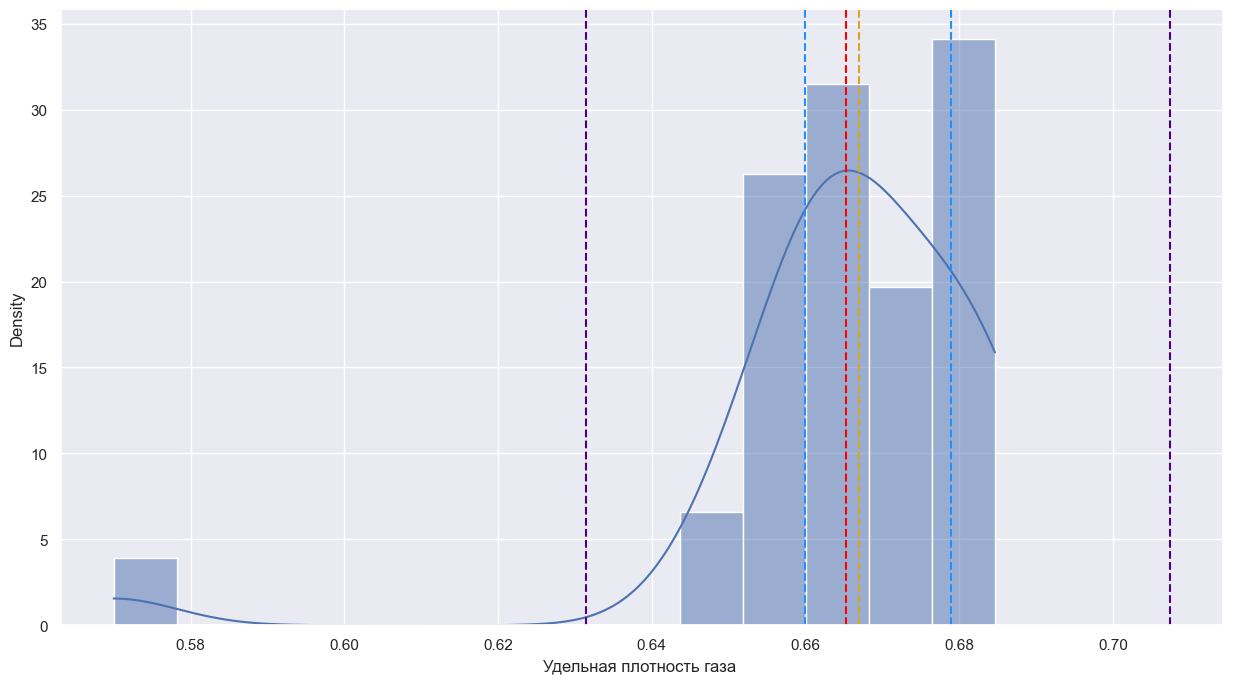

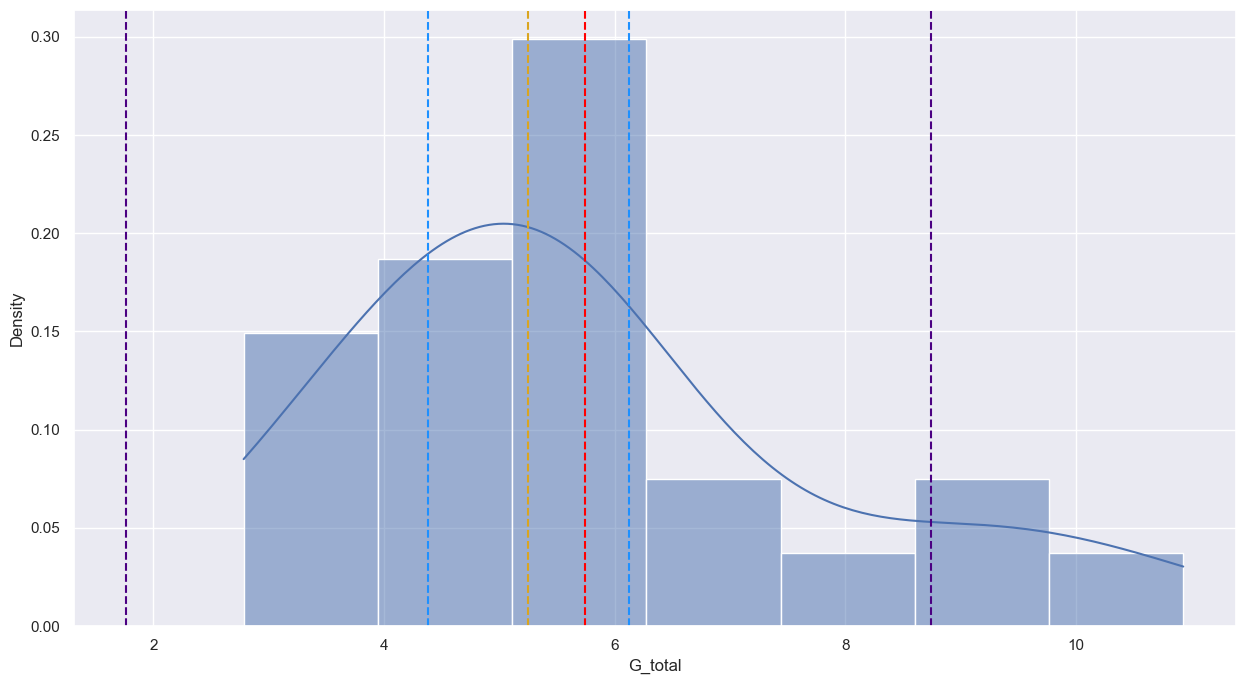

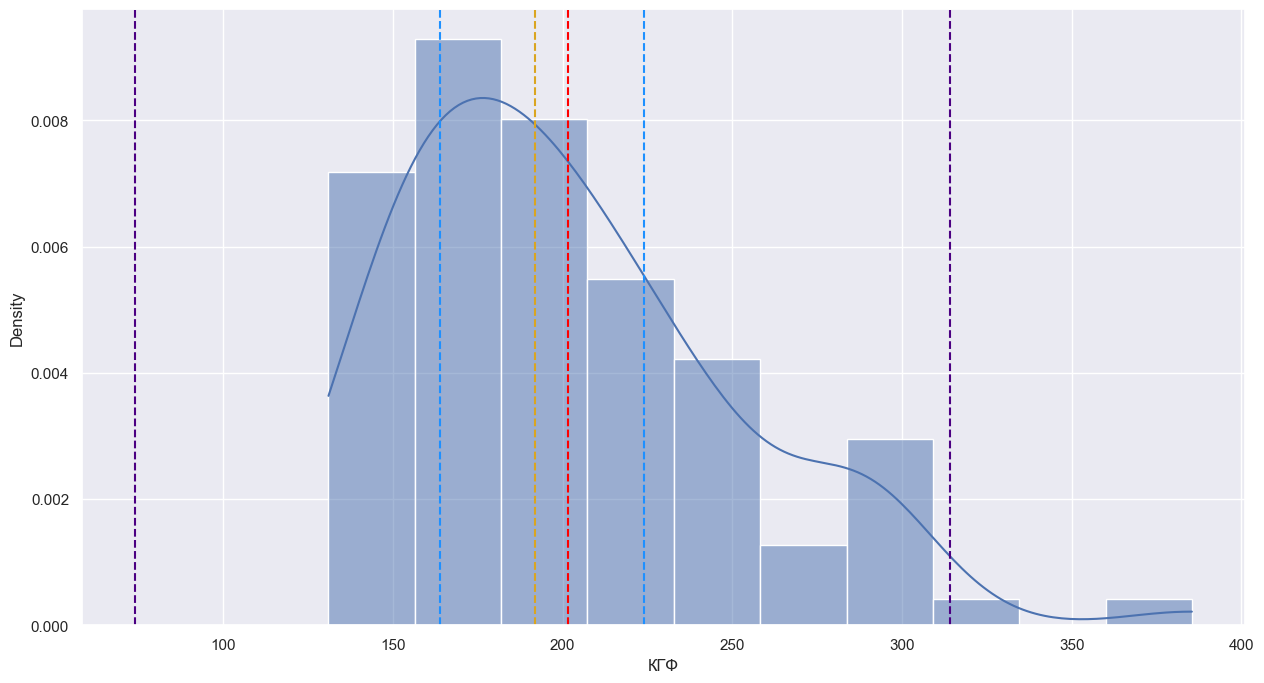

In [12]:
for i in df.columns:
    plt.figure(i)
    sns.histplot(df[i],kde=True,stat="density")
    plt.axvline(f.iloc[3][i]-1.5*f.iloc[10][i], color="indigo", ls='--') #q1-1.5*iqr
    plt.axvline(f.iloc[3][i], color="dodgerblue", ls='--') #первый квартиль
    plt.axvline(f.iloc[4][i], color="red", ls='--') #среднее
    plt.axvline(f.iloc[5][i], color="goldenrod", ls='--') #медиана
    plt.axvline(f.iloc[6][i], color="dodgerblue", ls='--') #третий квартиль
    plt.axvline(f.iloc[6][i]+1.5*f.iloc[10][i], color="indigo", ls='--') #q3+1.5*iqr
    plt.show()

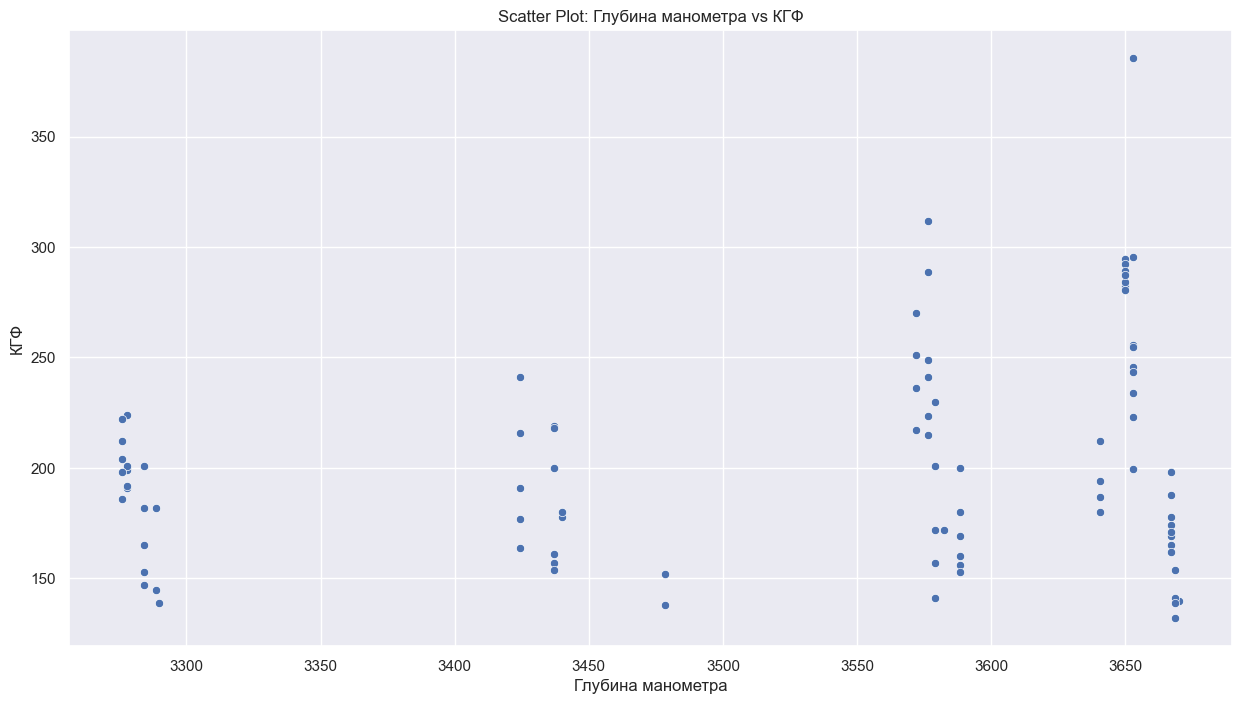

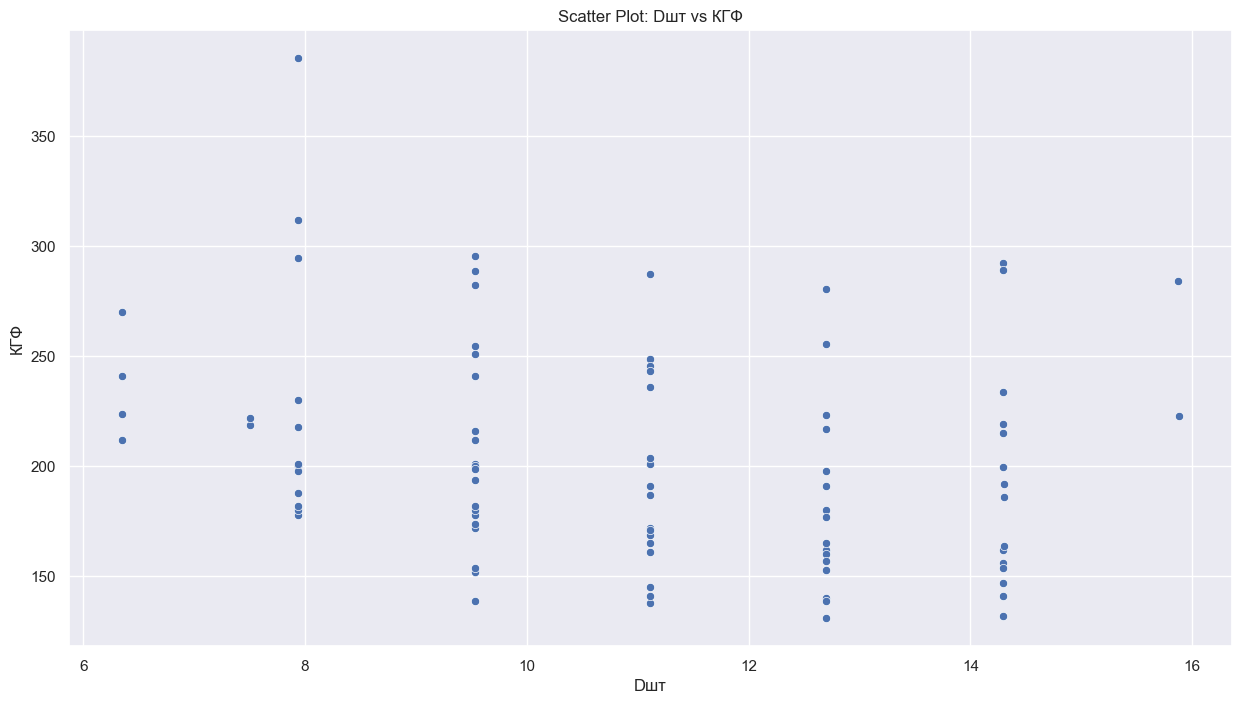

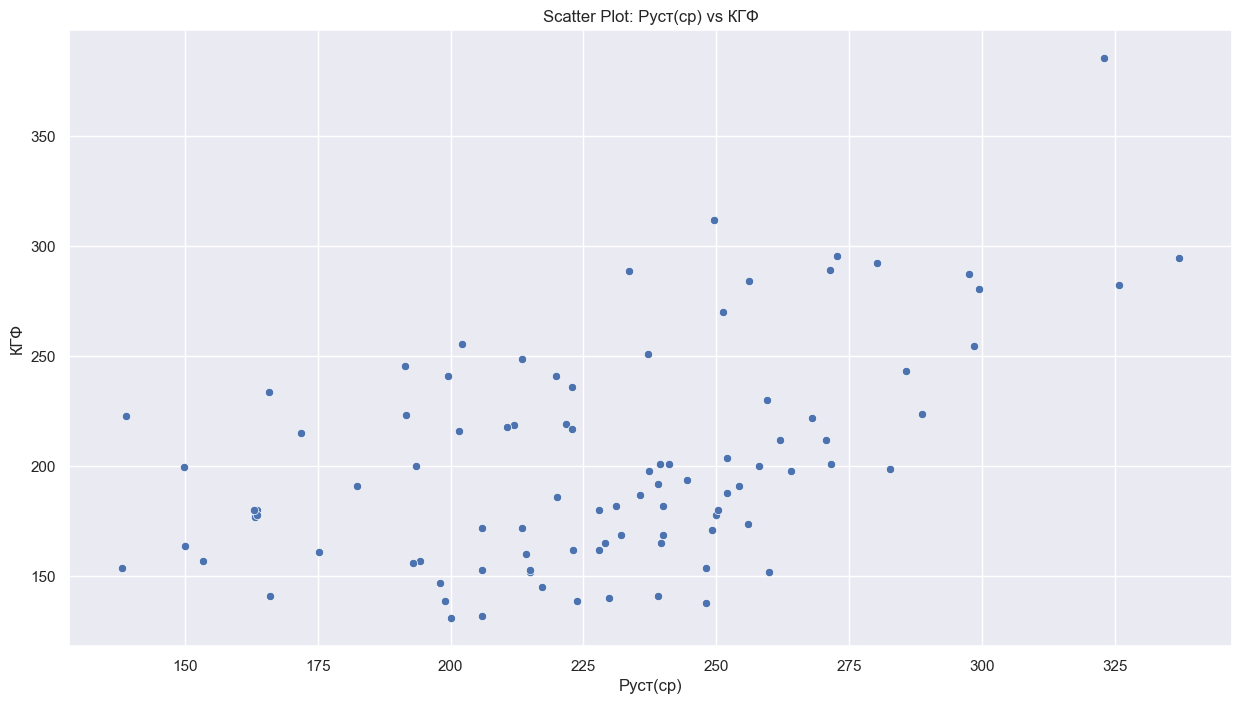

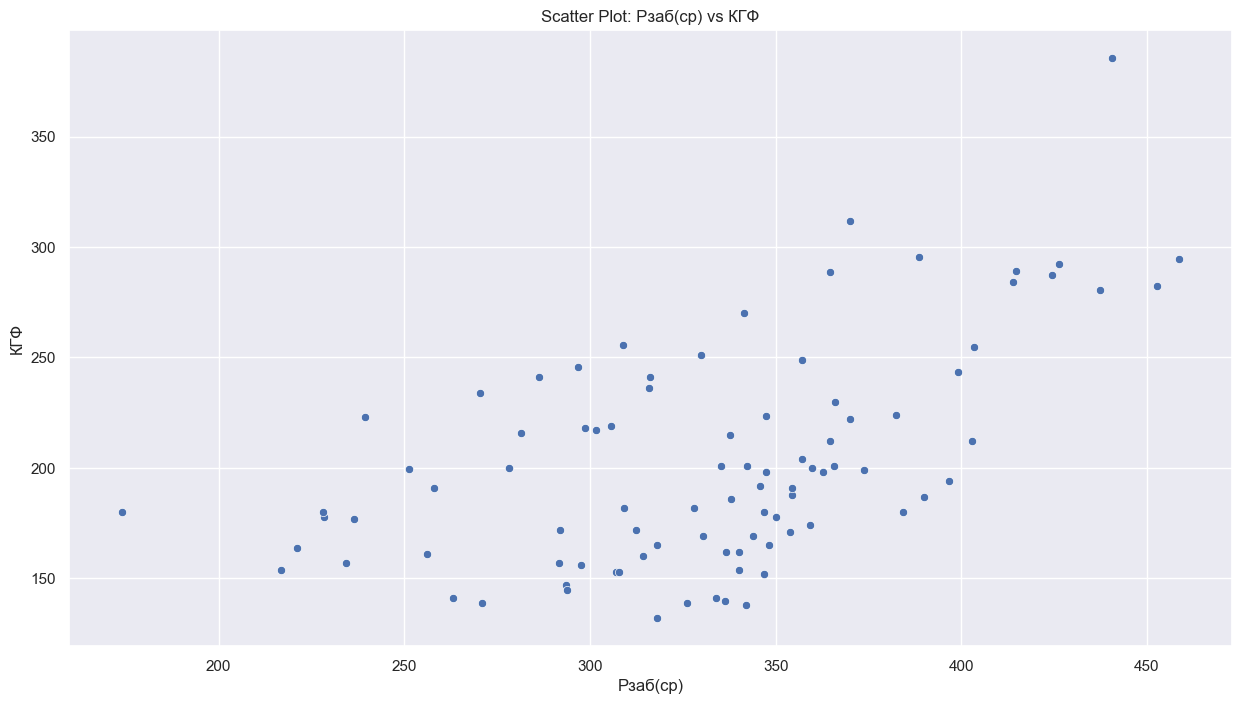

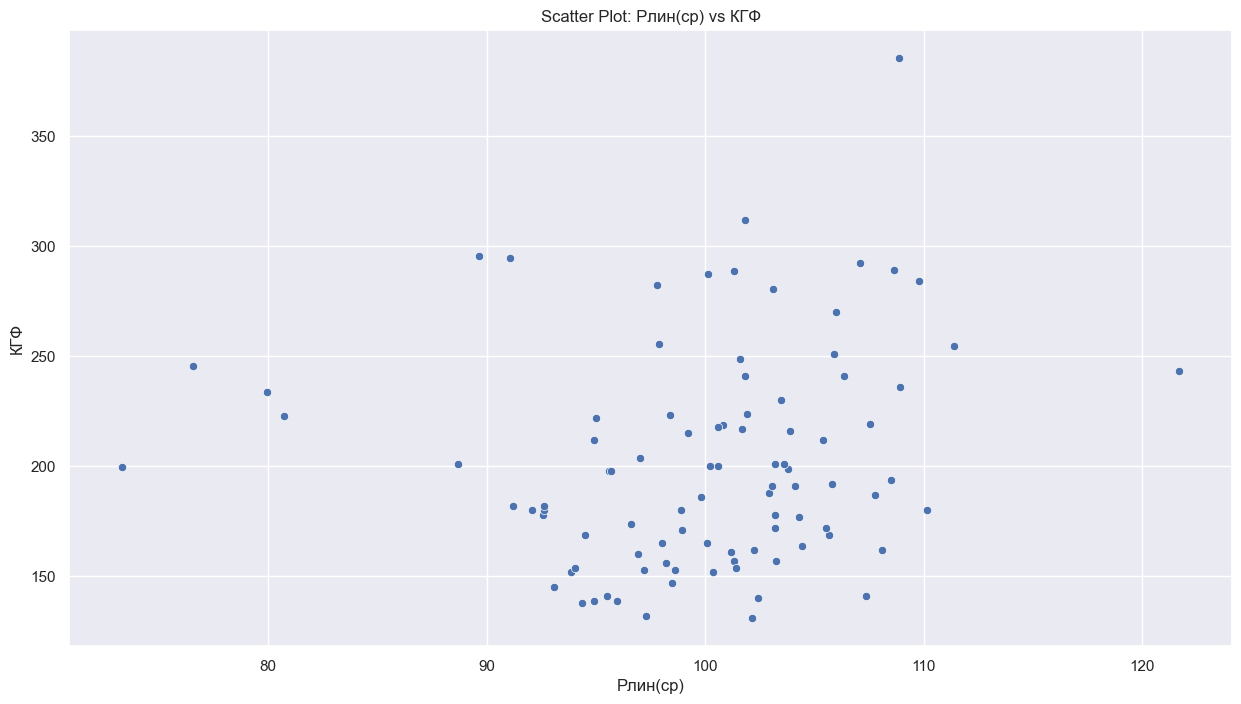

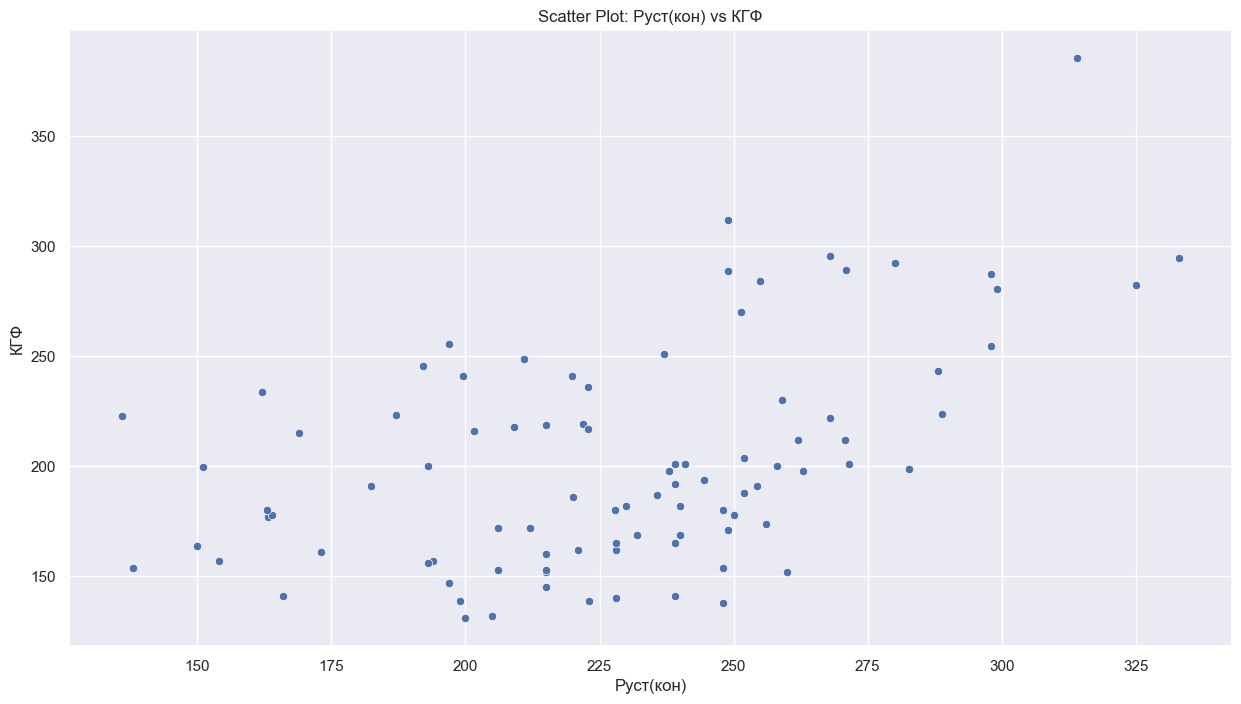

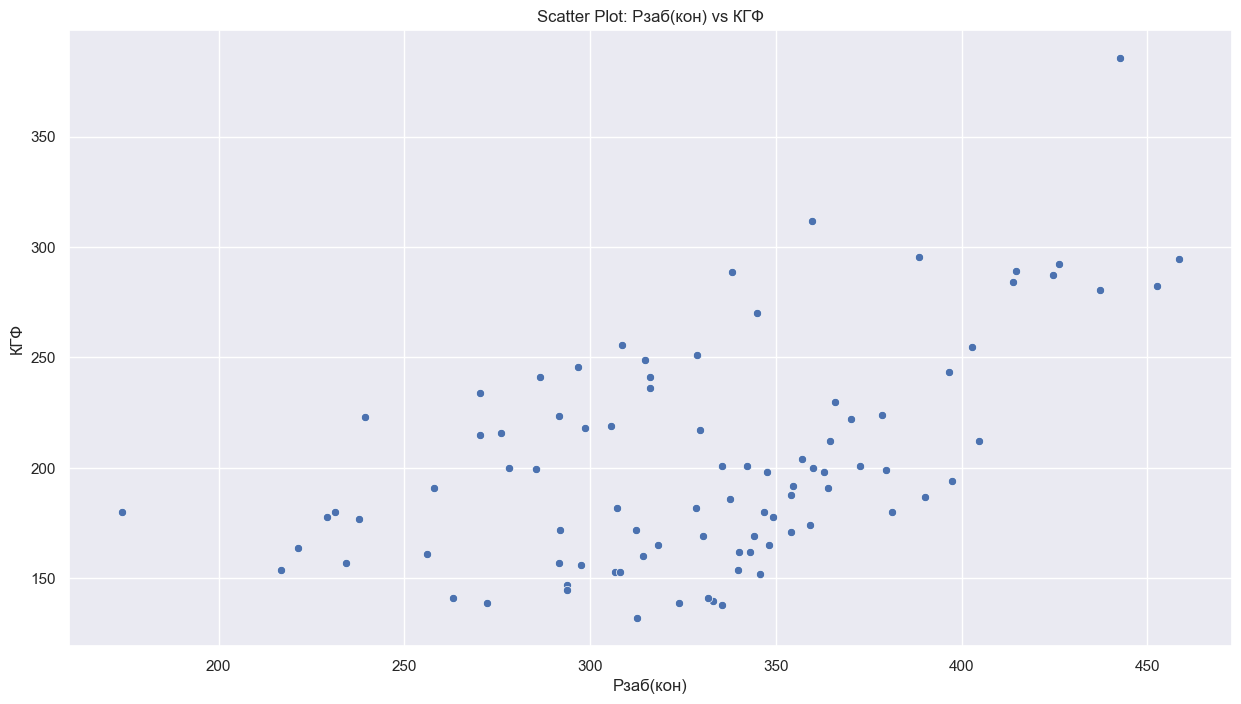

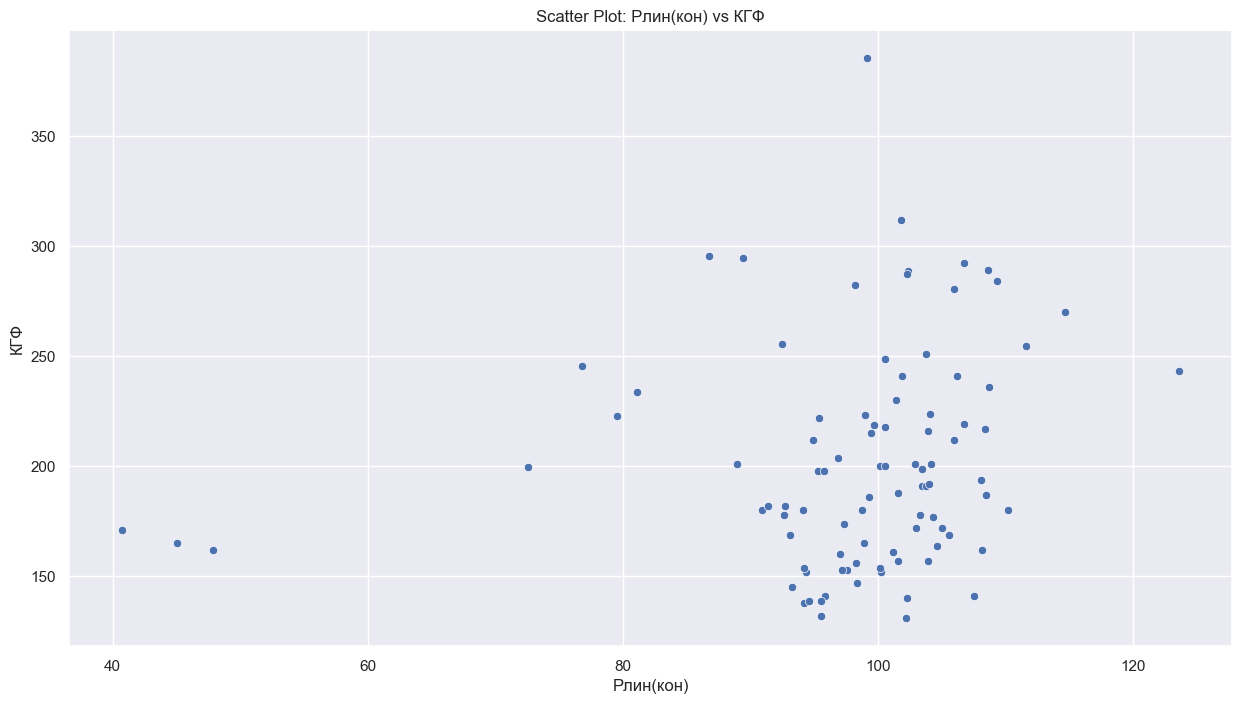

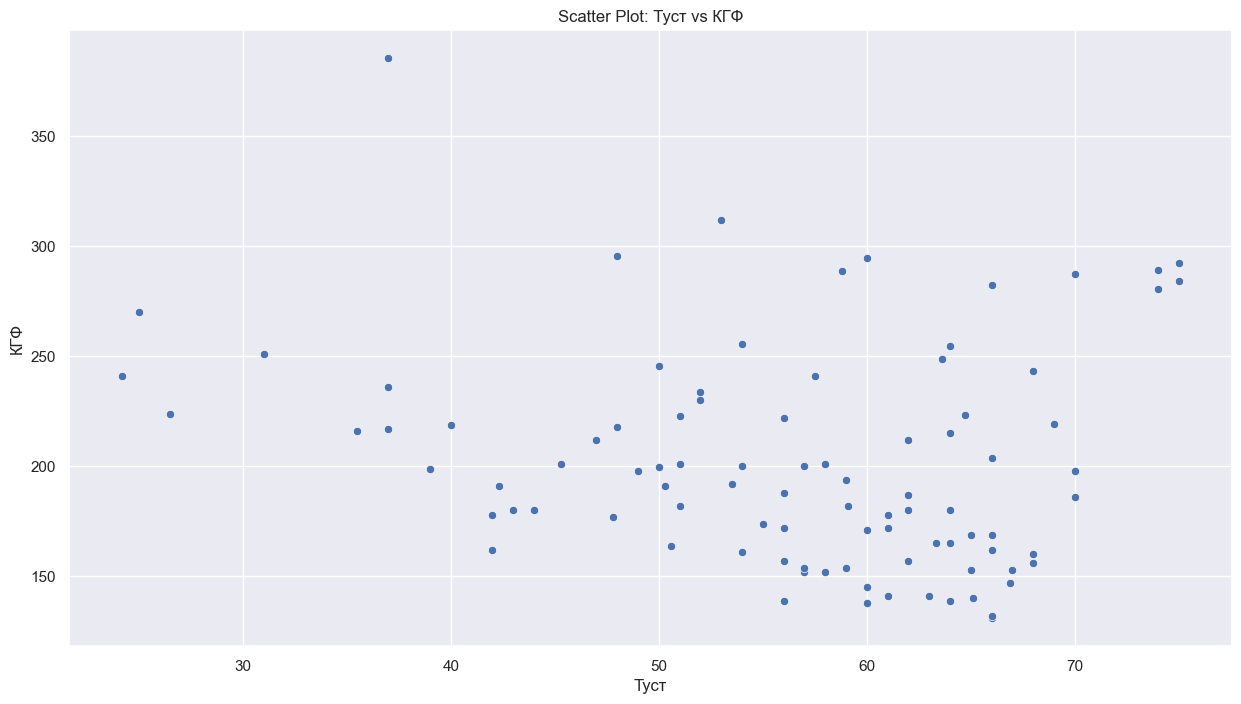

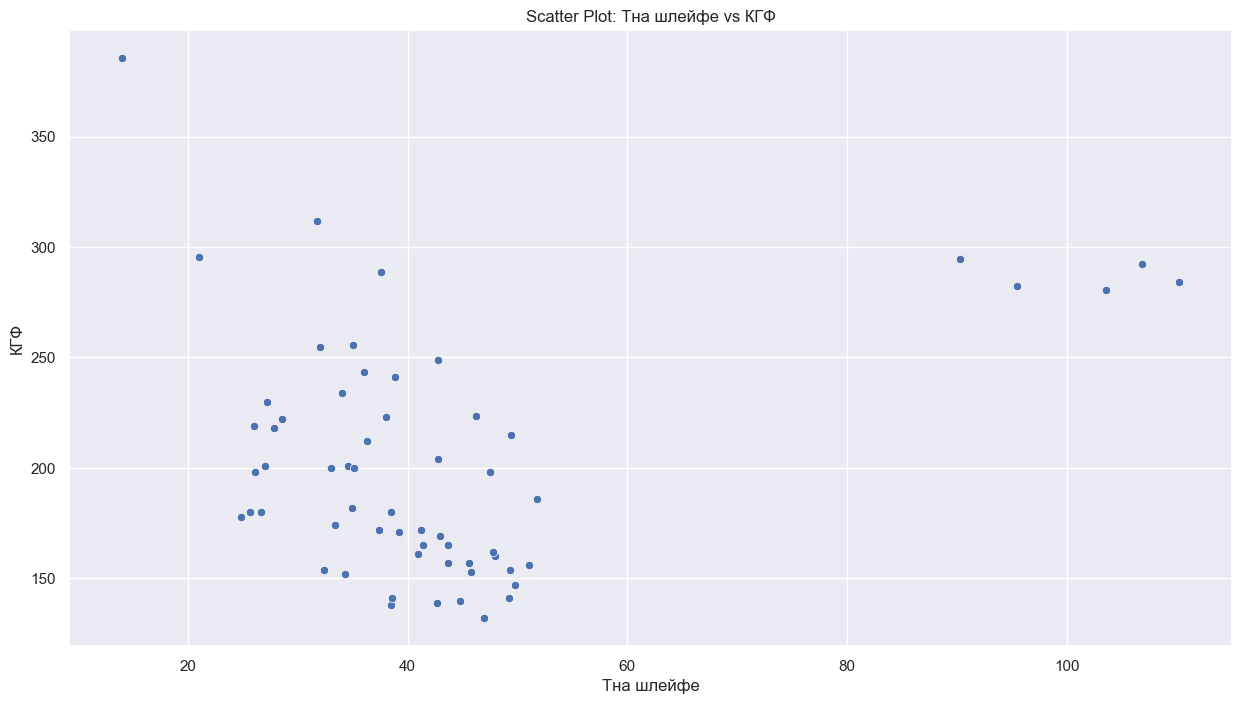

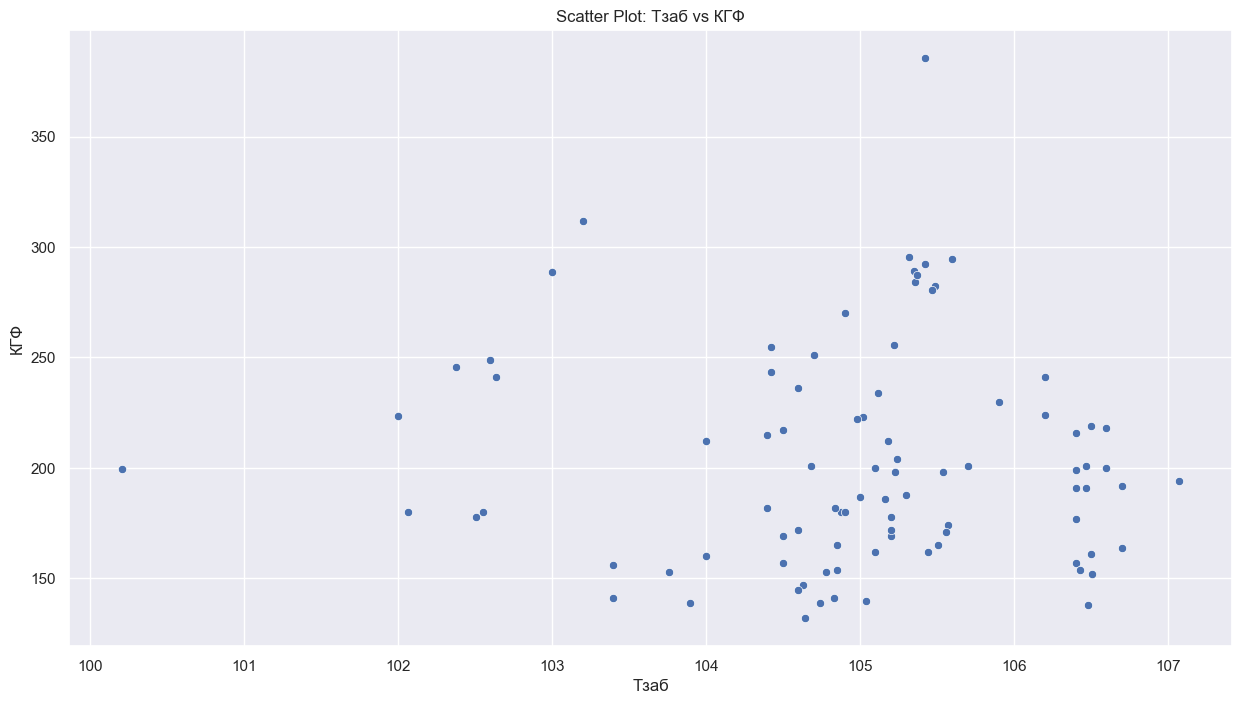

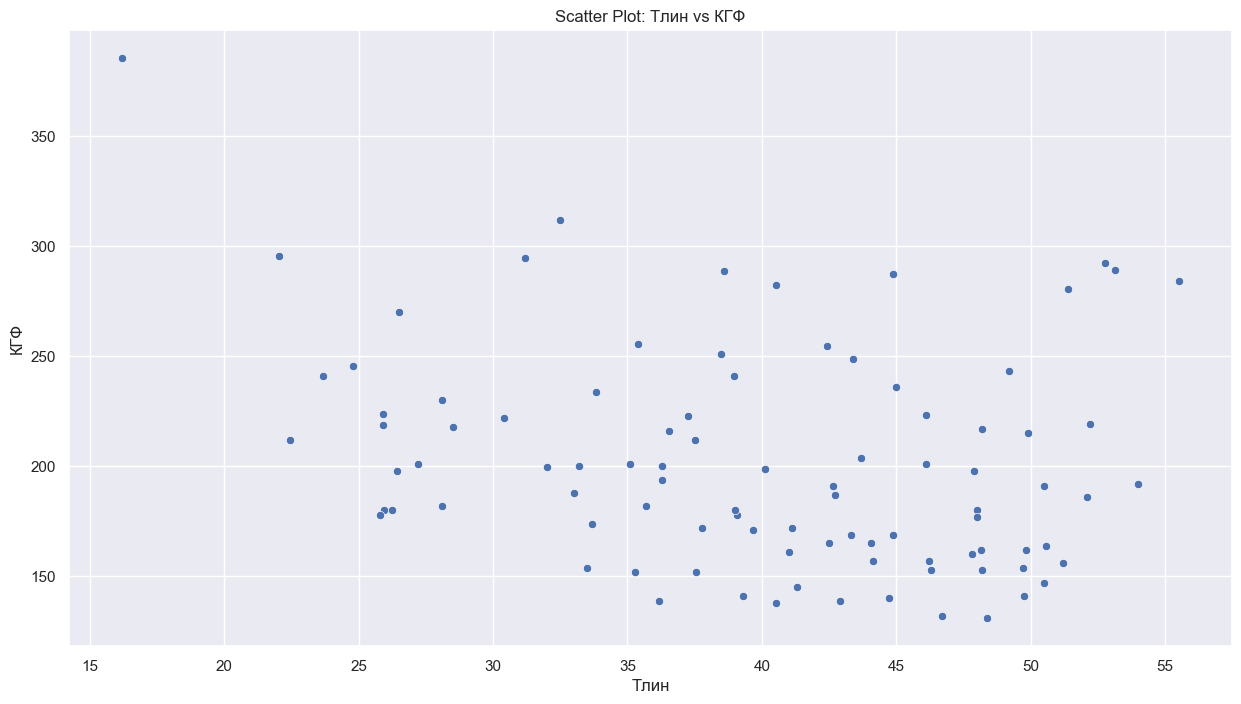

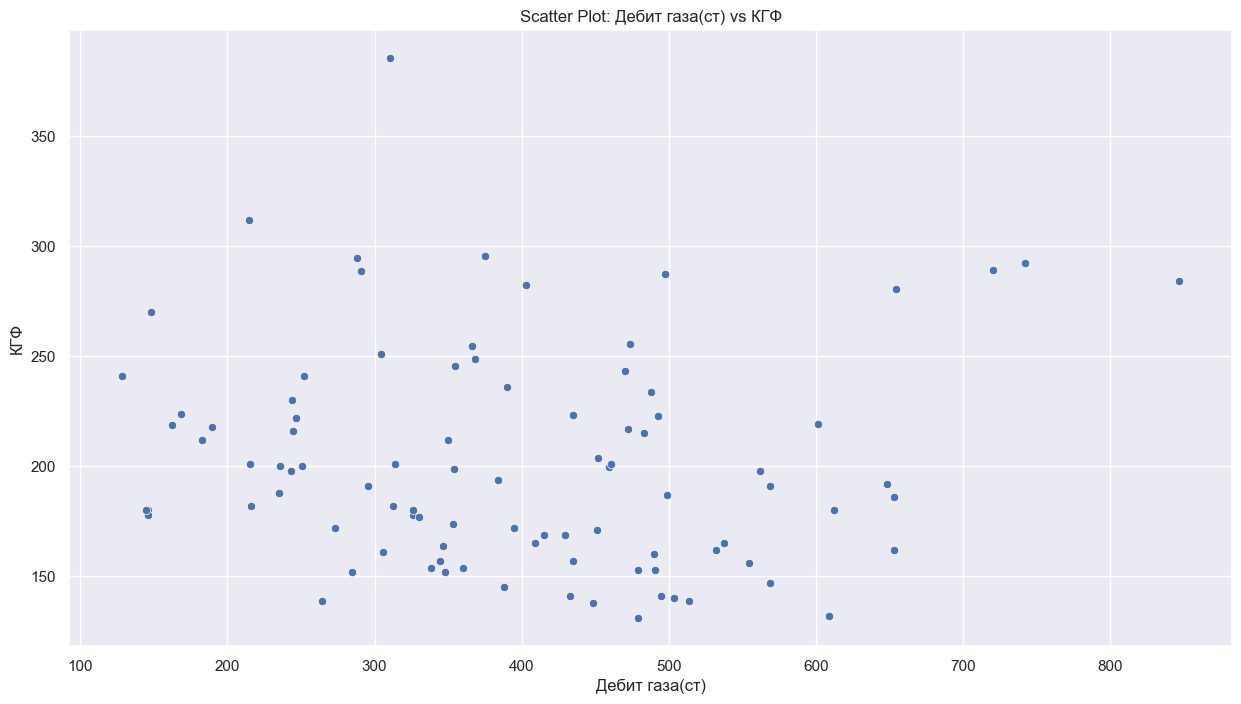

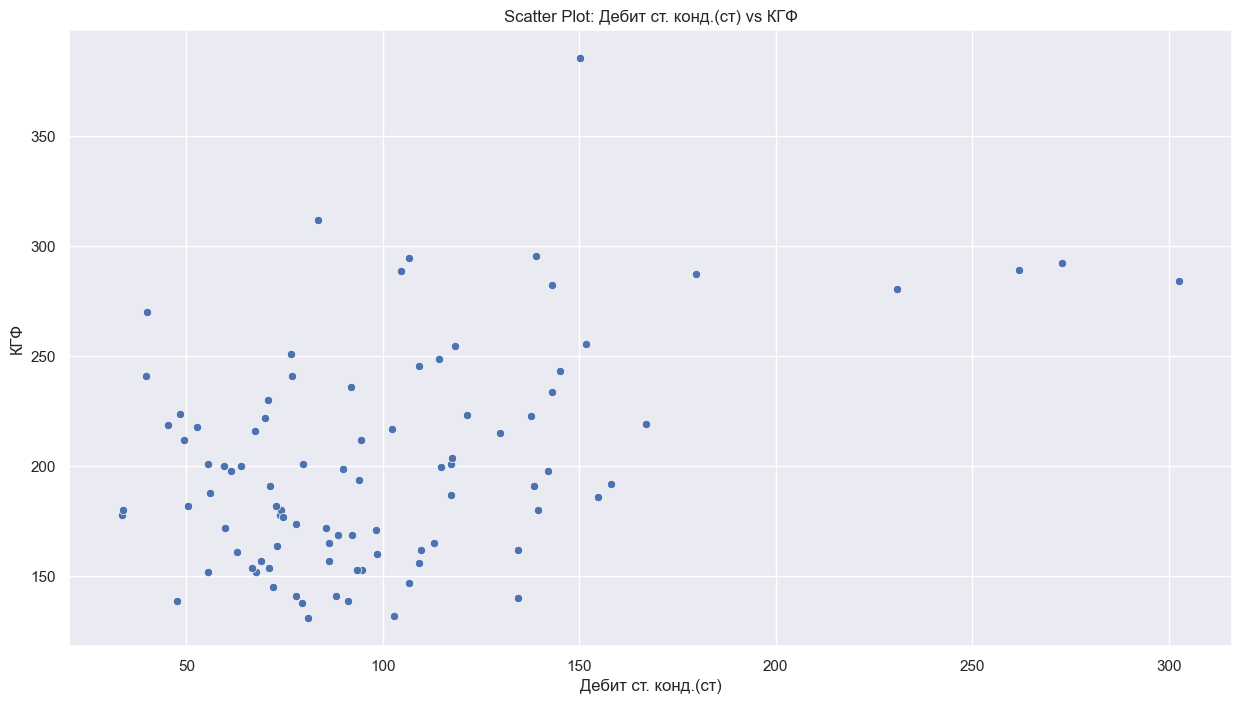

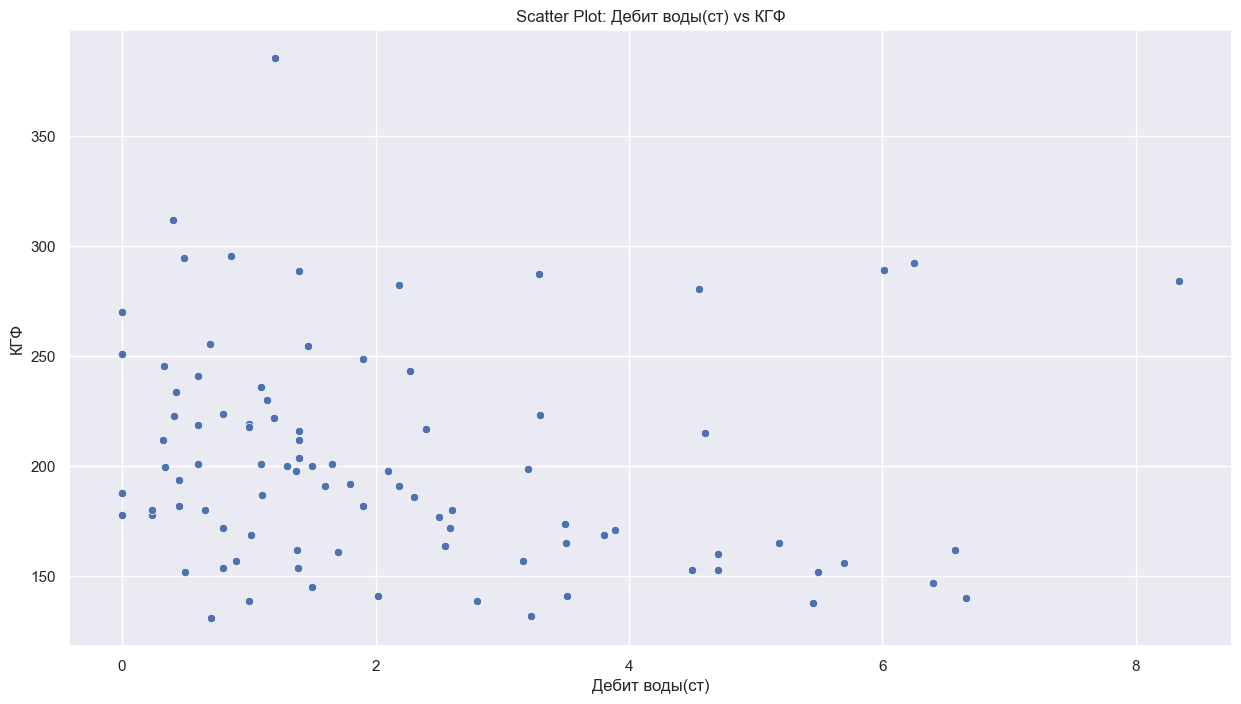

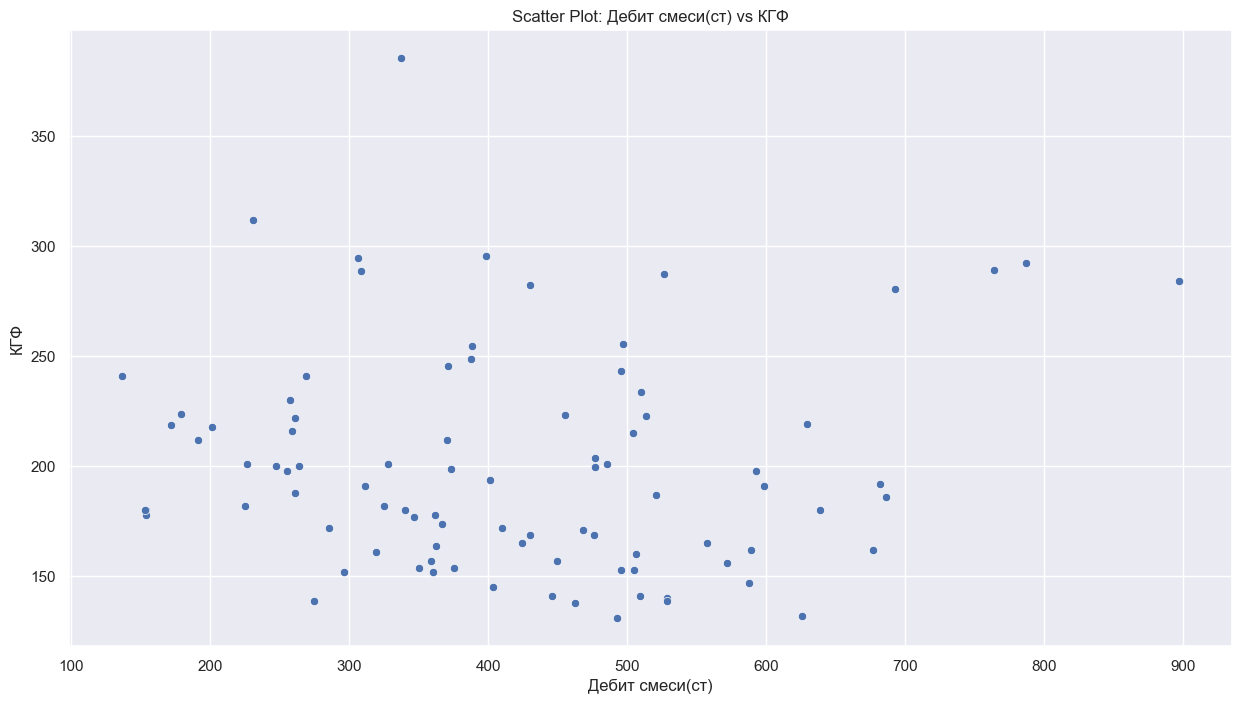

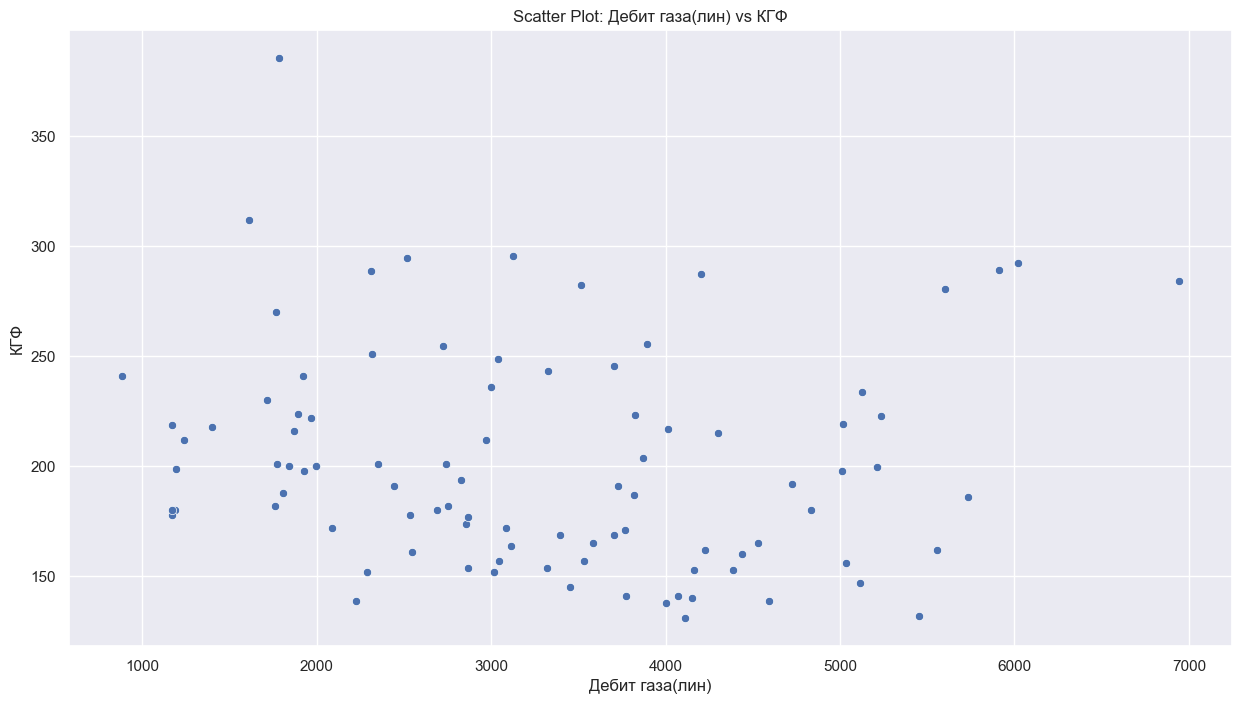

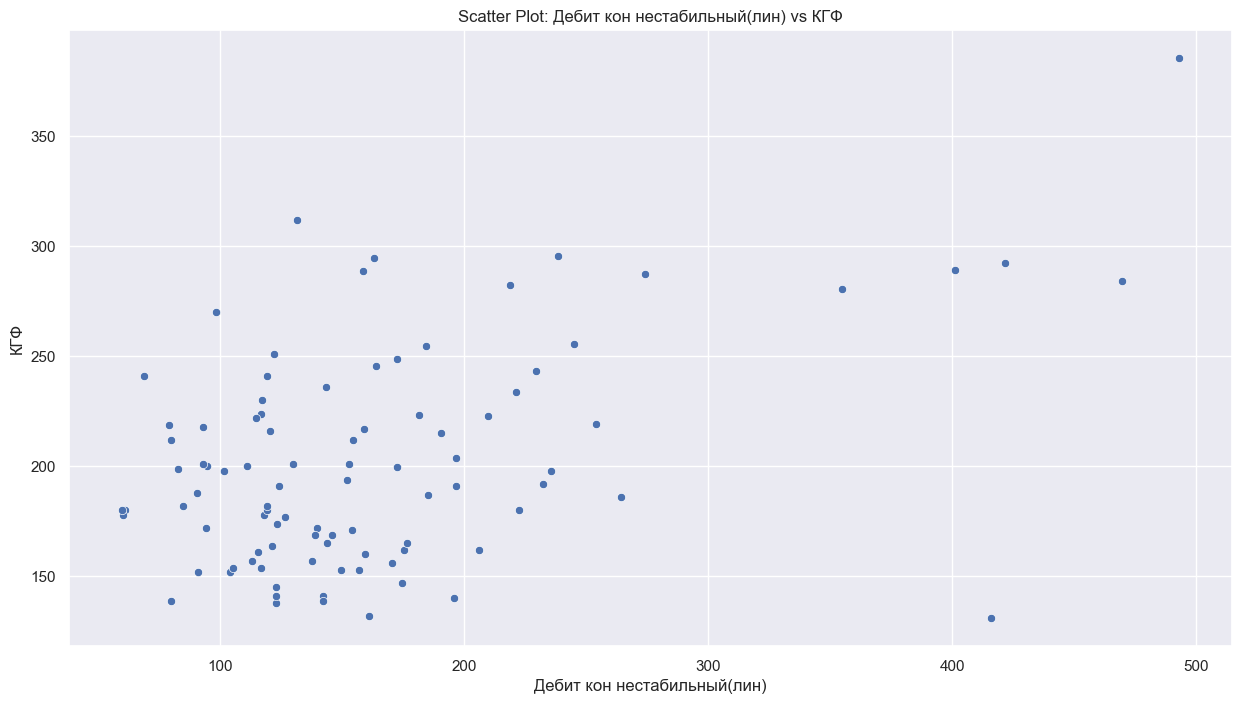

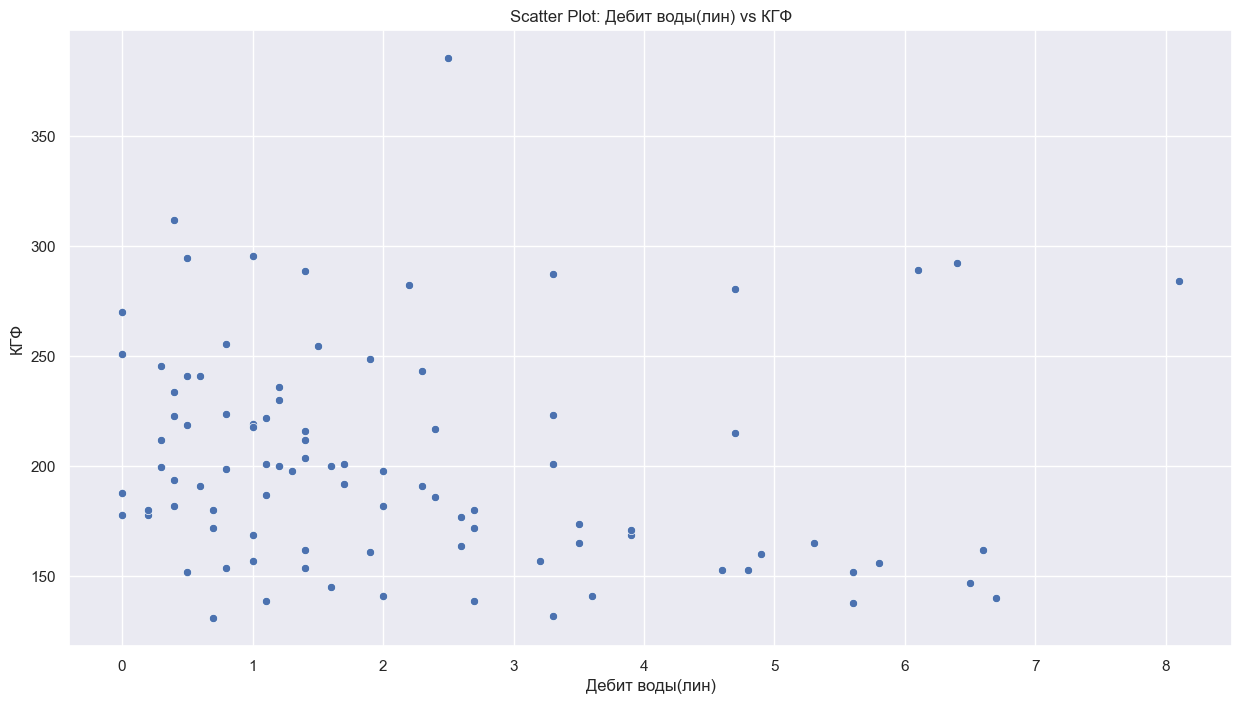

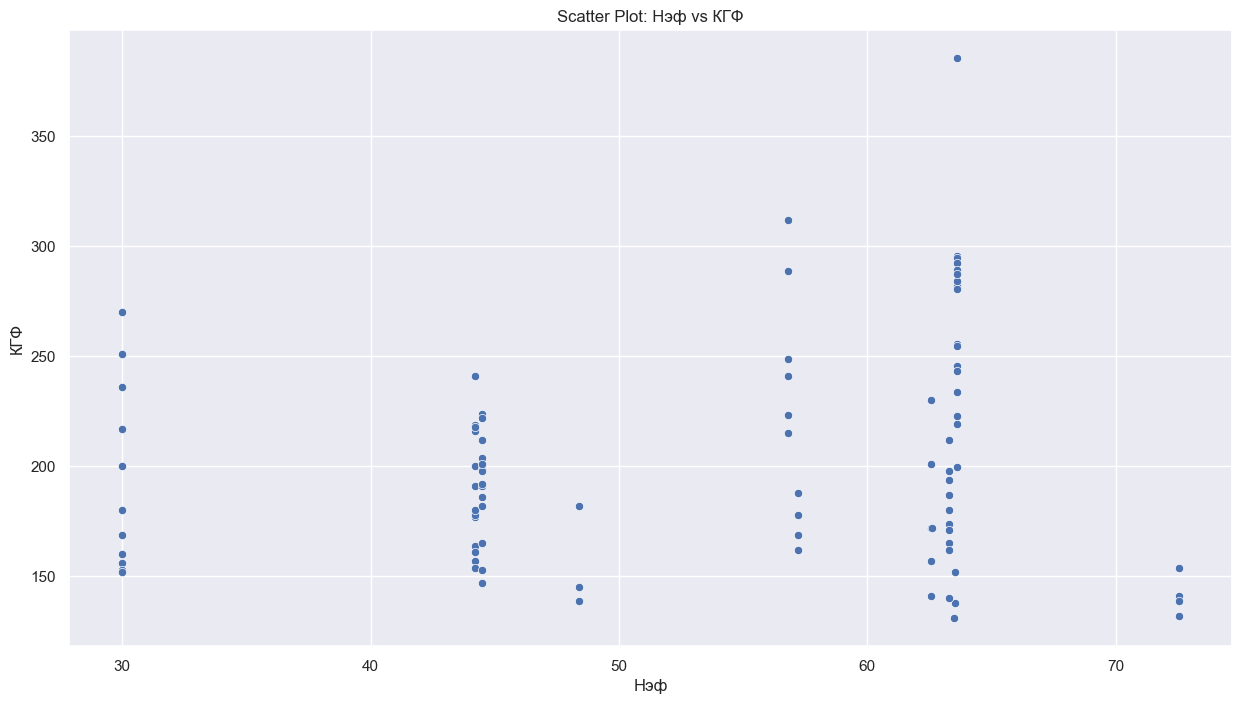

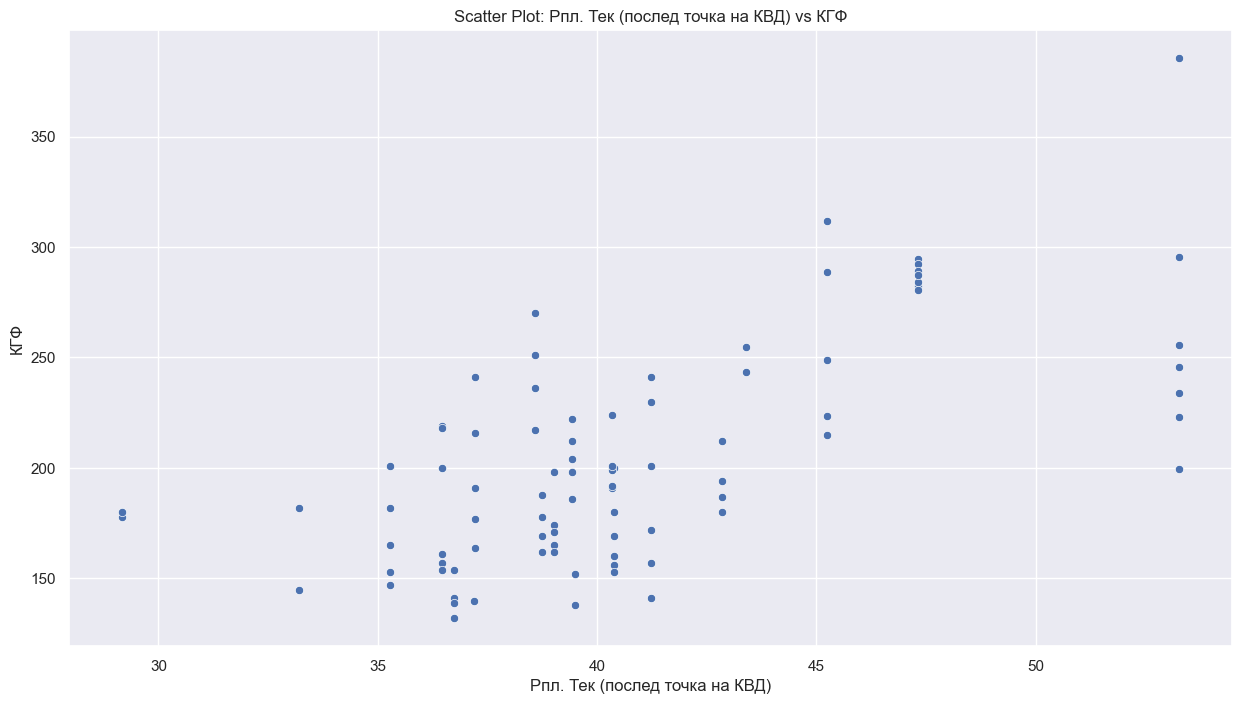

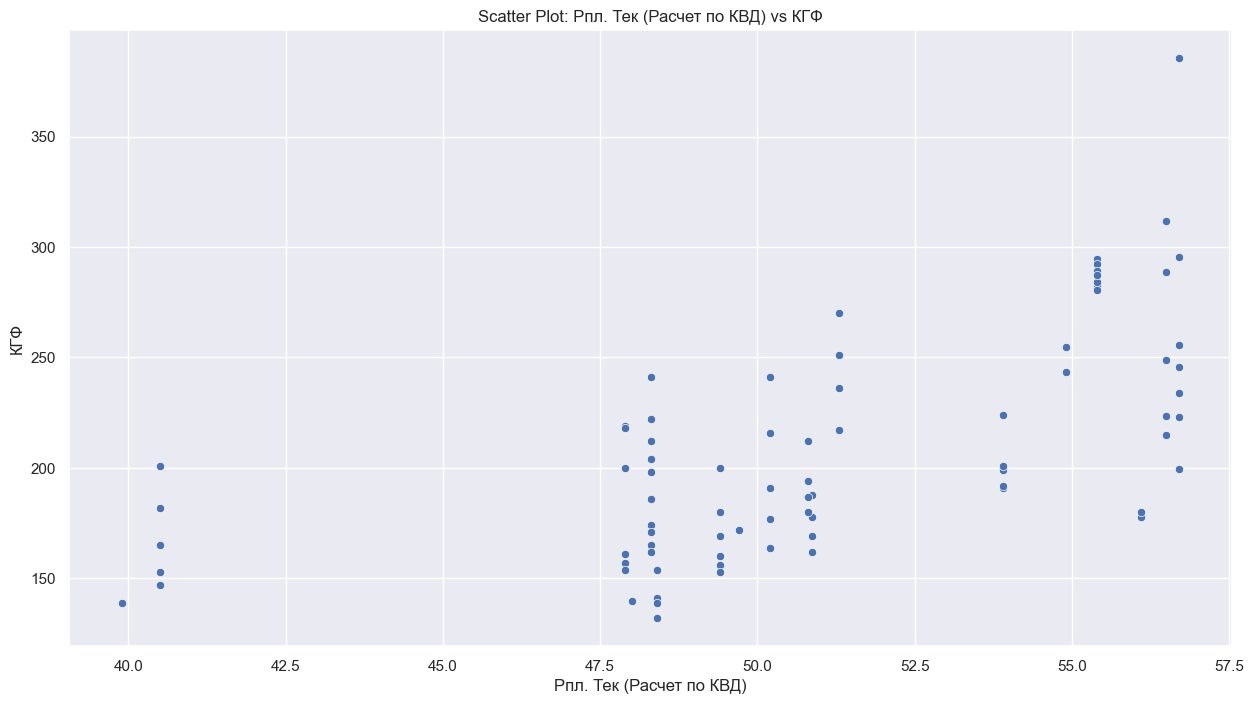

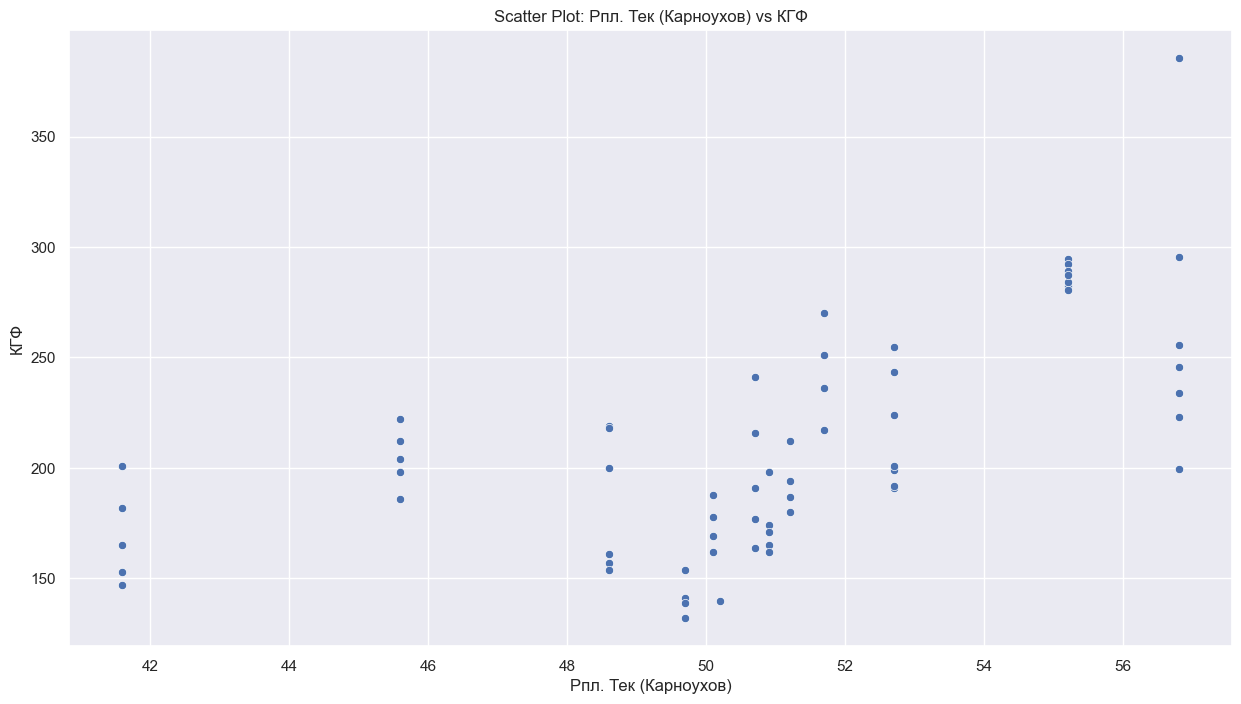

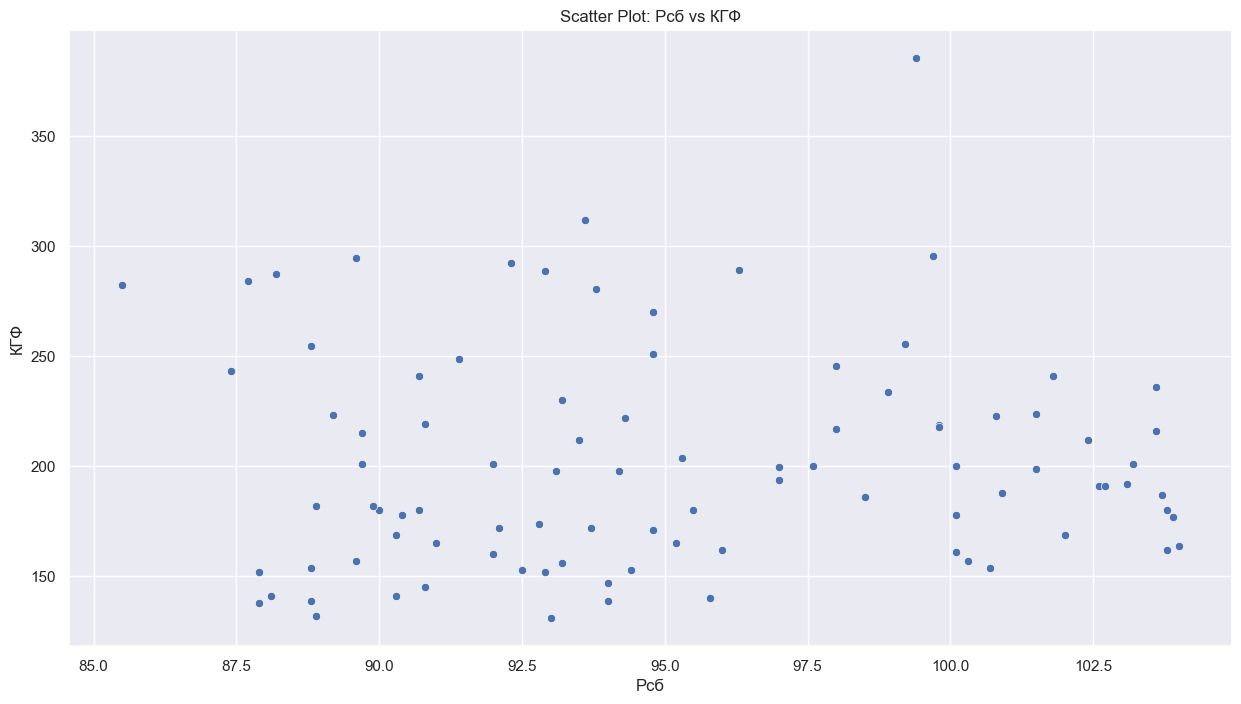

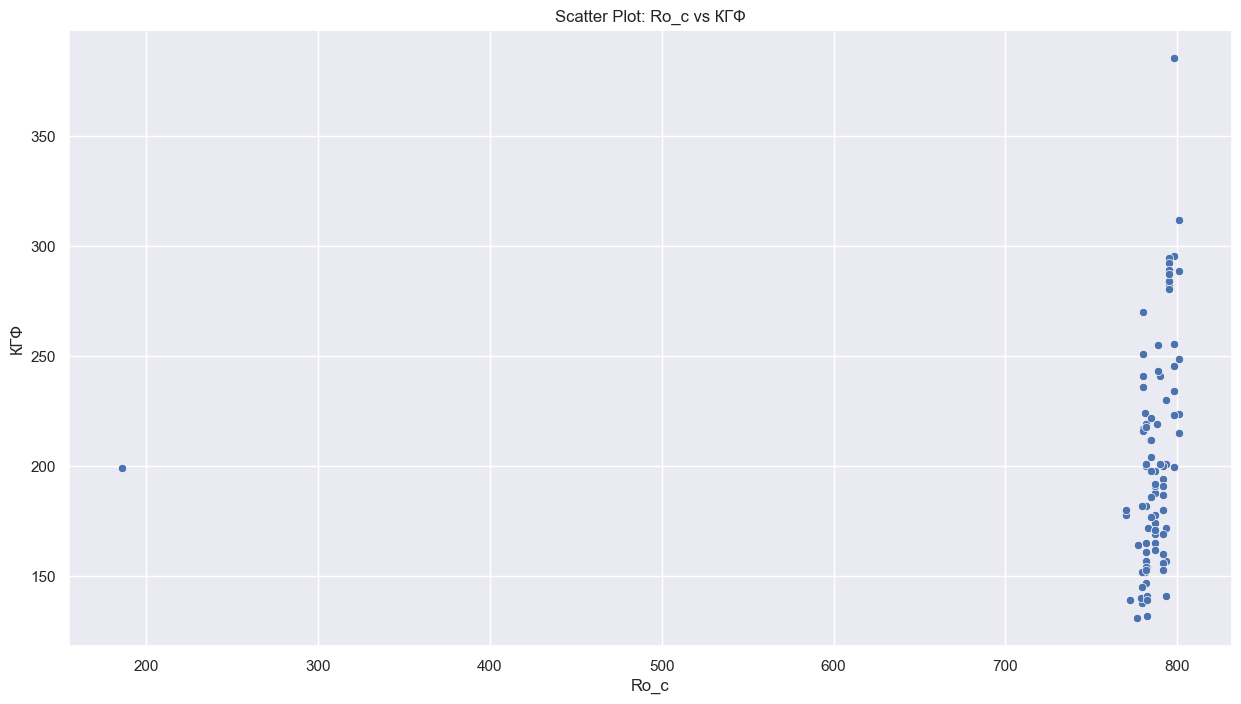

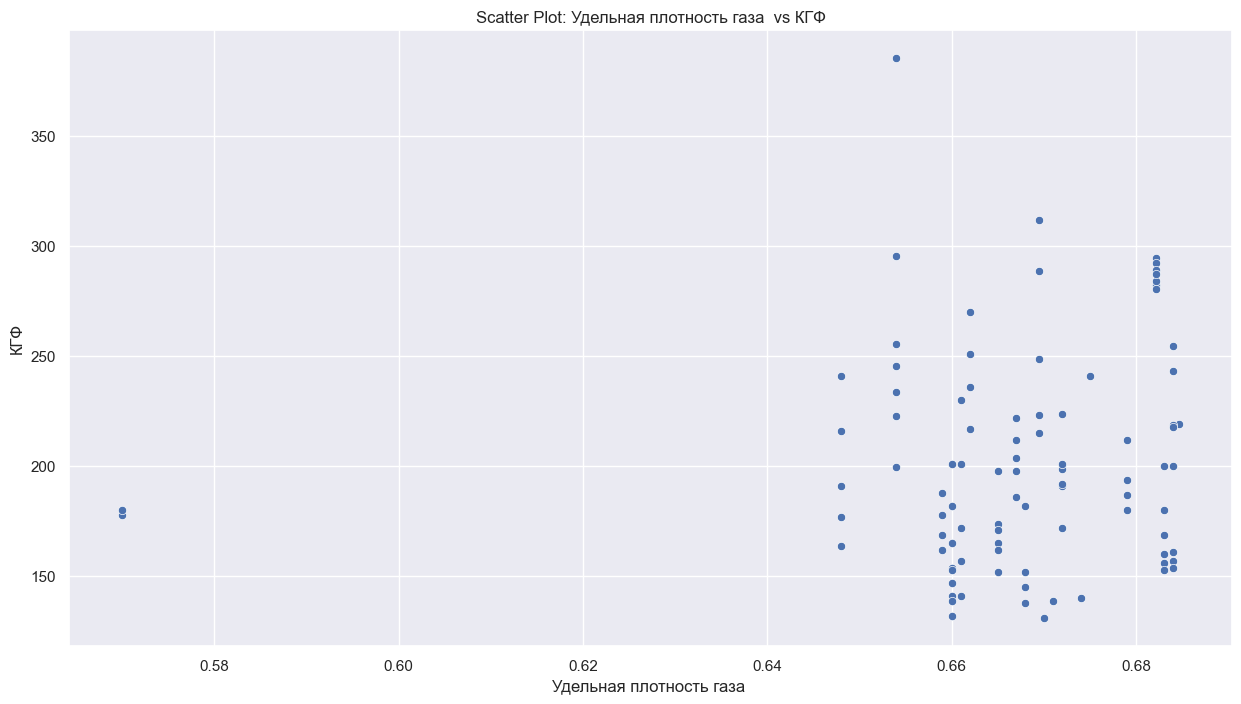

In [13]:
for i in df.columns:
    if i != 'КГФ' and i != 'G_total':
        sns.scatterplot(x=i, y=df.columns[27], data=df)
        plt.title('Scatter Plot: ' + i + " vs " + df.columns[27])
        plt.xlabel(i)
        plt.ylabel(df.columns[27])
        plt.show()

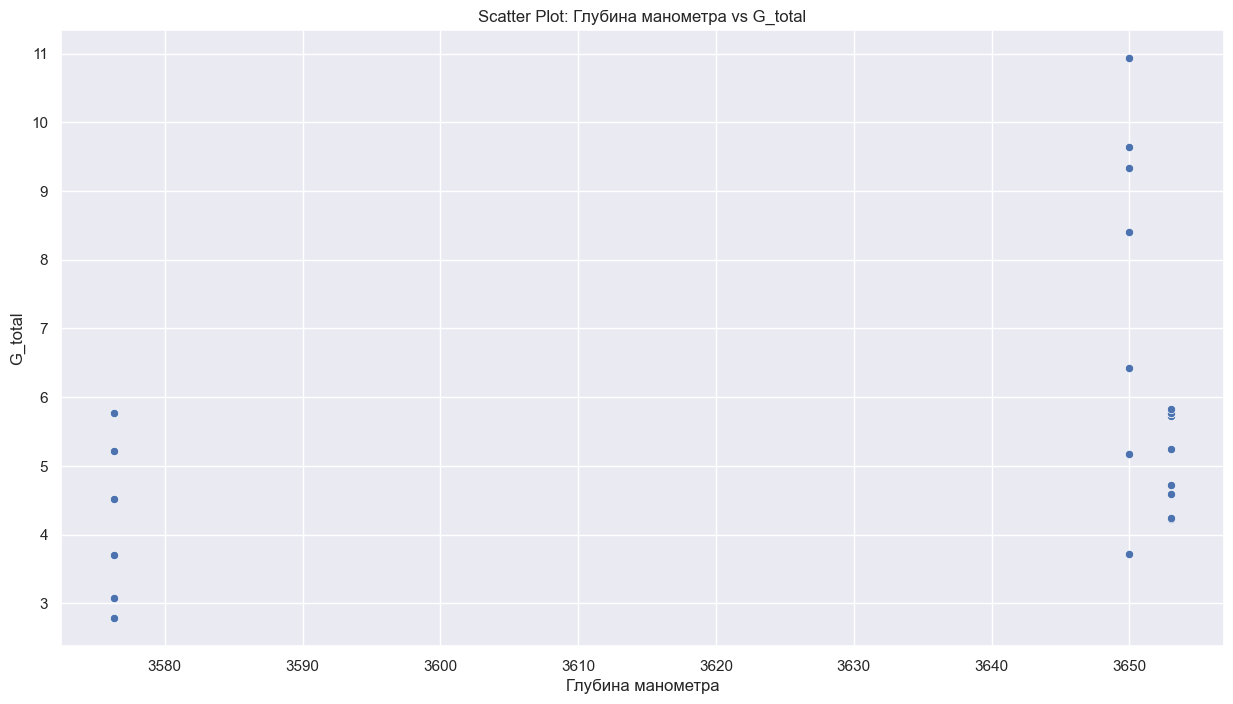

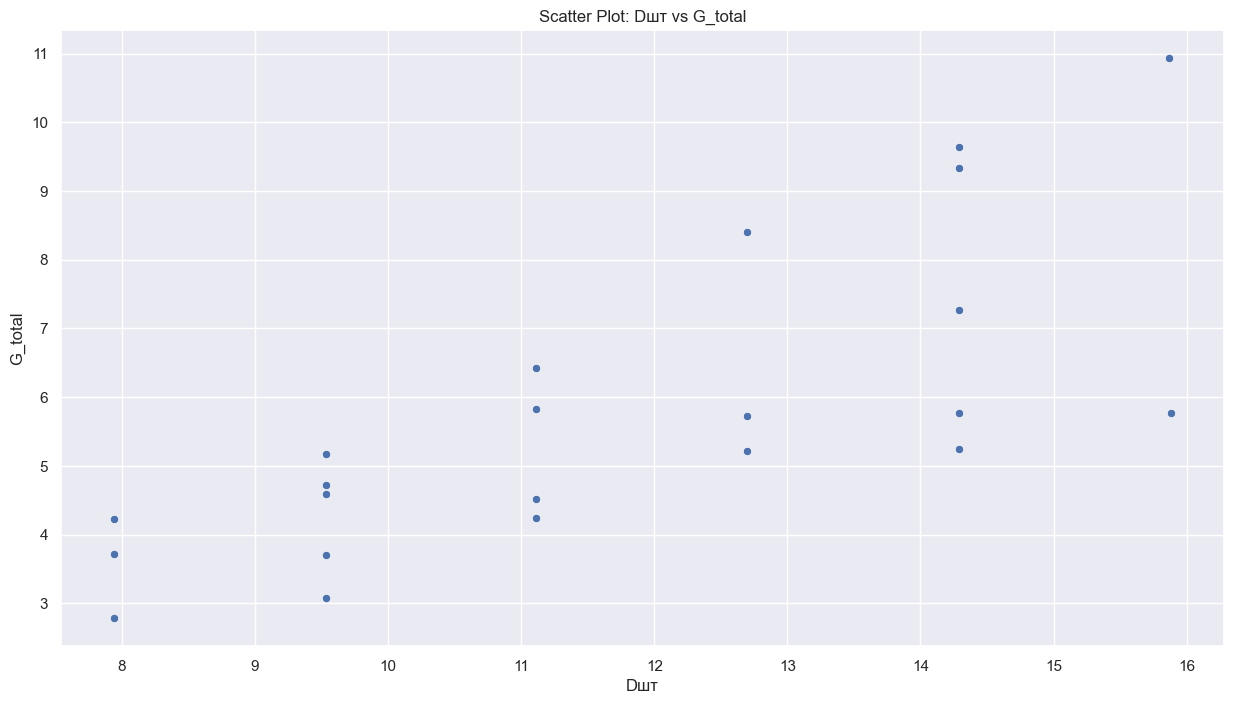

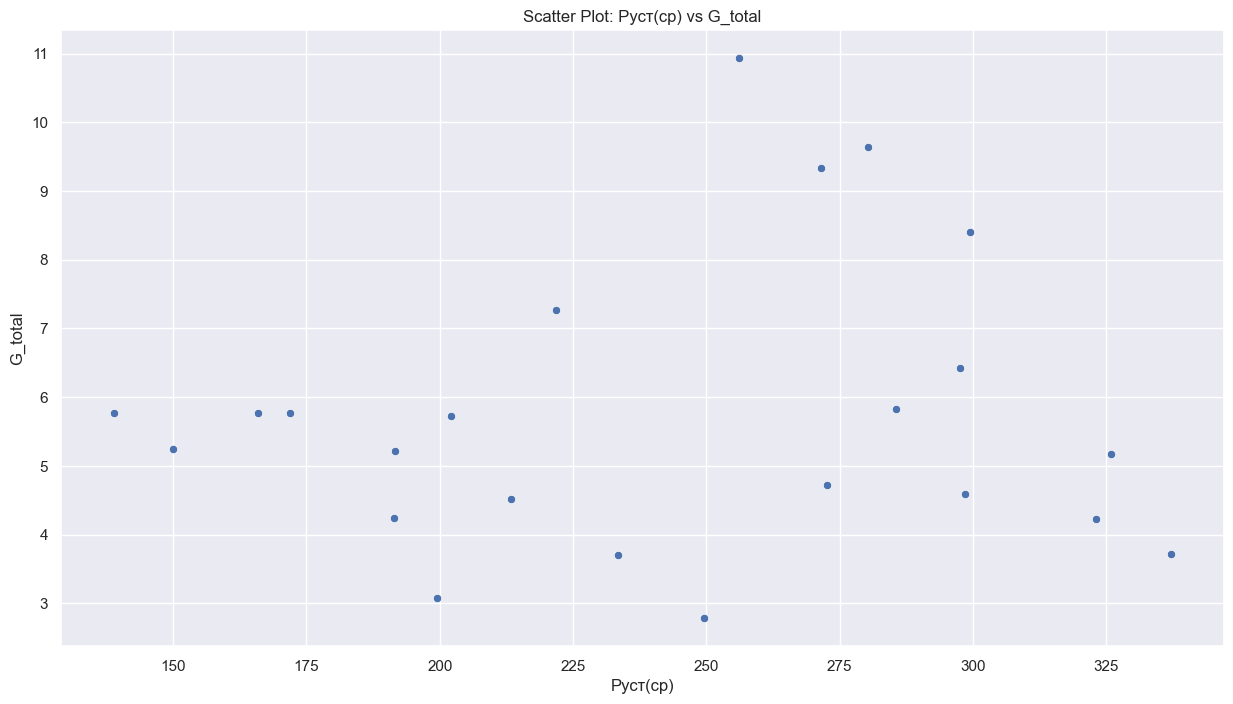

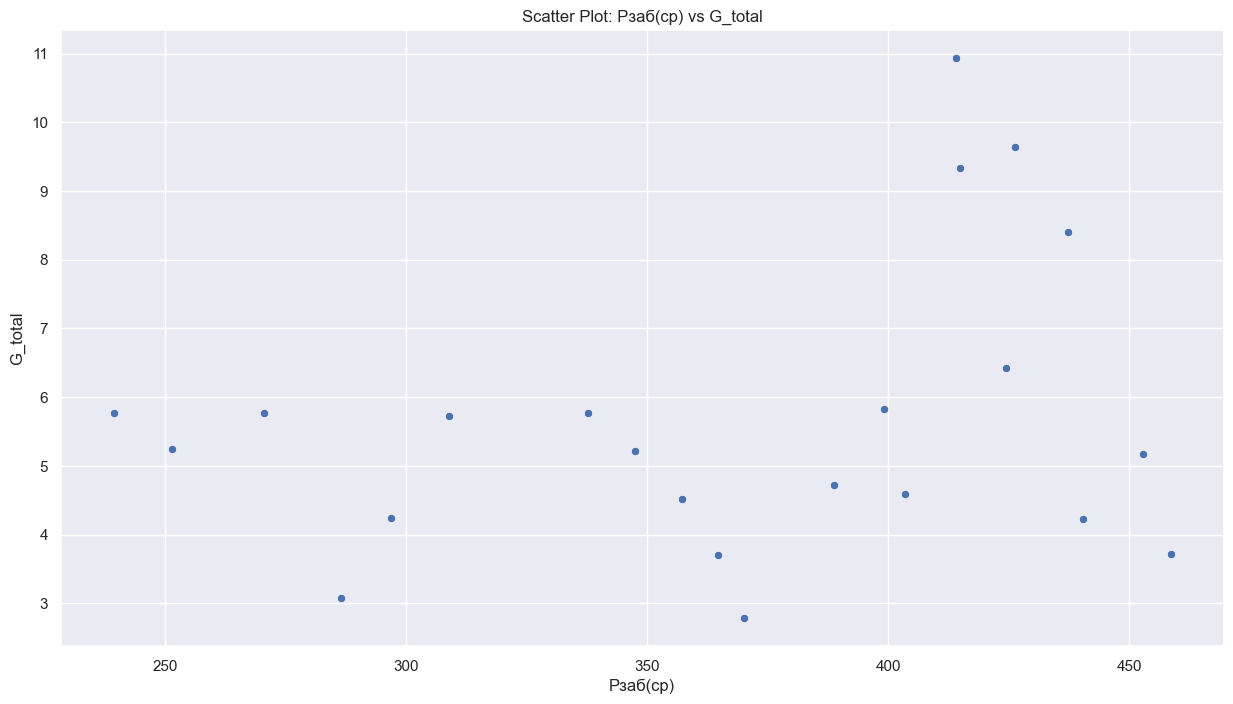

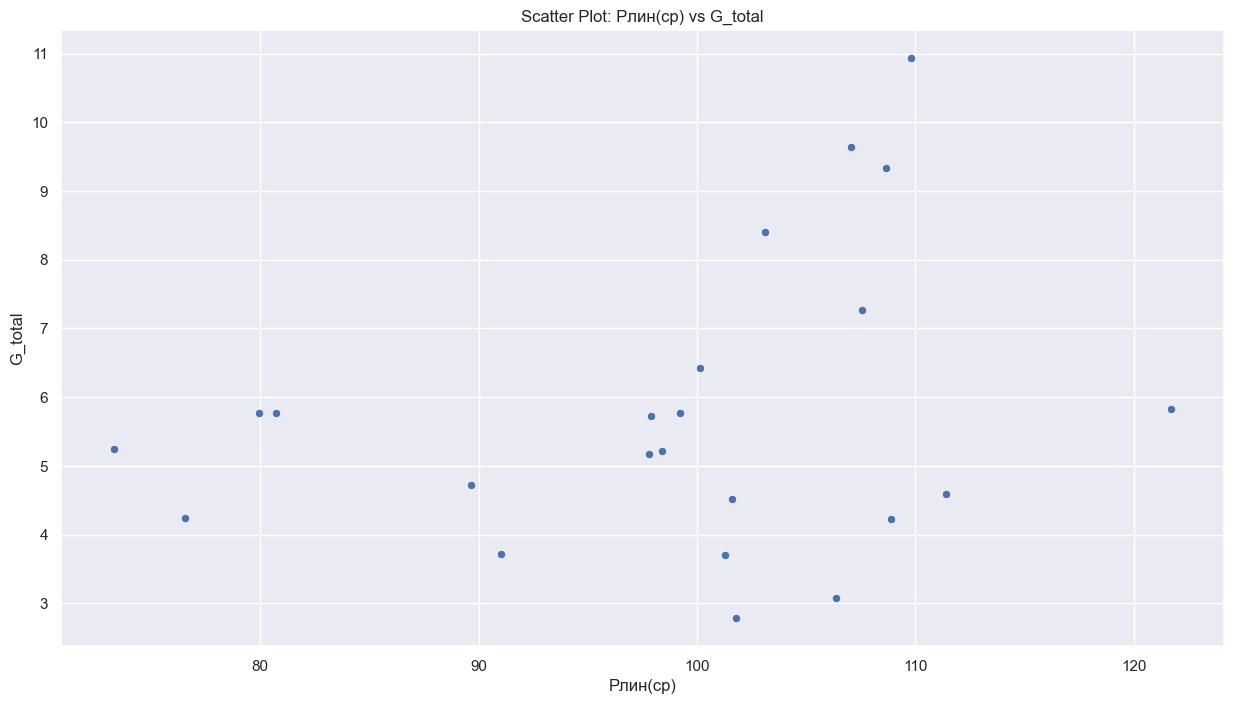

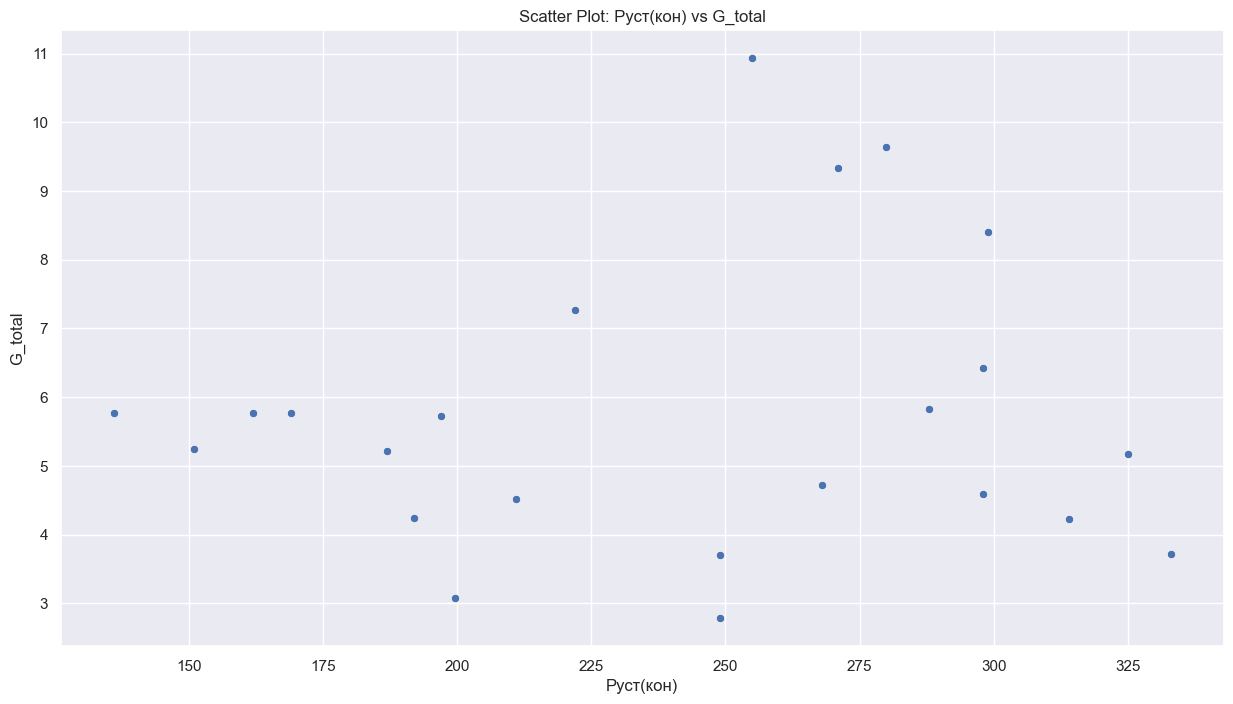

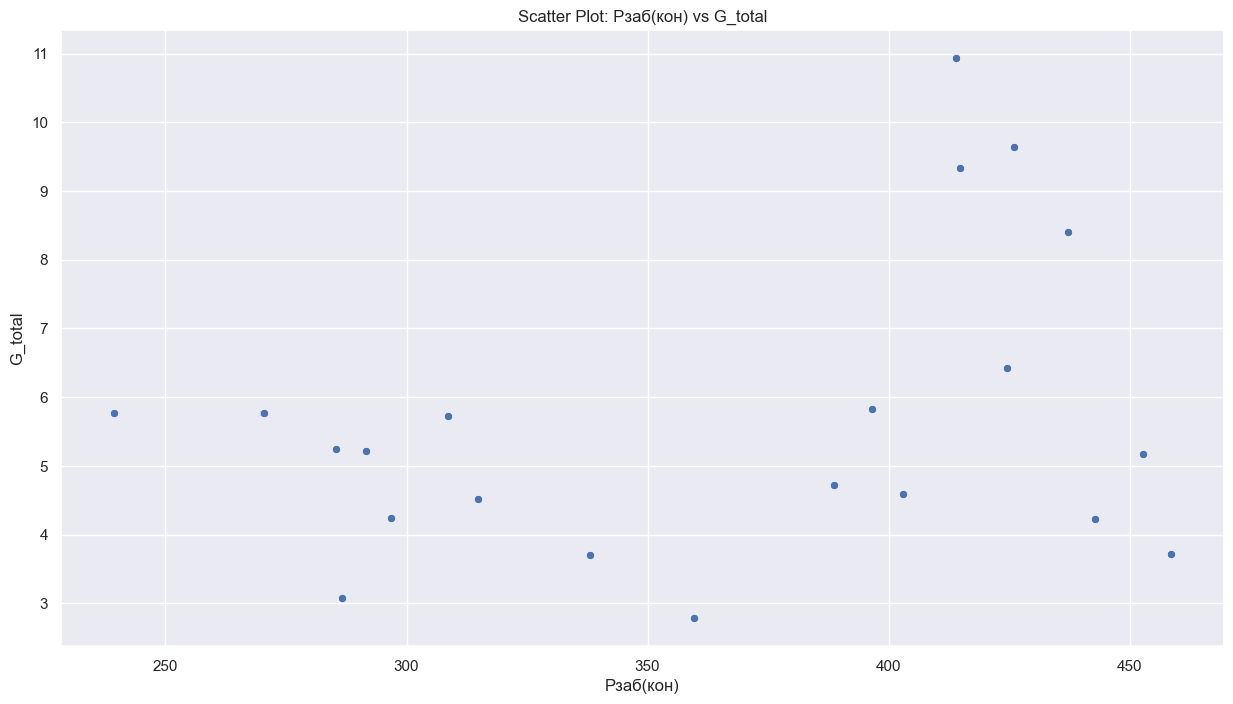

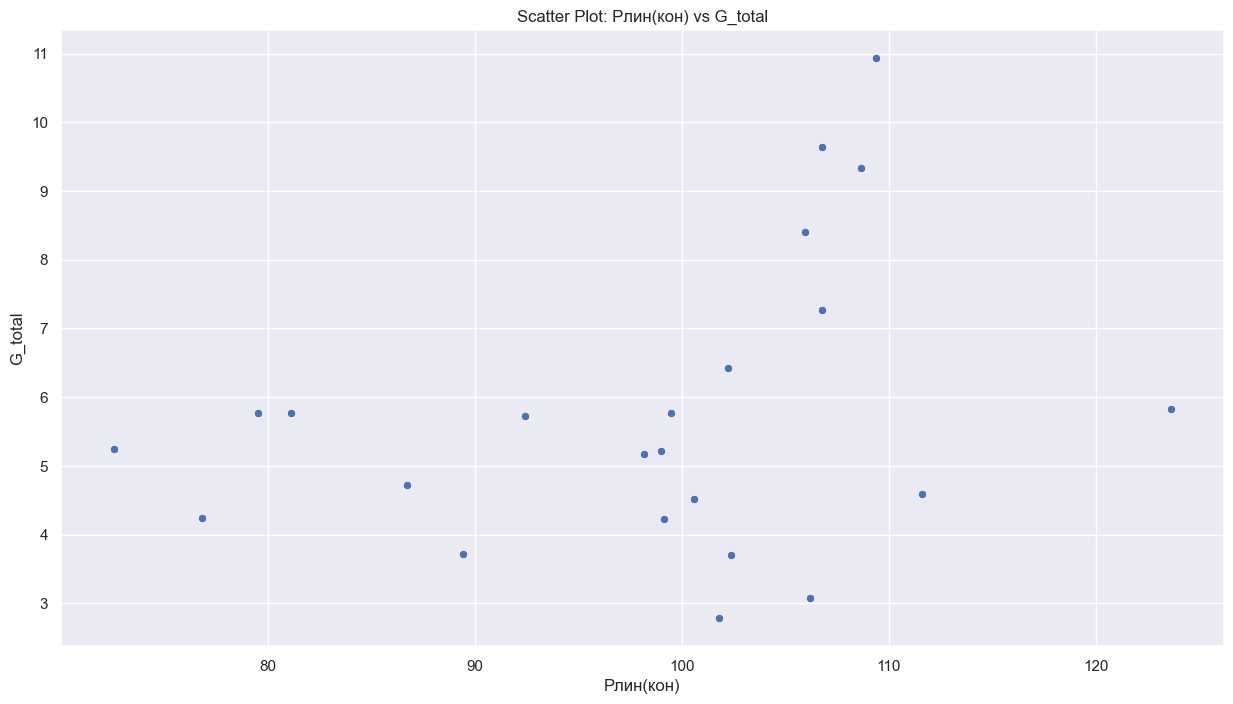

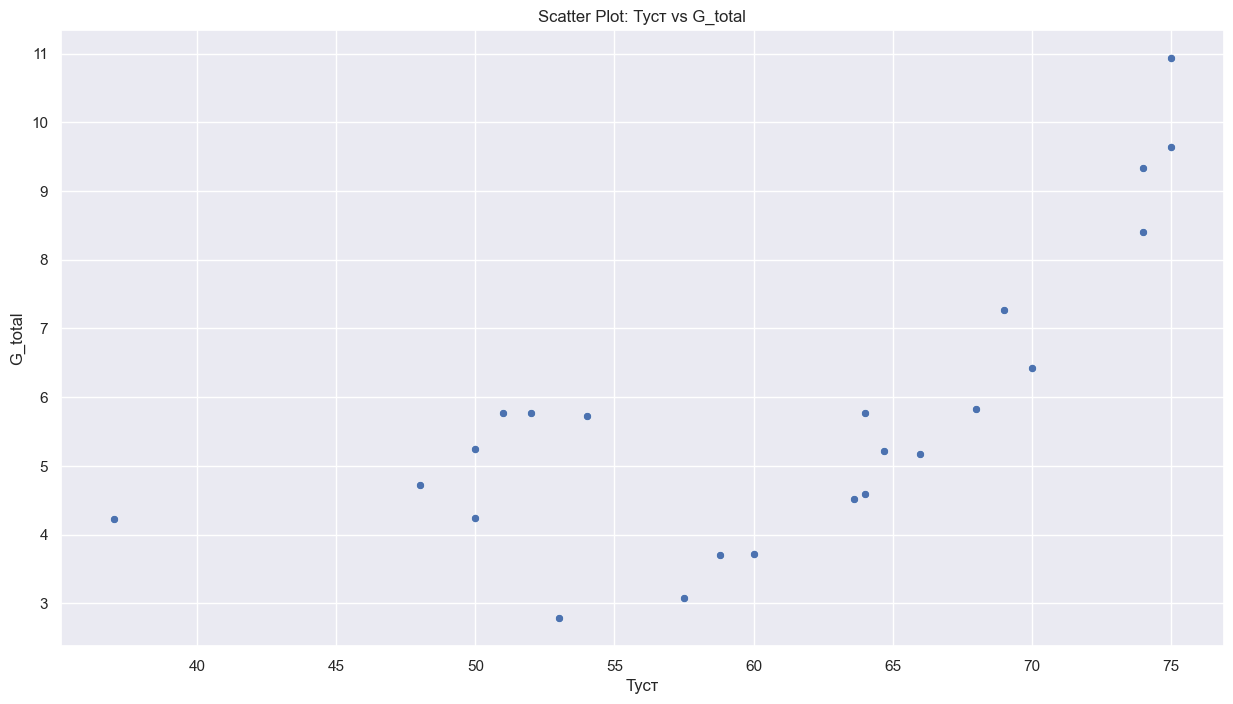

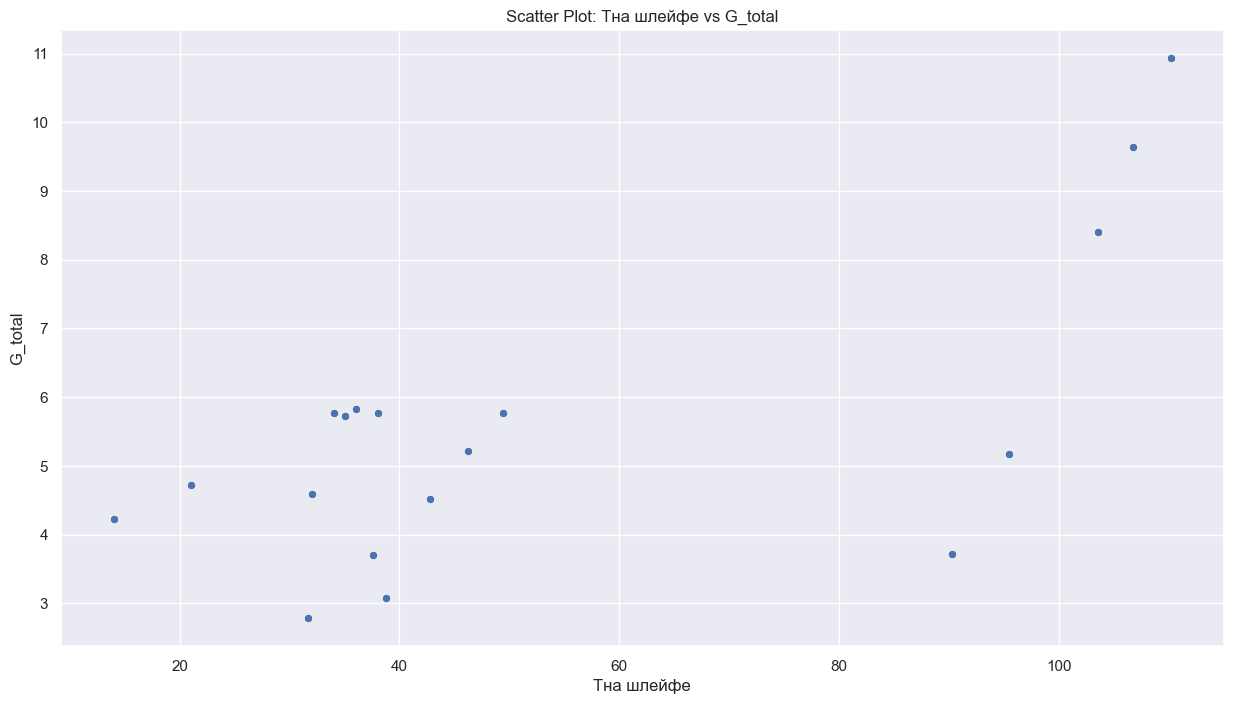

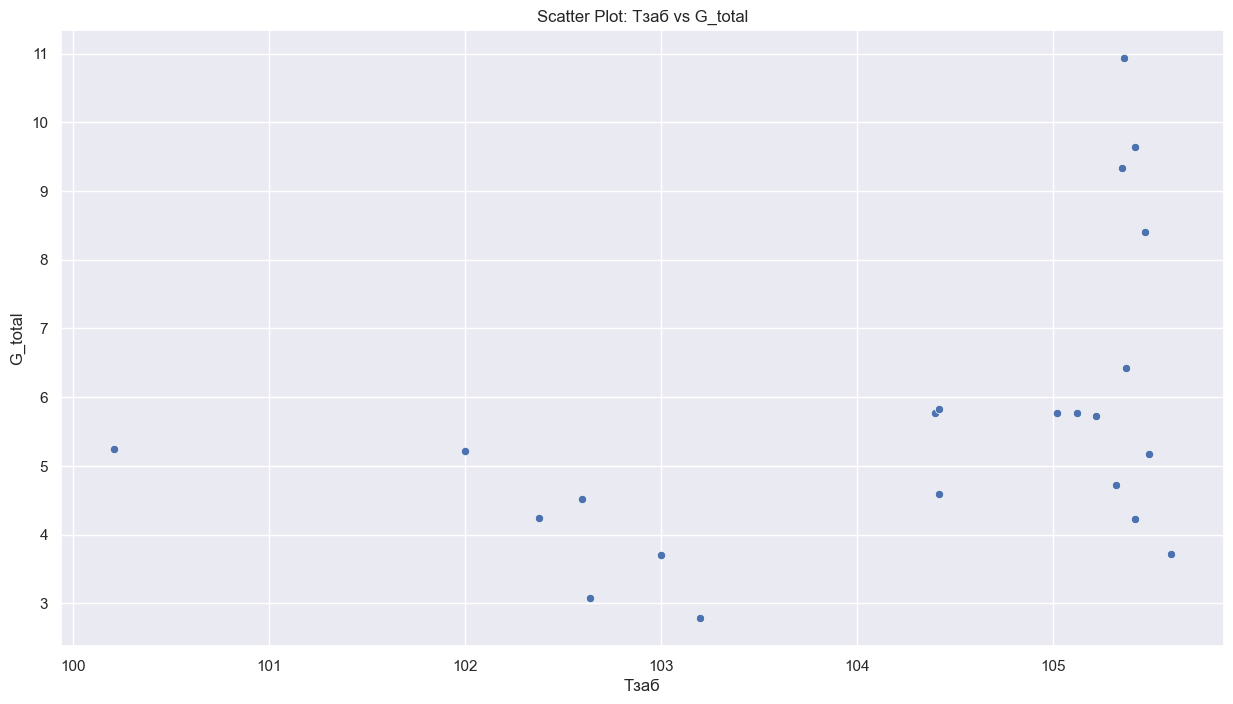

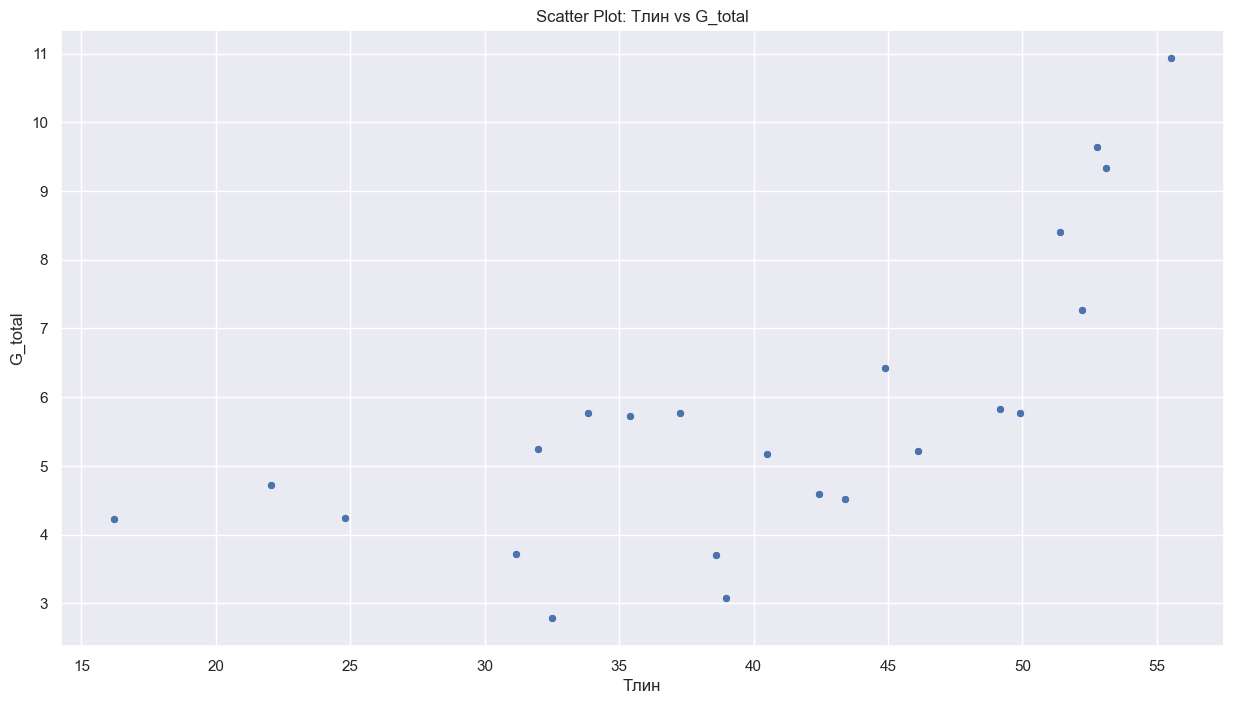

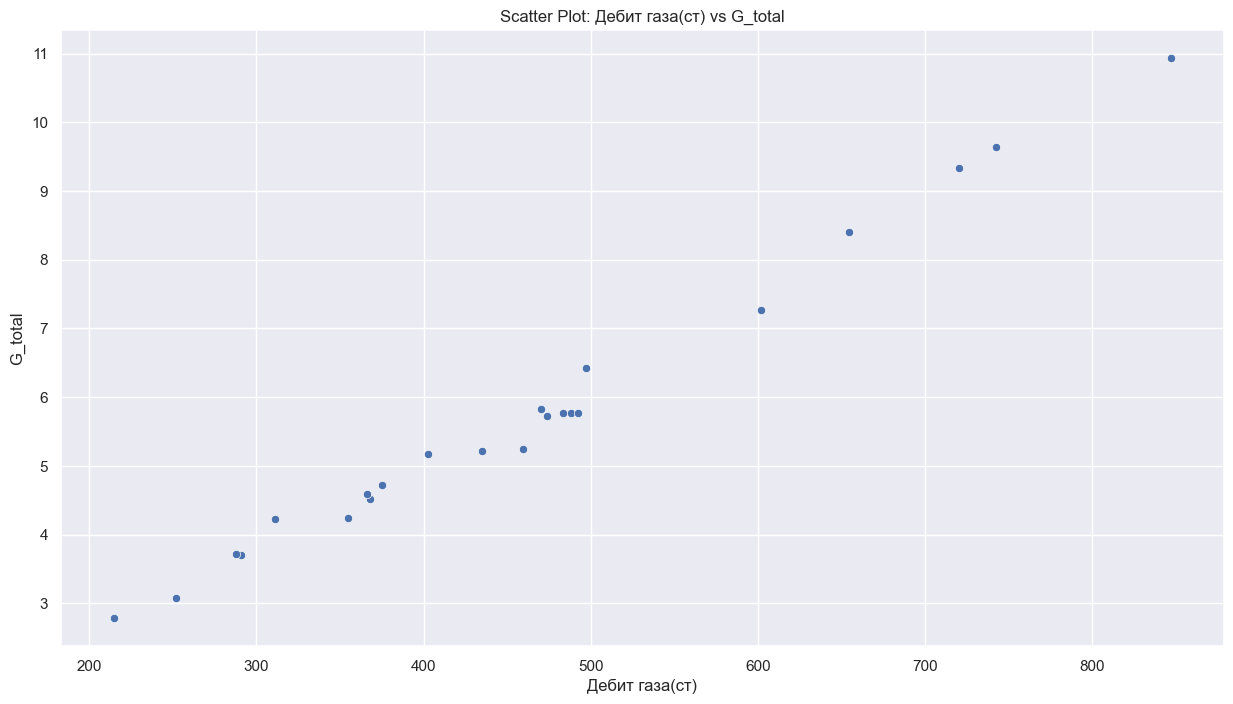

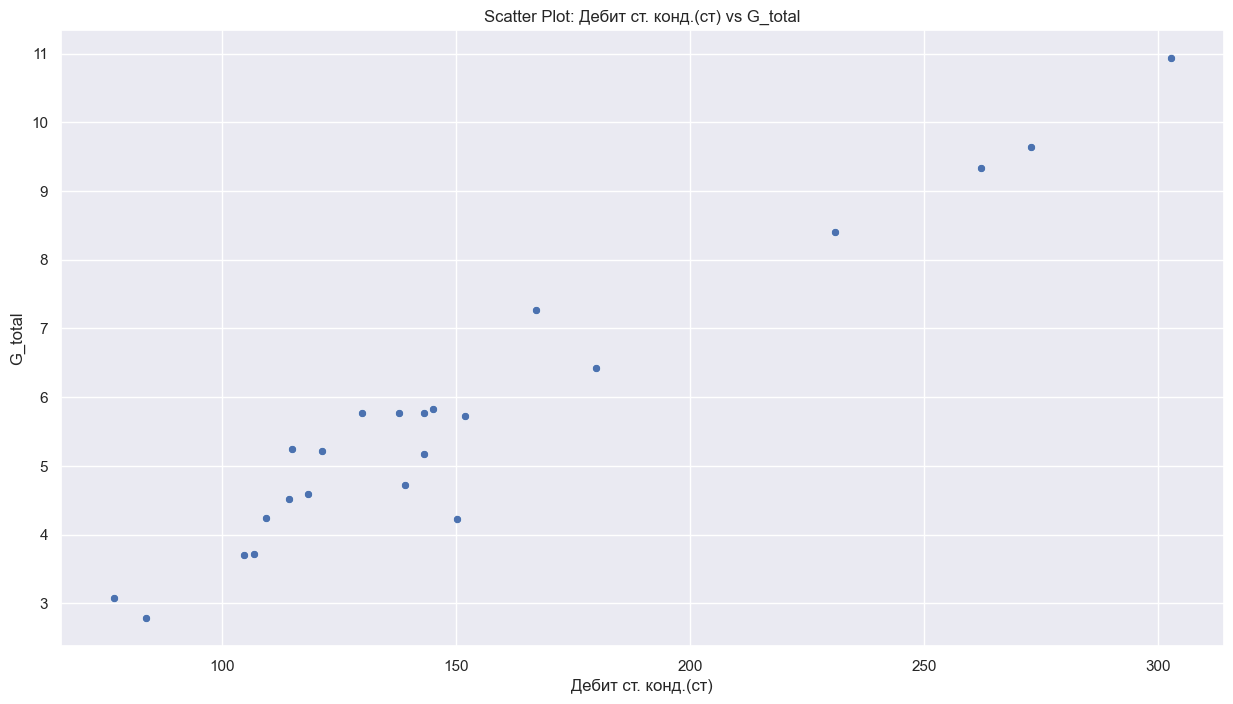

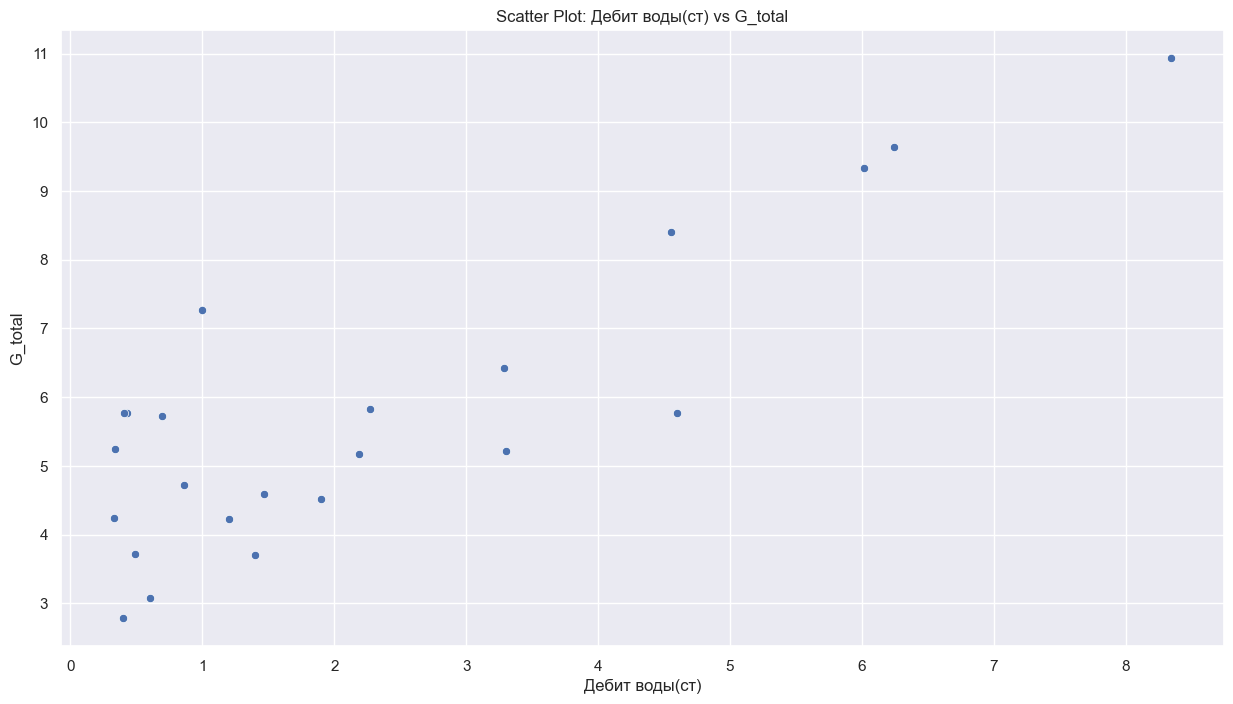

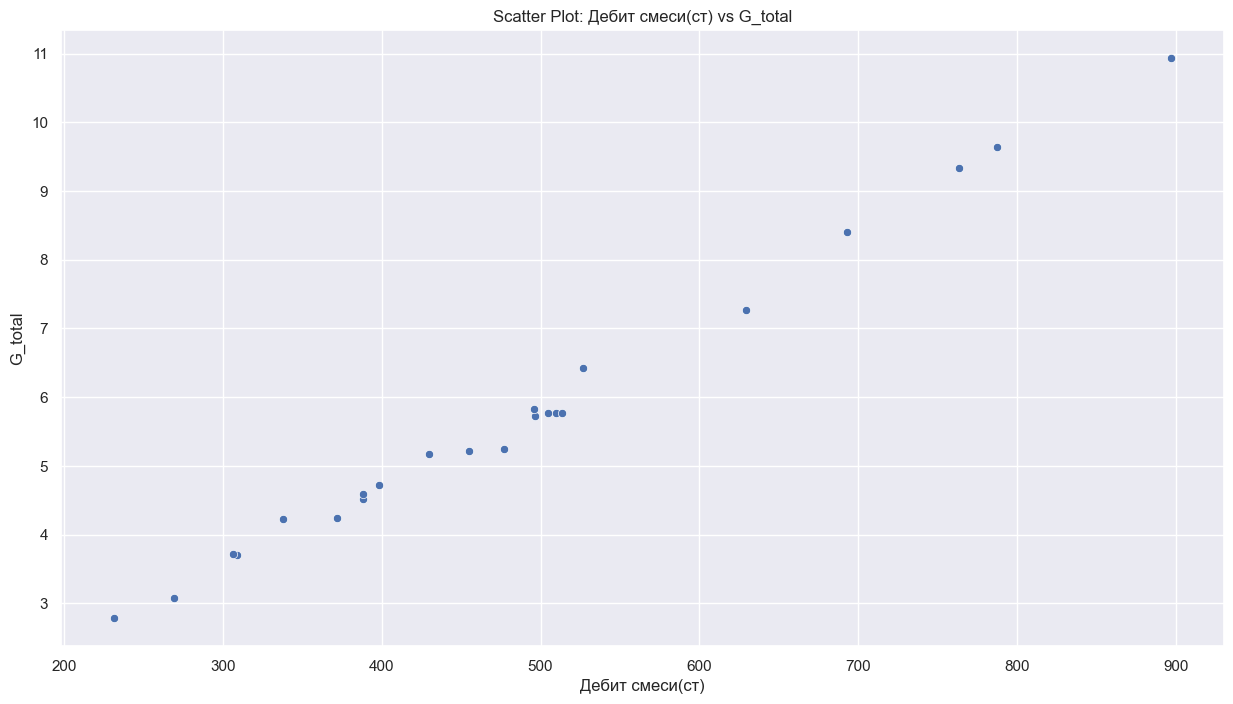

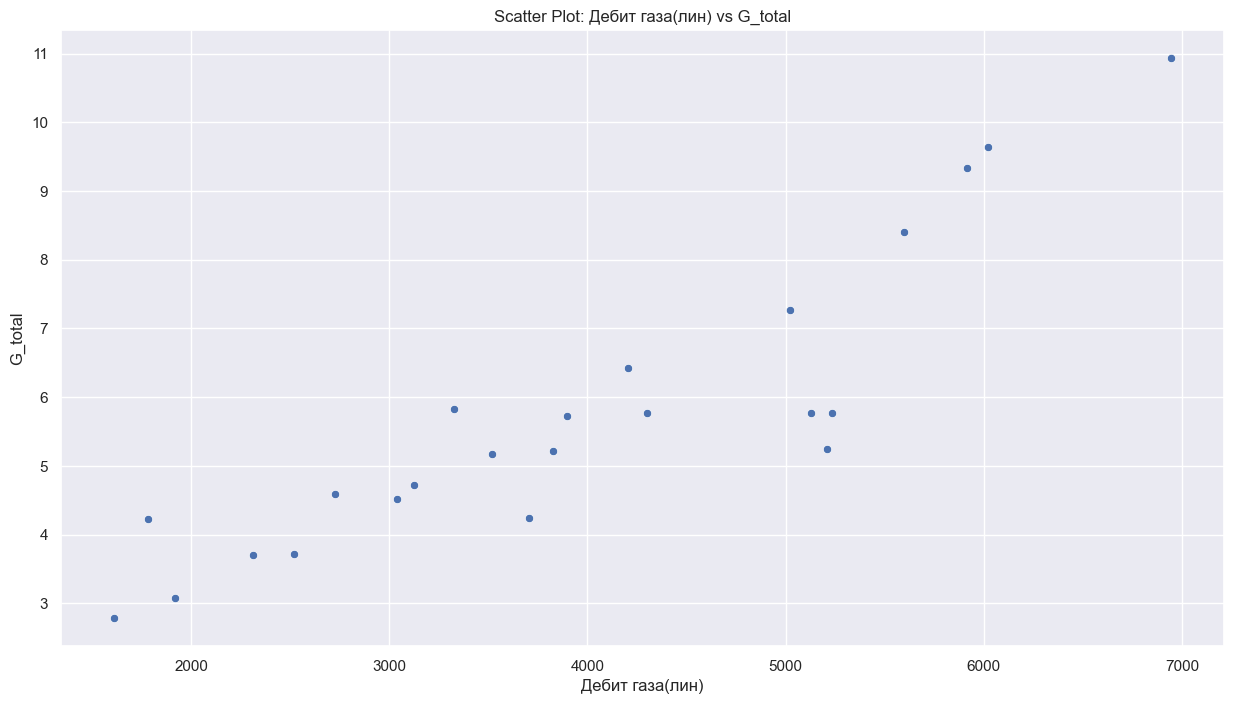

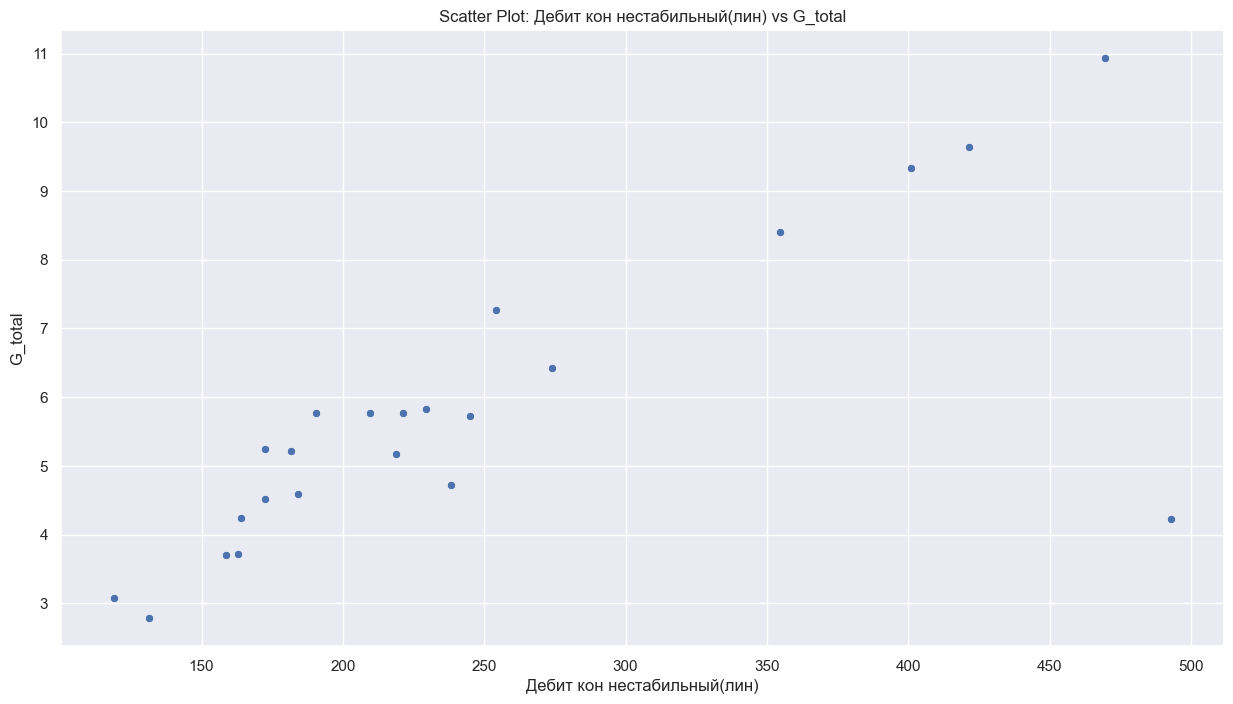

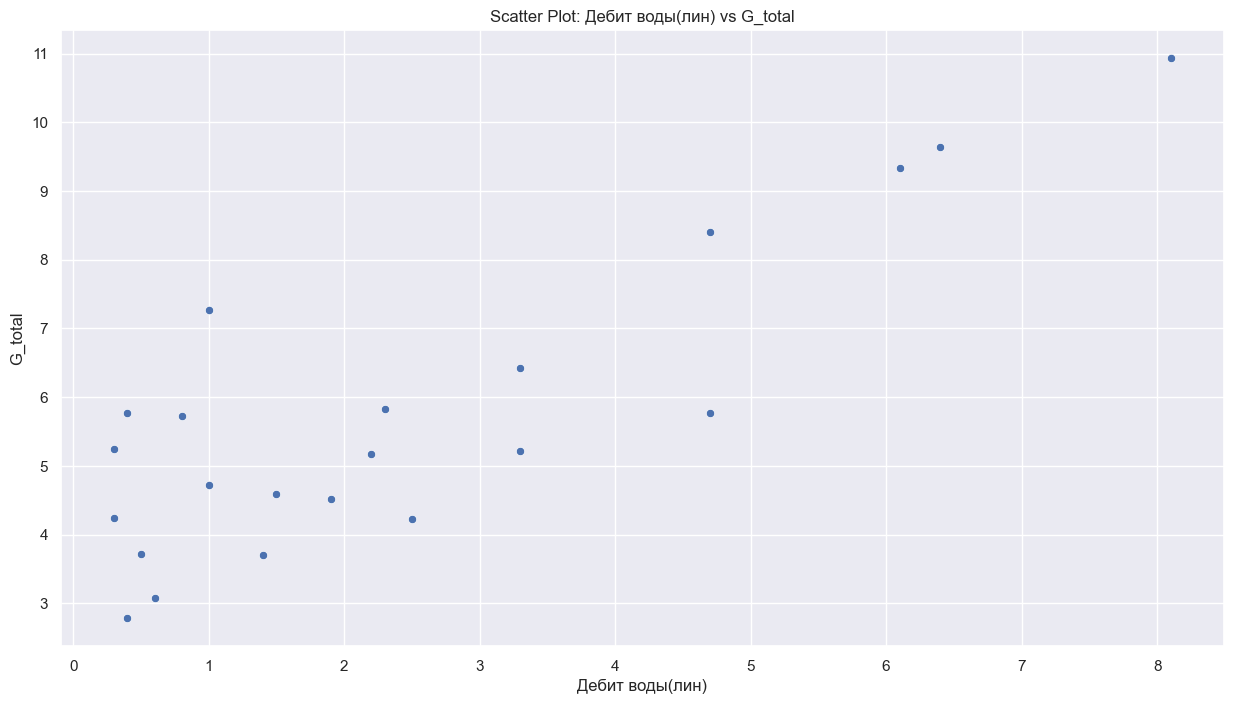

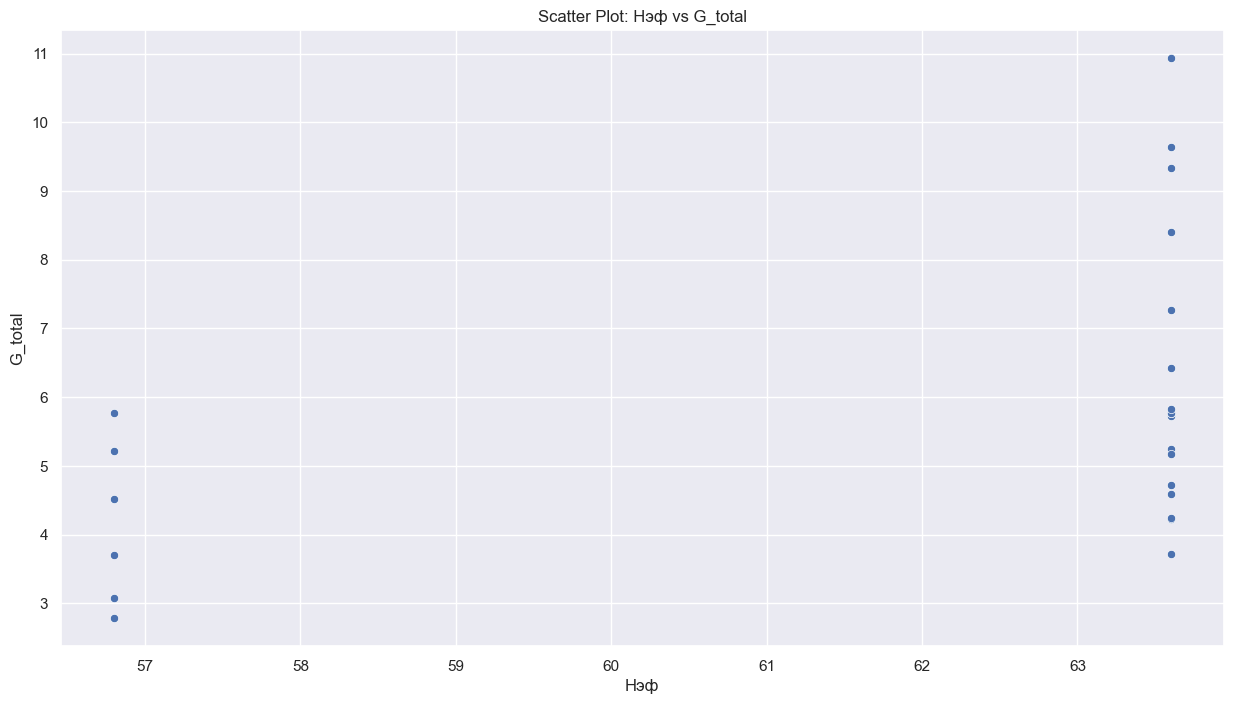

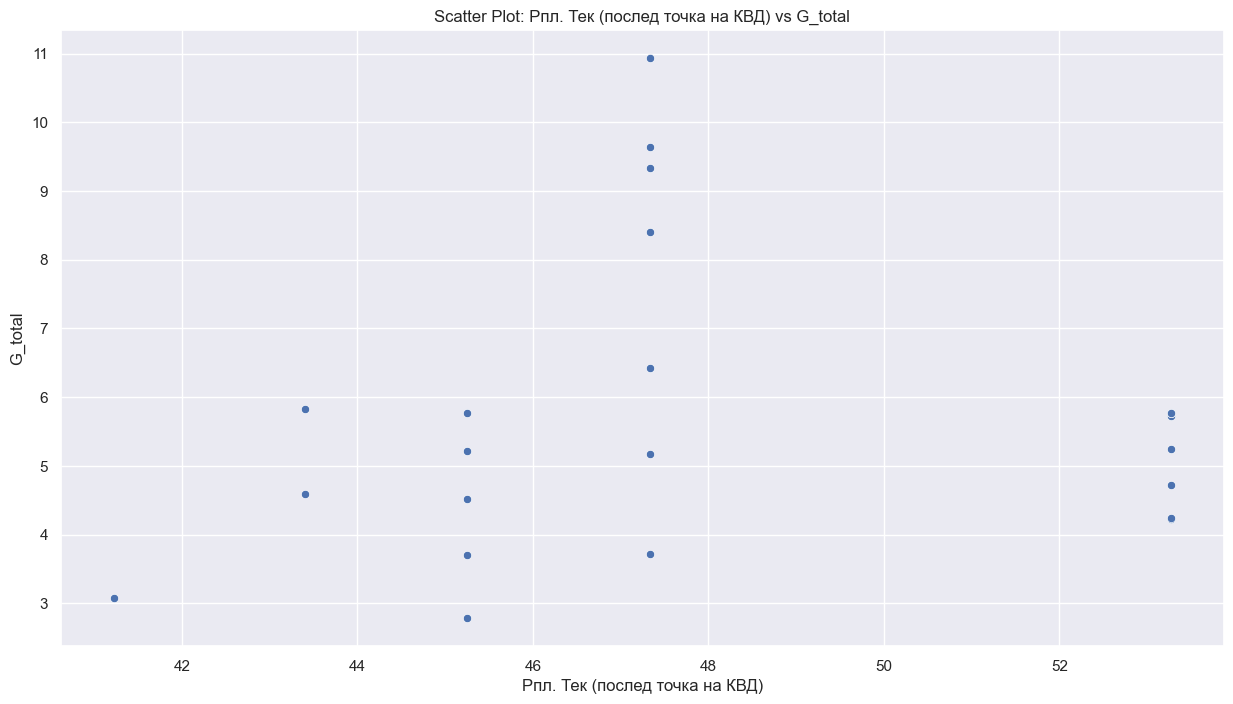

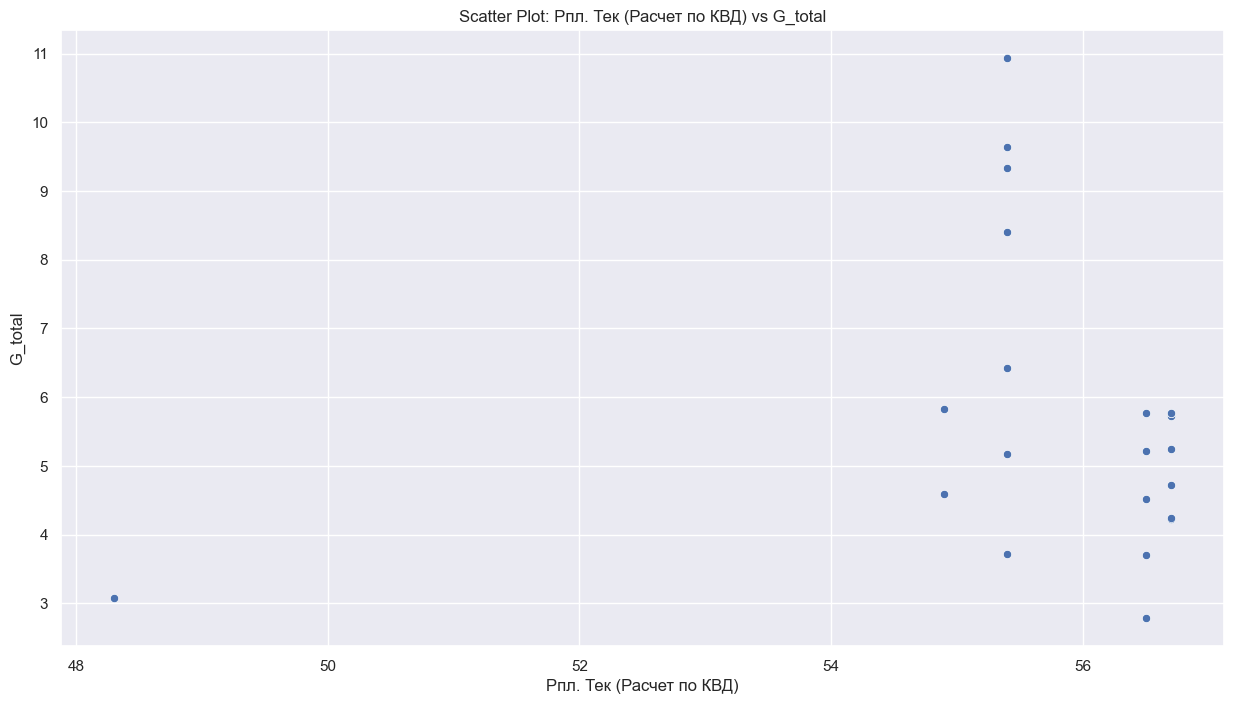

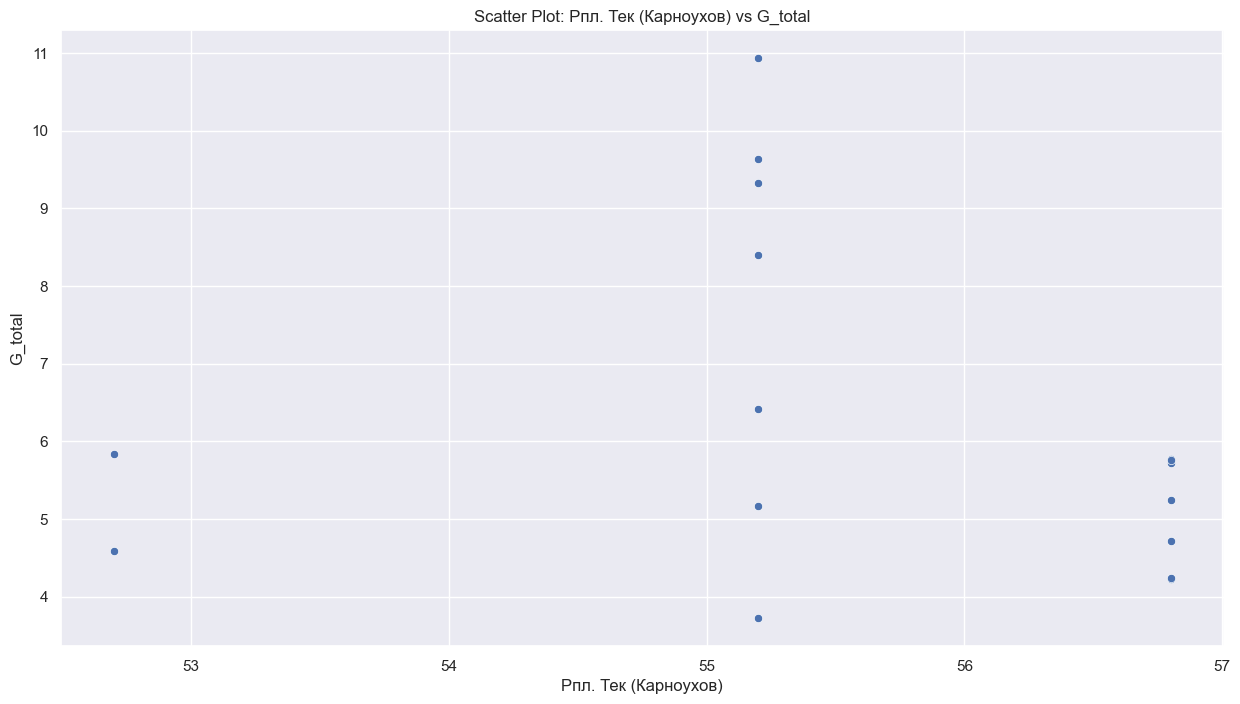

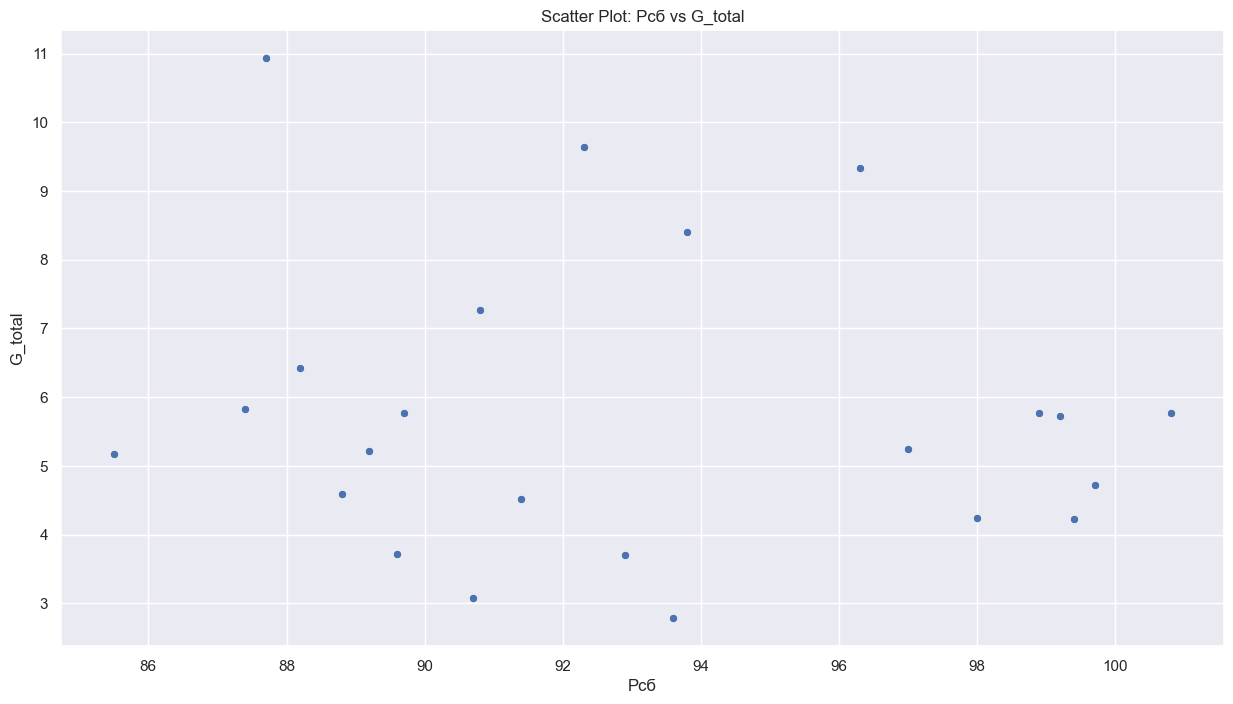

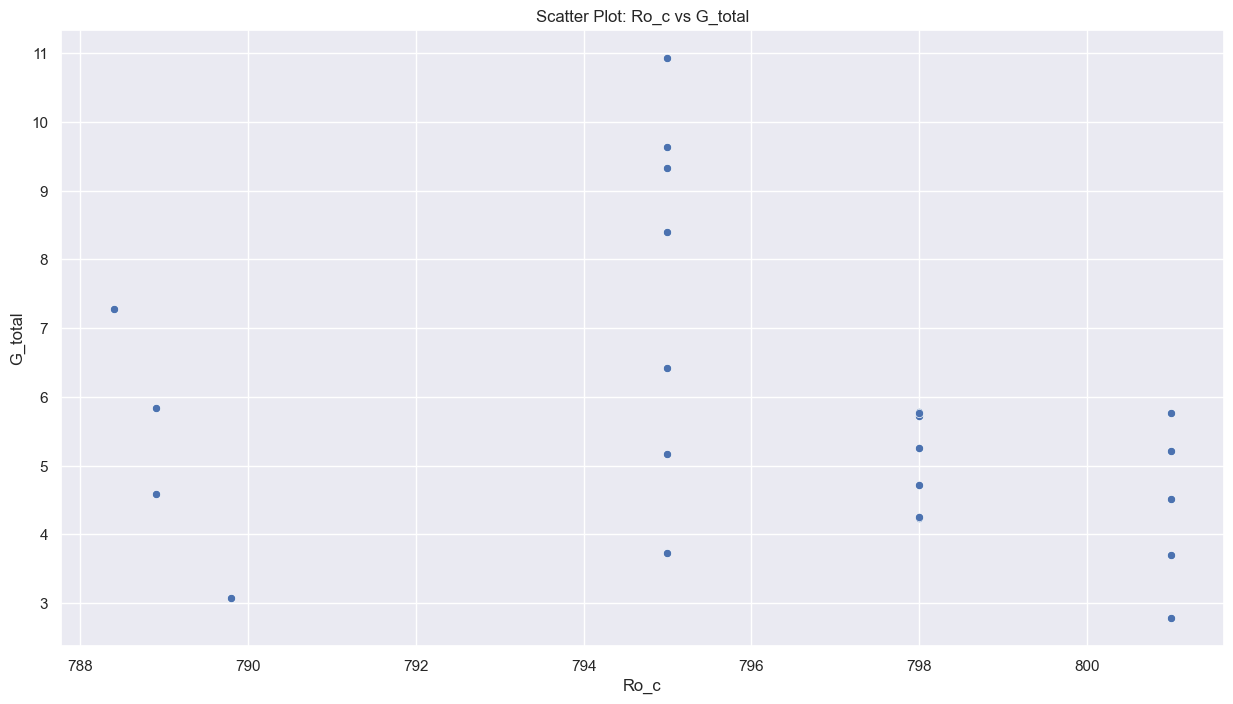

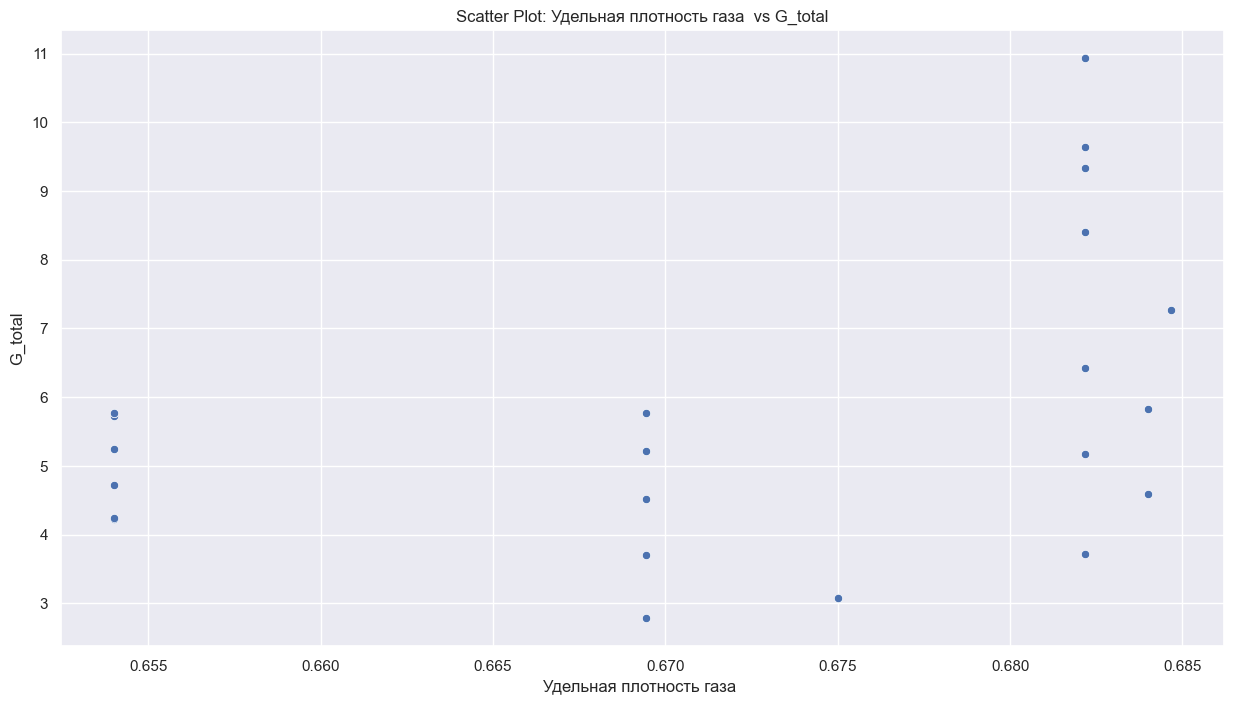

In [14]:
for i in df.columns:
    if i != 'КГФ' and i != 'G_total':
        sns.scatterplot(x=i, y=df.columns[26], data=df)
        plt.title('Scatter Plot: ' + i + " vs " + df.columns[26])
        plt.xlabel(i)
        plt.ylabel(df.columns[26])
        plt.show()

У признака "Удельная плотность газа" пороги слишком далекие, что лишний раз иллюстрирует, что отсекать через интерквартильный размах можно только при близком к нормальному распределении. Однозначно сказать, что слева наблюдается выброс нельзя из-за малого размера выборки. Это вполне может быть состояние потока со скважины.

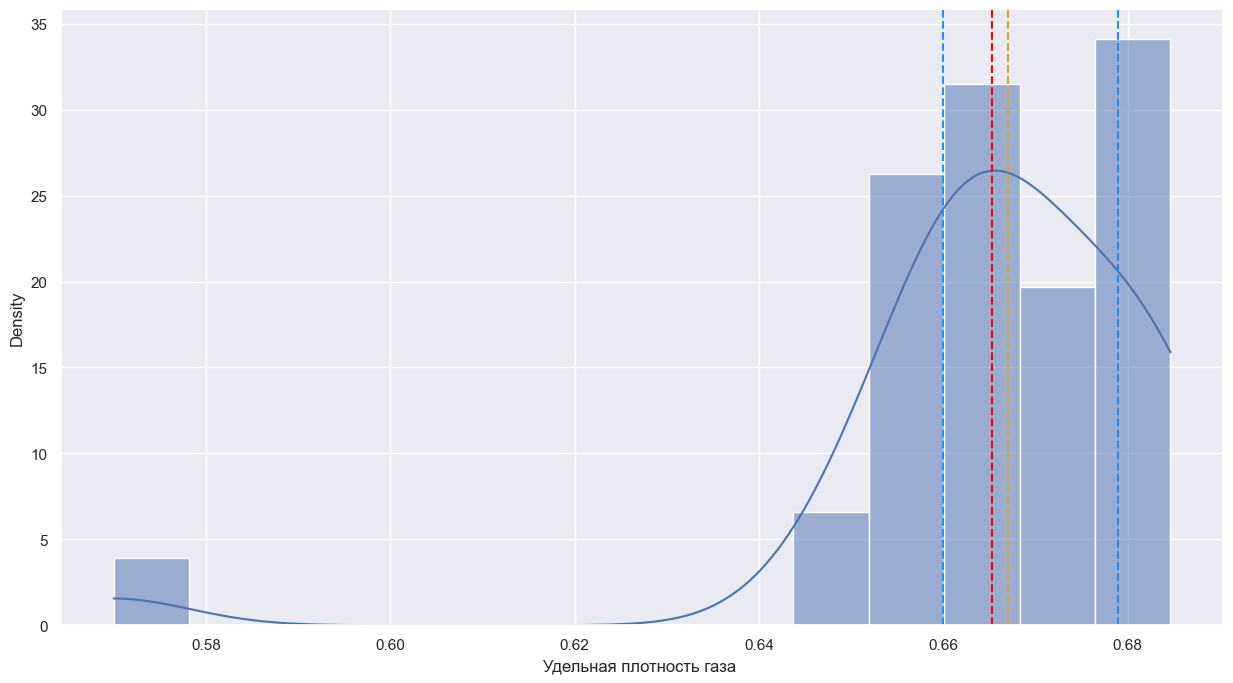

In [15]:
sns.histplot(df[df.columns[25]],kde=True,stat="density")
plt.axvline(f.iloc[3][df.columns[25]], color="dodgerblue", ls='--') #первый квартиль
plt.axvline(f.iloc[4][df.columns[25]], color="red", ls='--') #среднее
plt.axvline(f.iloc[5][df.columns[25]], color="goldenrod", ls='--') #медиана
plt.axvline(f.iloc[6][df.columns[25]], color="dodgerblue", ls='--') #третий квартиль

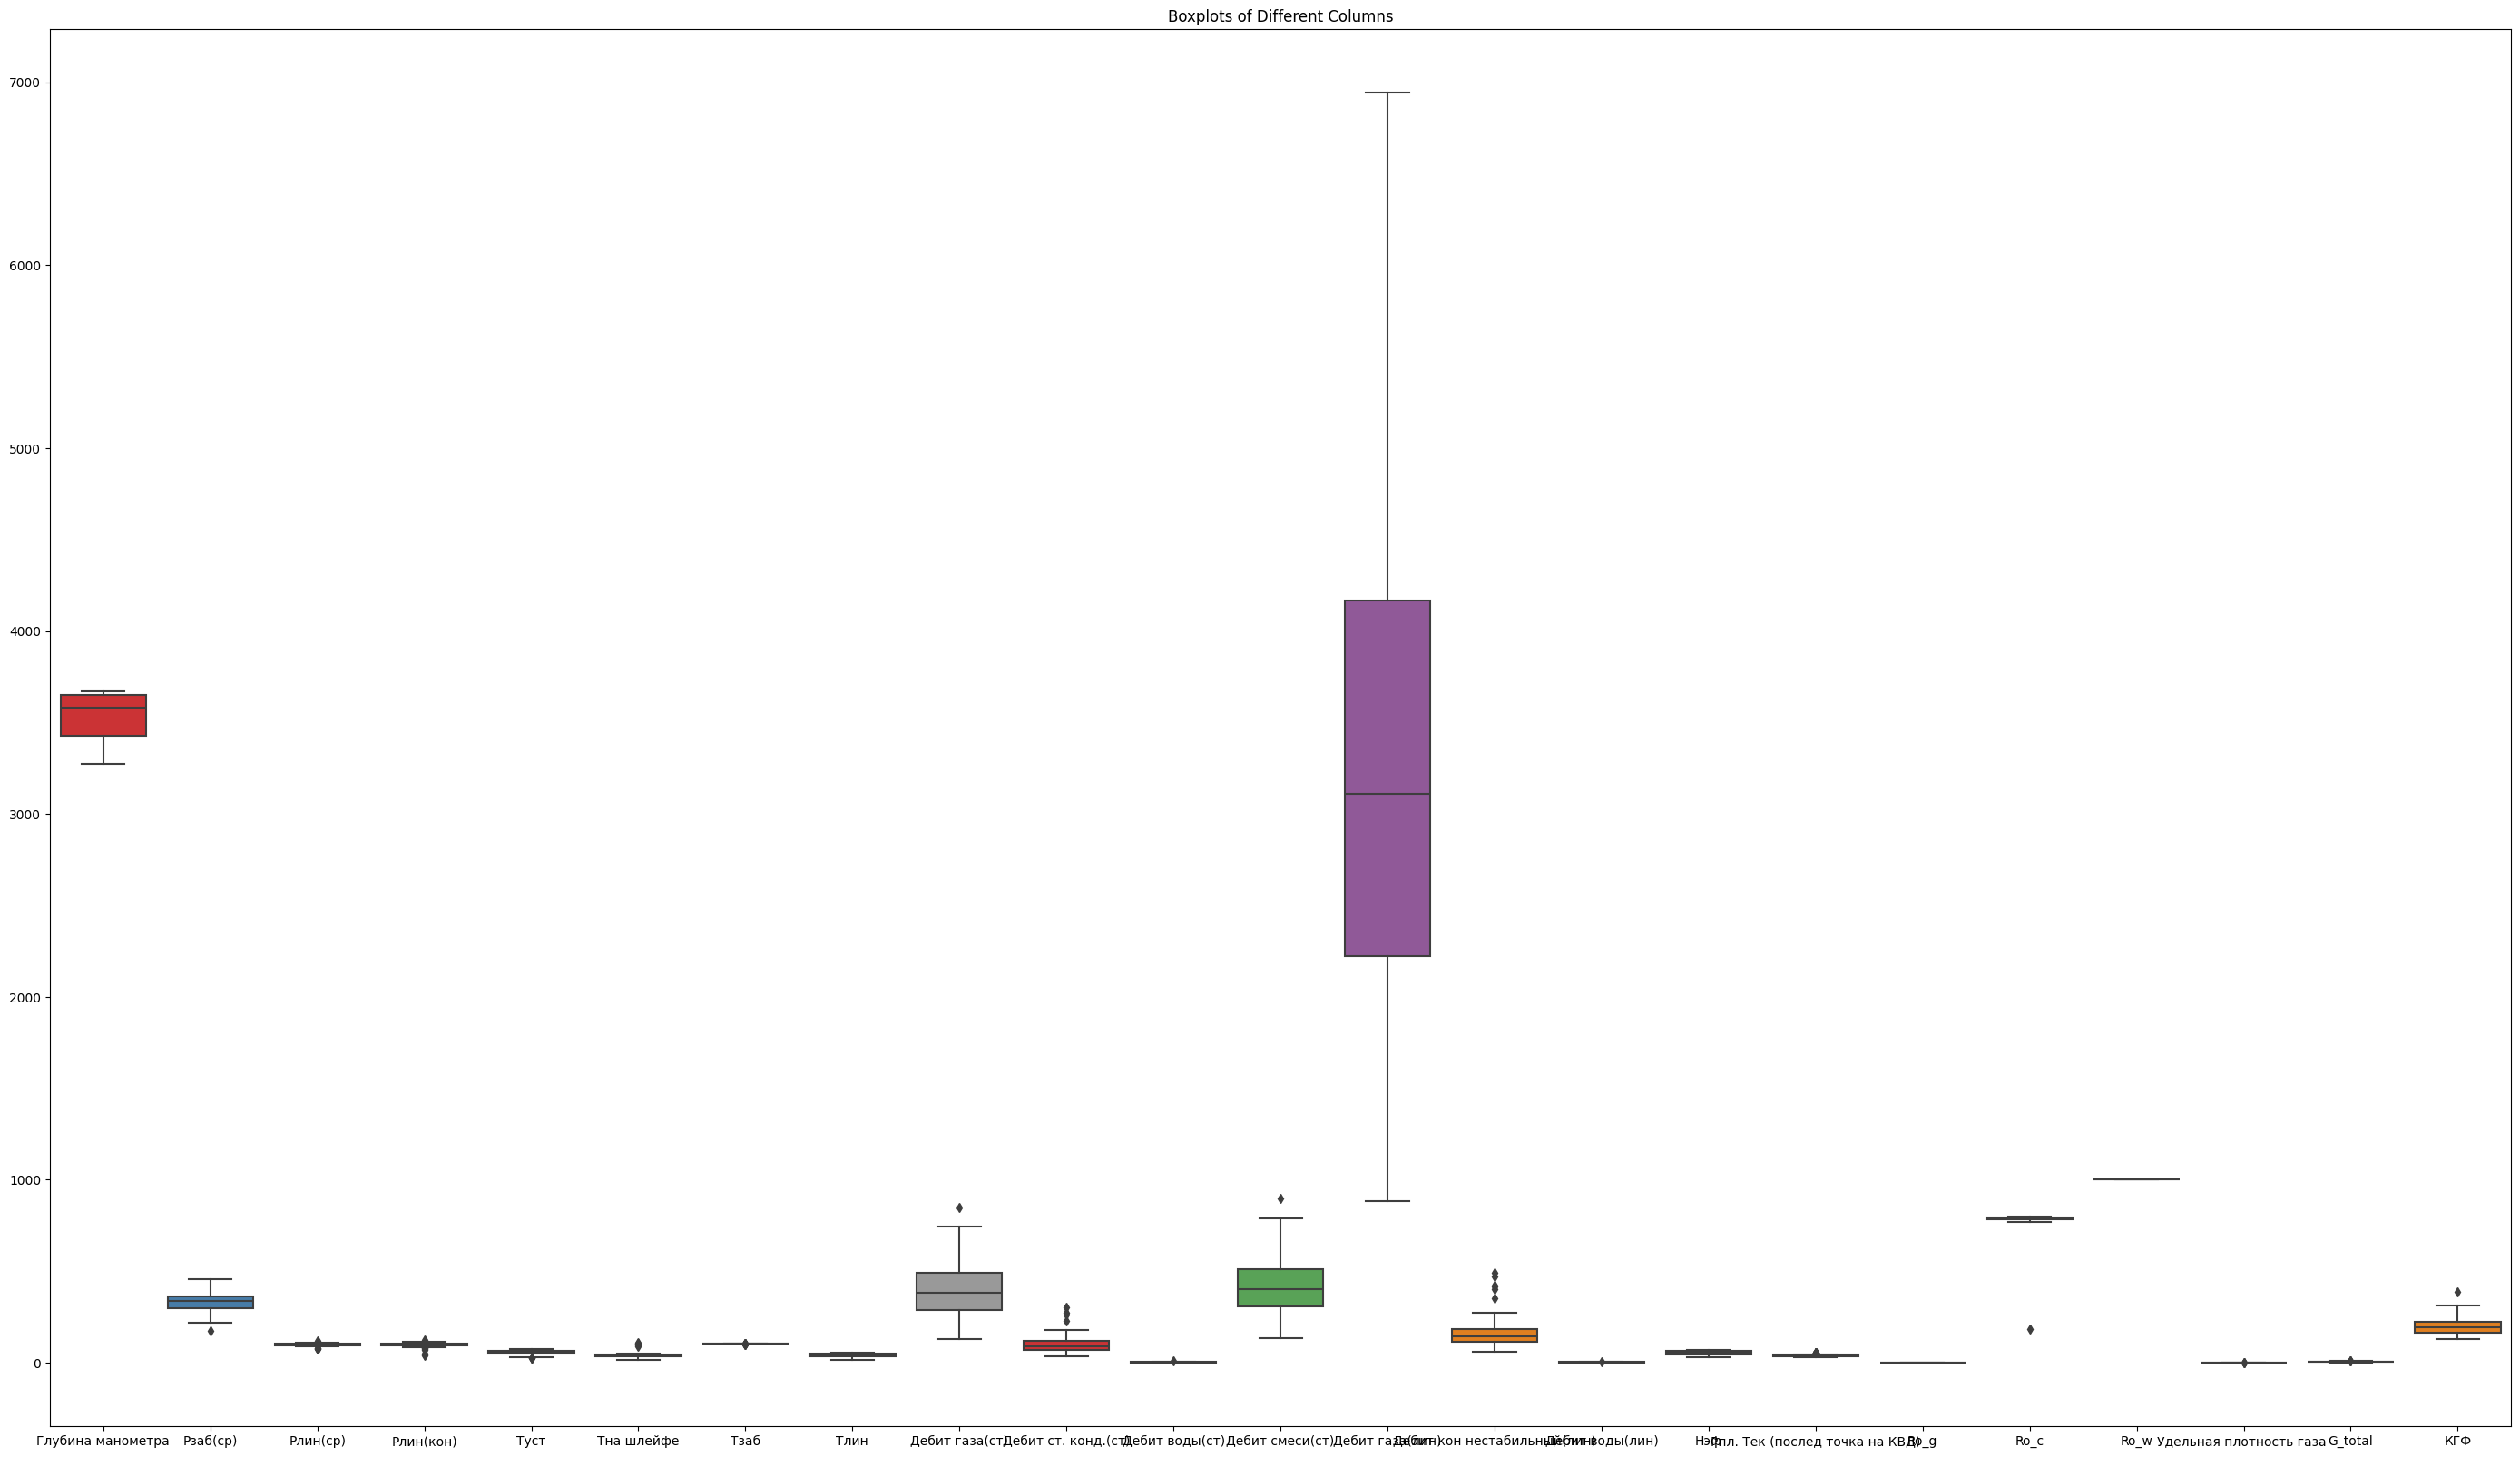

In [27]:
plt.figure(figsize=(35, 20))
sns.boxplot(data=df, palette="Set1")
plt.title('Boxplots of Different Columns')
plt.show()

Некореллируют с G_total по признаку Пирсона
Index(['Руст(ср)', 'Руст(кон)', 'Рпл. Тек (послед точка на КВД)',
       'Рпл. Тек (Расчет по КВД)', 'Pсб'],
      dtype='object')


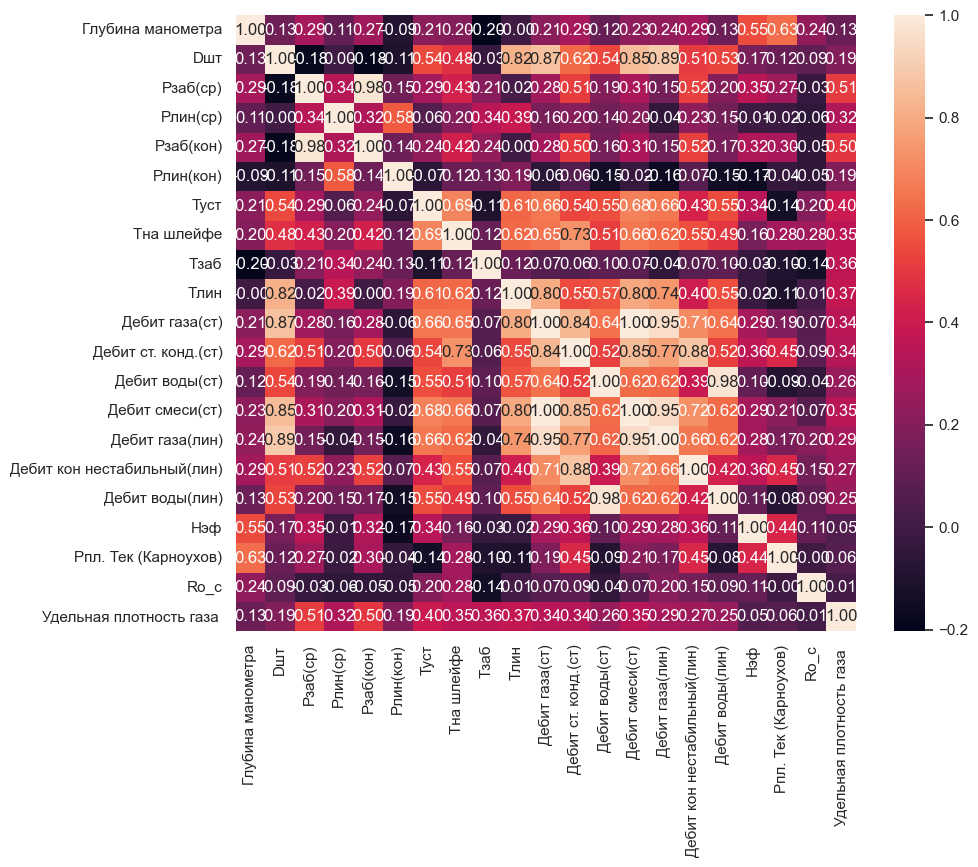

In [16]:
X = df.drop(df.columns[26], axis=1)
X = X.drop(df.columns[27], axis=1)
y = df[df.columns[26]]

# Рассчитываем коэффициенты корреляции Пирсона между признаками и целевой переменной
correlations = X.corrwith(y)

# Фильтруем признаки с корреляцией выше заданного порога по отношению к целевой
threshold = 0.15
high_corr_features = correlations[correlations.abs() > threshold].index.tolist()
missing_ones_G = correlations[correlations.abs() < threshold].index.tolist()

# Выбираем данные только с высококоррелированными признаками
X_filtered = X[high_corr_features]

# Также стоит проверить корреляцию между отобранными признаками
corr_matrix = X_filtered.corr()

print("Некореллируют с " + df.columns[26] + " по признаку Пирсона")
print(X[missing_ones_G].columns)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

Некореллируют с КГФ по признаку Пирсона
Index(['Pлин(ср)', 'Тзаб', 'Дебит газа(ст)', 'Дебит смеси(ст)',
       'Дебит газа(лин)', 'Дебит воды(лин)', 'Нэф', 'Pсб', 'Ro_c',
       'Удельная плотность газа '],
      dtype='object')


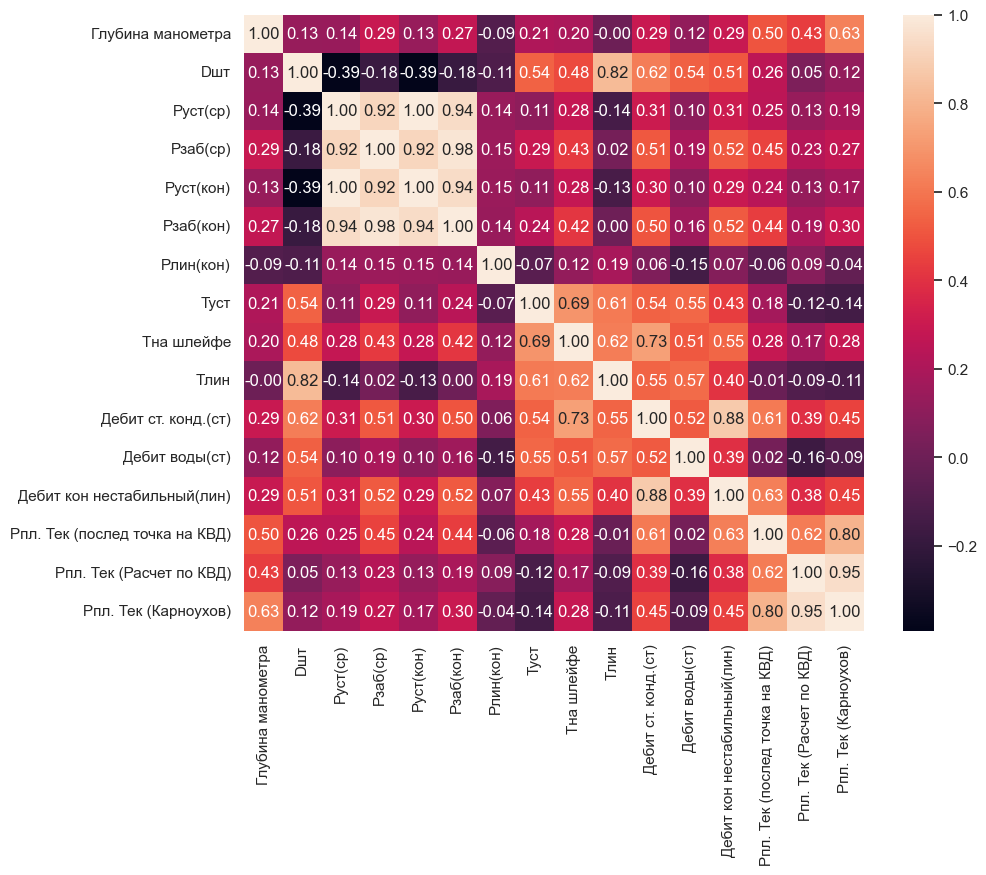

In [17]:
X = df.drop(df.columns[26], axis=1)
X = X.drop(df.columns[27], axis=1)
y = df[df.columns[27]]

# Рассчитываем коэффициенты корреляции Пирсона между признаками и целевой переменной
correlations = X.corrwith(y)

# Фильтруем признаки с корреляцией выше заданного порога
threshold = 0.15
high_corr_features = correlations[correlations.abs() > threshold].index.tolist()
missing_ones_K = correlations[correlations.abs() < threshold].index.tolist()

# Выбираем данные только с высококоррелированными признаками
X_filtered = X[high_corr_features]

# Также стоит проверить корреляцию между отобранными признаками
corr_matrix = X_filtered.corr()

print("Некореллируют с " + df.columns[27] + " по признаку Пирсона")
print(X[missing_ones_K].columns)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [18]:
for el in X[missing_ones_G].columns:
    for _el in X[missing_ones_K].columns:
        if el==_el:
            print(el)

Pсб


Эти переменные слабо кореллируют с целевыми КГФ и G_total

Очень явно кореллируют Руст(ср) Руст(кон) Рзаб(ср) Рзаб(кон) и судя по названию одни из значений были взяты как 
среднее. В этой ситуации хочется избежать мультиколлинеарности по 4 признакам и оставить хотя бы 2, руст и рзаб
между собой кореллируют, но с другими признаками ведут себя по-разному, так оставим
признаки со средним значением (не просто так ведь они были составлены, почтим того, кто усреднял). 

In [18]:
df = df.drop(['Pсб','Руст(кон)','Руст(ср)','Рзаб(кон)','Dшт','Рпл. Тек (Карноухов)','Рпл. Тек (Расчет по КВД)'], axis=1)


In [20]:
df

Глубина манометра    Рзаб(ср)    Pлин(ср)   Рлин(кон)  Туст  Тна шлейфе  \
0              3576.3  370.100000  101.800000  101.800000  53.0        31.7   
1              3576.3  364.600000  101.300000  102.400000  58.8        37.6   
2              3576.3  357.100000  101.600000  100.600000  63.6        42.8   
3              3576.3  347.400000   98.400000   99.000000  64.7        46.2   
4              3576.3  337.700000   99.200000   99.500000  64.0        49.4   
5              3576.3  286.400000  106.361669  106.190000  57.5        38.8   
6              3667.0  354.333525  102.932004  101.565484  56.0         NaN   
7              3667.0  350.200000  103.186902  103.322581  61.0         NaN   
8              3667.0  344.000000  105.671499  105.588710  65.0         NaN   
9              3667.0  336.700000  108.100063  108.144839  42.0         NaN   
10             3579.0  365.860000  103.471415  101.420323  52.0        27.2   
11             3579.0  342.270000  103.200466  104.180000  58.0        34.6   
12             3579.0  312.270000  103.187111  103.000000  61.0        41.2   
13             3579.0  291.740000  103.229928  103.917419  62.0        43.7   
14             3579.0  263.030000  107.377560  107.536667  63.0        49.2   
15             3582.5  292.000000  105.507978  105.030000  56.0        37.4   
16             3653.0  440.500000  108.886435   99.167355  37.0        14.0   
17             3653.0  388.700000   89.652839   86.747194  48.0        21.0   
18             3653.0  308.800000   97.877045   92.457903  54.0        35.0   
19             3653.0  270.500000   79.952750   81.146774  52.0        34.0   
20             3653.0  239.300000   80.732932   79.541129  51.0        38.0   
21             3653.0  251.300000   73.306638   72.579258  50.0         NaN   
22             3653.0  296.800000   76.572068   76.819516  50.0         NaN   
23             3650.0  458.600000   91.045545   89.433677  60.0        90.3   
24             3650.0  452.800000   97.787995   98.179065  66.0        95.5   
25             3650.0  437.300000  103.108052  105.977097  74.0       103.6   
26             3650.0  426.200000  107.062626  106.771290  75.0       106.8   
27             3650.0  414.000000  109.784475  109.390323  75.0       110.2   
28             3650.0  414.800000  108.633163  108.640000  74.0         NaN   
29             3650.0  424.500000  100.126341  102.254286  70.0         NaN   
30             3653.0  403.400000  111.381880  111.612903  64.0        32.0   
31             3653.0  399.200000  121.682930  123.616800  68.0        36.0   
32                NaN         NaN  107.555531  106.770000  69.0         NaN   
33             3572.0  341.500000  106.000000  114.700000  25.0         NaN   
34             3572.0  330.000000  105.900000  103.800000  31.0         NaN   
35             3572.0  316.000000  108.900000  108.700000  37.0         NaN   
36             3572.0  301.600000  101.700000  108.400000  37.0         NaN   
37             3588.5  359.900000  100.200000  100.200000  57.0        33.0   
38             3588.5  346.900000   98.900000   98.800000  62.0        38.5   
39             3588.5  330.500000   94.500000   93.100000  66.0        42.9   
40             3588.5  314.200000   96.900000   97.000000  68.0        47.9   
41             3588.5  297.500000   98.200000   98.300000  68.0        51.0   
42             3588.5  306.900000   97.200000   97.600000  67.0         NaN   
43                NaN         NaN  100.369642  100.260000  58.0         NaN   
44             3478.5  347.000000   93.852163   94.363065  57.0        34.3   
45             3478.5  342.000000   94.360181   94.184839  60.0        38.5   
46                NaN         NaN  102.135191  102.230000  66.0         NaN   
47             3640.5  403.000000  105.384230  105.950323  47.0         NaN   
48             3640.5  396.600000  108.491570  108.117097  59.0         NaN   
49             3640.5  390.000000  107.785976  108.501

# Важность признаков

Так как у нас задача регрессии, то можно использовать по построение вектора важности признаков из рандомизированного леса принятия решений. В качестве функции стоимости здесь лучше подходит MSE. sklearn не умеет работать с пропущеными значениями, поэтому для целей определения важности заполним пропуски значением -100, само значение лучше подбирать исходя из распределений признаков с пропусками. Это конечно дает смещение оценки, но в задаче отбора признаков мы этим можем пренебречь. При построении модели регрессии для решения задачи так делать не стоит.

In [21]:
df1=df.fillna(-100)
X=df1.iloc[:, 0:18]
Y=df1.iloc[:, 19:21]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

RandomForestRegressor(max_depth=20, random_state=0)

<Axes: >

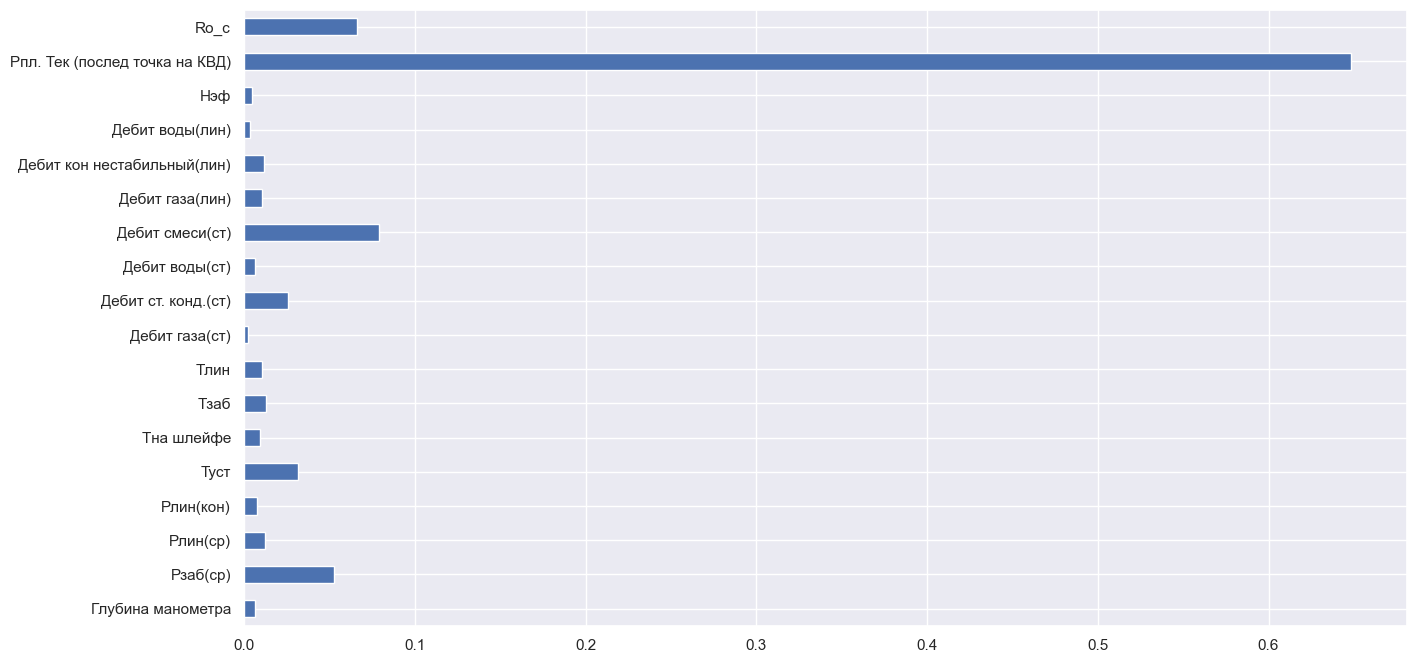

In [22]:
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

In [23]:
feat_importances

Глубина манометра                 0.006350
Рзаб(ср)                          0.052556
Pлин(ср)                          0.012271
Рлин(кон)                         0.007233
Туст                              0.031234
Тна шлейфе                        0.009077
Тзаб                              0.012695
Tлин                              0.010373
Дебит газа(ст)                    0.002188
Дебит ст. конд.(ст)               0.025600
Дебит воды(ст)                    0.006286
Дебит смеси(ст)                   0.078894
Дебит газа(лин)                   0.010588
Дебит кон нестабильный(лин)       0.011348
Дебит воды(лин)                   0.003687
Нэф                               0.004835
Рпл. Тек (послед точка на КВД)    0.648516
Ro_c                              0.066269
dtype: float64

Глубина манометра                 0.003769
Рзаб(ср)                          0.005349
Pлин(ср)                          0.011143
Рлин(кон)                         0.006167
Туст                              0.005275
Тна шлейфе                        0.001772
Тзаб                              0.021704
Tлин                              0.007162
Дебит газа(ст)                    0.000055
Дебит ст. конд.(ст)               0.034460
Дебит воды(ст)                    0.000026
Дебит смеси(ст)                   0.000879
Дебит газа(лин)                   0.000074
Дебит кон нестабильный(лин)       0.004639
Дебит воды(лин)                   0.003087
Нэф                               0.002235
Рпл. Тек (послед точка на КВД)    0.817114
Ro_c                              0.075091
dtype: float64

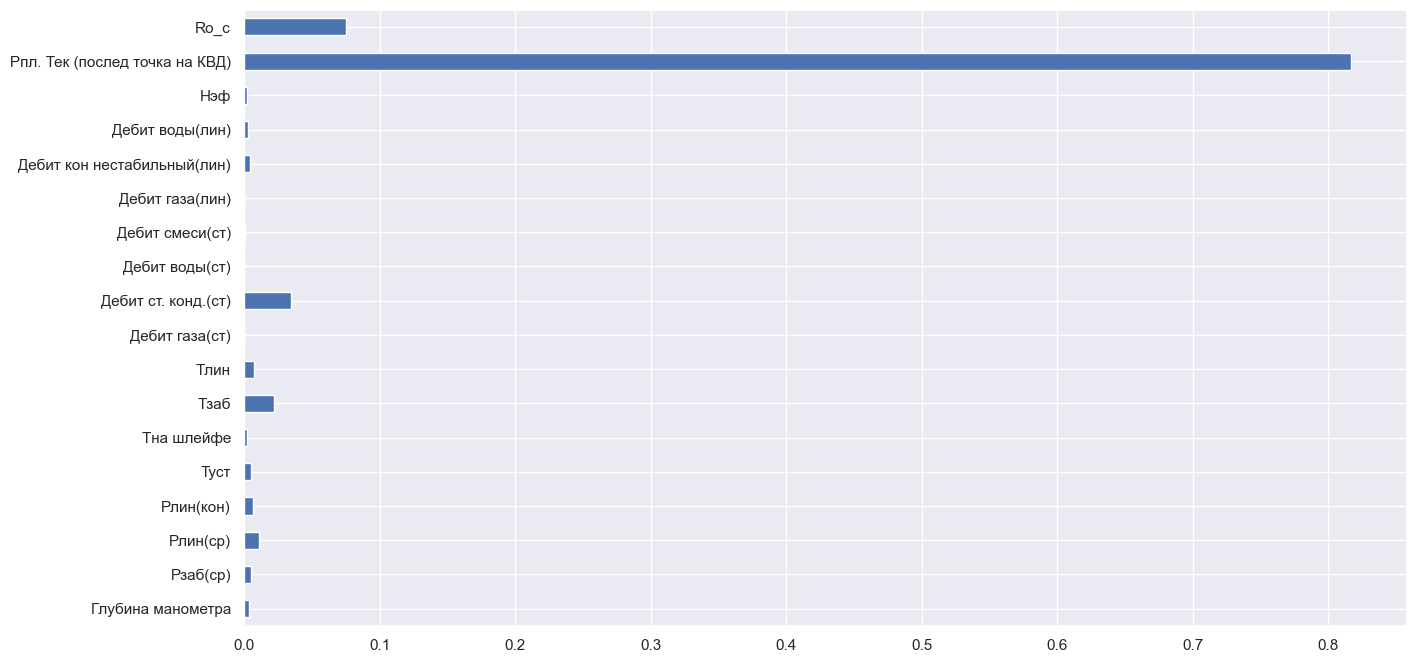

In [24]:
df1=df.fillna(-100)
X=df1.iloc[:, 0:18]
Y=df1.iloc[:, 19]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
feat_importances

In [25]:
print(df.columns[19])

G_total


In [26]:
df1=df.fillna(-100)
X=df1.iloc[:, 0:18]
Y=df1.iloc[:, 20]
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

RandomForestRegressor(max_depth=20, random_state=0)

Глубина манометра                 0.018086
Рзаб(ср)                          0.109260
Pлин(ср)                          0.018677
Рлин(кон)                         0.018974
Туст                              0.042964
Тна шлейфе                        0.004980
Тзаб                              0.014604
Tлин                              0.017359
Дебит газа(ст)                    0.003796
Дебит ст. конд.(ст)               0.008975
Дебит воды(ст)                    0.013727
Дебит смеси(ст)                   0.125322
Дебит газа(лин)                   0.021425
Дебит кон нестабильный(лин)       0.013864
Дебит воды(лин)                   0.008740
Нэф                               0.007232
Рпл. Тек (послед точка на КВД)    0.480374
Ro_c                              0.071642
dtype: float64

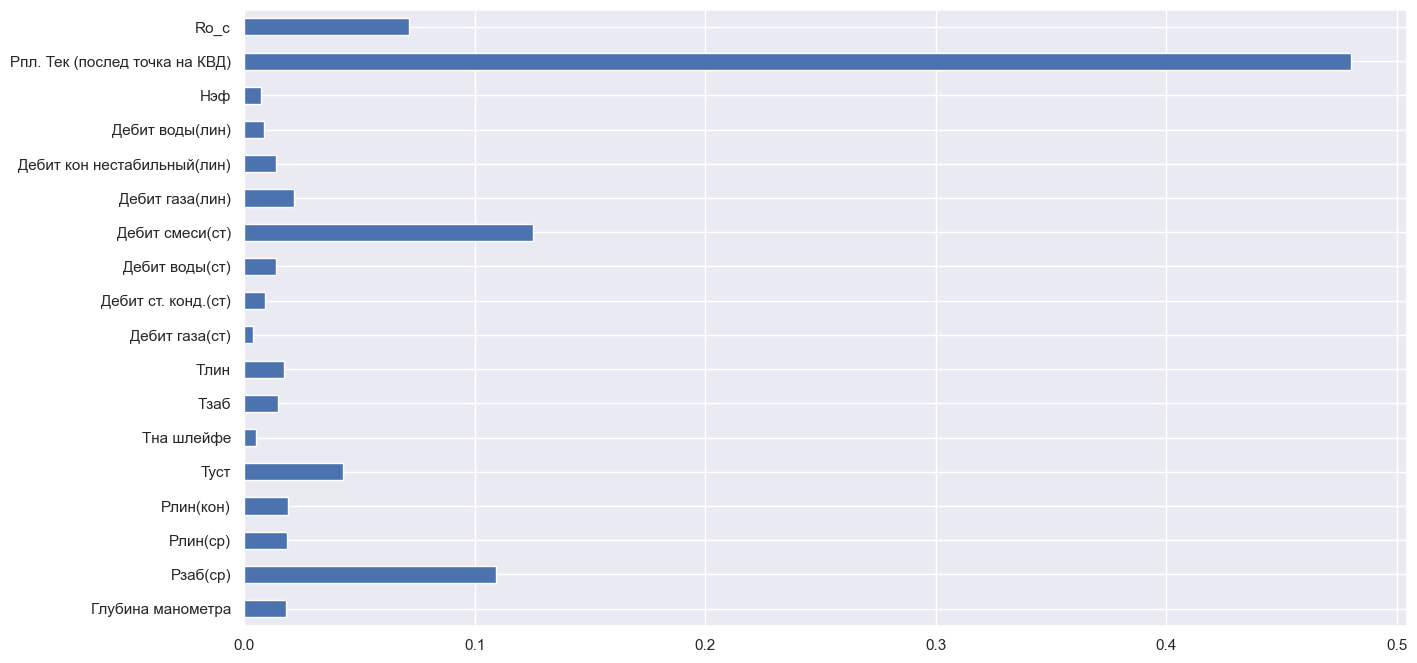

In [27]:
def min_max_normalization(data):
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

df_min_max = min_max_normalization(df)
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
feat_importances

In [28]:
df = df_min_max

<Axes: >

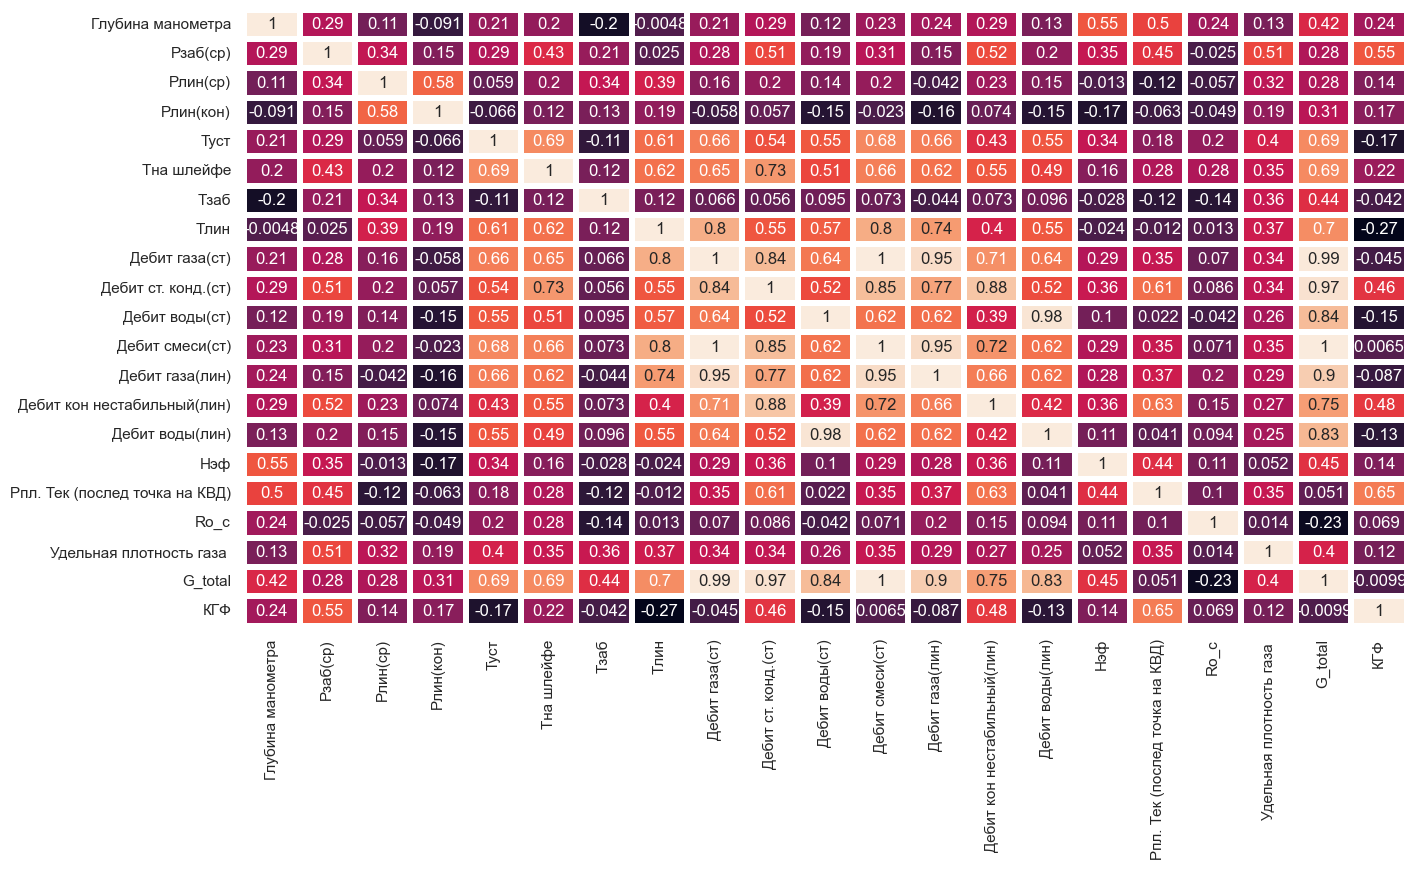

In [29]:

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_min_max.corr(), annot=True, linewidths=3, cbar=False)

1) заметим что Рлин(ср) и Рлин(кон) довольно сильно кореллируют, но при этом Рлин(кон) 
почти не кореллирует с другими признаками и кореллирует 
с целевой переменной сильнее, чем Рлин(ср), поэтому оставим Рлин(кон)

<Axes: >

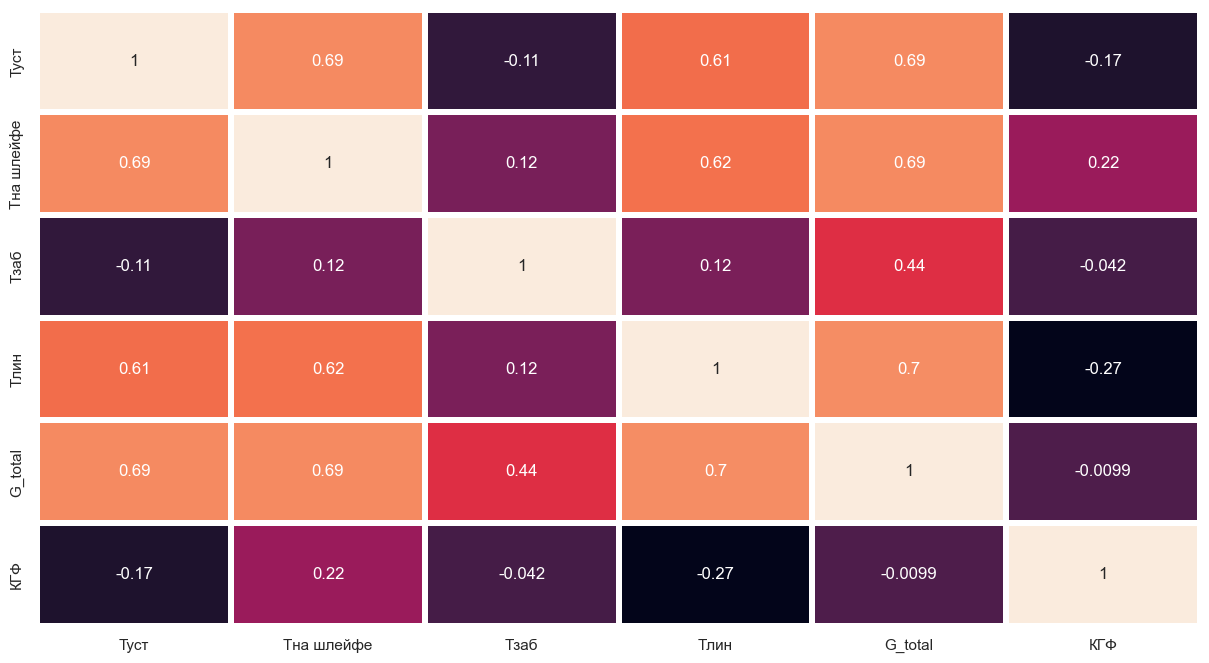

In [30]:
additional_columns = df.columns[19:21]

# Выбираем столбцы из DataFrame, которые нужно включить
selected_columns = df.columns[4:8]

# Объединяем столбцы
dfT = pd.concat([df[selected_columns], df[additional_columns]], axis=1)
sns.heatmap(dfT.corr(), annot=True, linewidths=3, cbar=False)

Имея выводы о значимости признака после рандомного леса и полученной большой коллинеарности между Тлин, Тна шлейфе и Туст - оставляем Туст. Также оставляем Тзаб, так как признак наименее похож на остальные и все равно может использоваться для предсказания G_total (корелляция с КГФ отсутствует)
Продолжим изучать колинеарность между группой признаков Дебит

<Axes: >

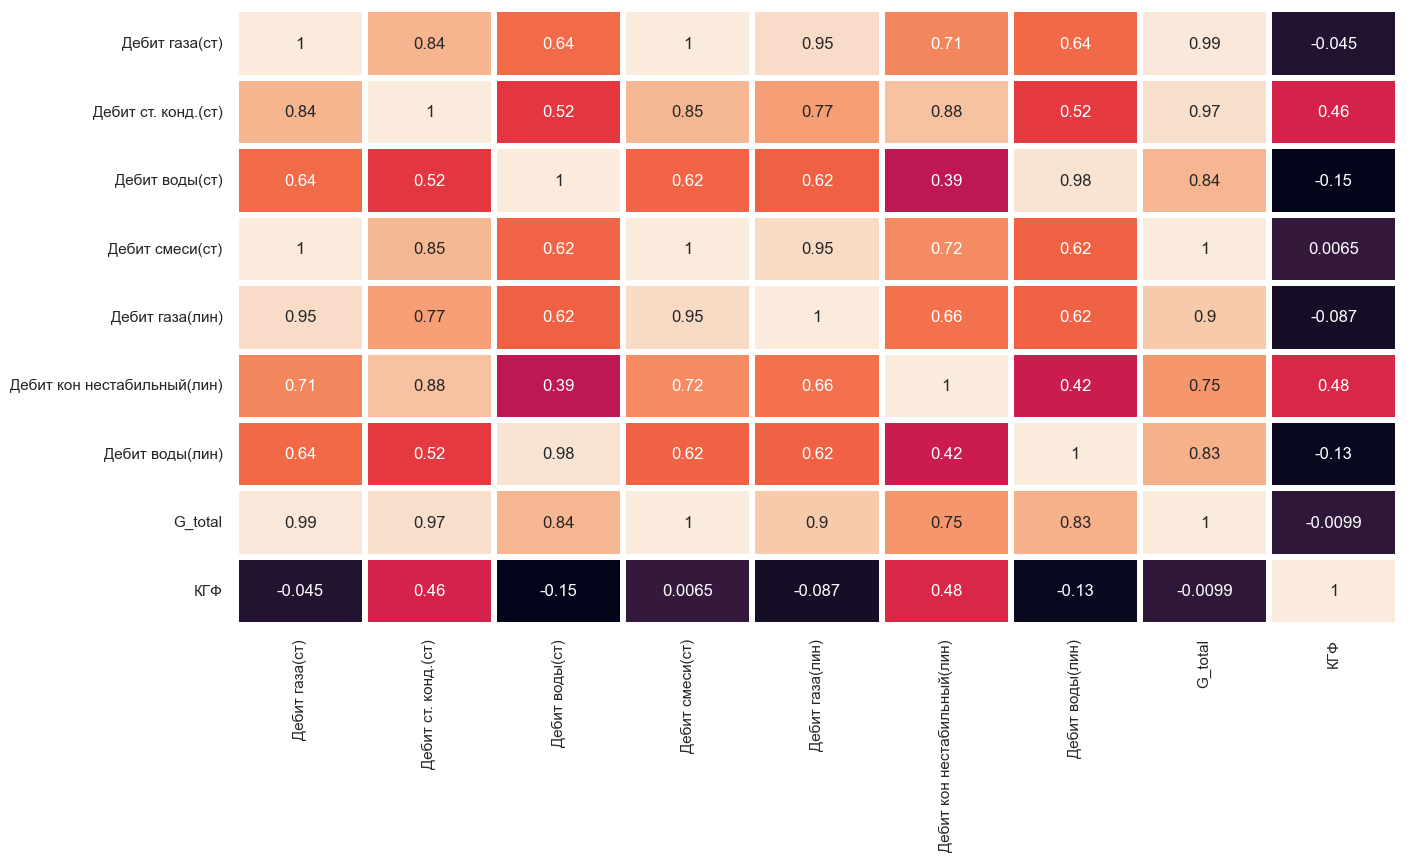

In [31]:
additional_columns = df.columns[19:21]

# Выбираем столбцы из DataFrame, которые нужно включить
selected_columns = df.columns[8:15]

# Объединяем столбцы
dfT = pd.concat([df[selected_columns], df[additional_columns]], axis=1)
sns.heatmap(dfT.corr(), annot=True, linewidths=3, cbar=False)

1) Сразу бросается в глаза кореляция Дебит ст конд(ст) и Дебит кон нестабильный, у них она 0.88, оставляем 
Дебит кон нестабильный тк она сильнее влияет на целевую
2)Дебит воды(ст) и дебит воды(лин) также почти одинаковые, оставляем дебит воды ст за большими значениями 
модуля кореляция
3)Максимальная кореляция среди Дебит газа(ст), Дебит газа(лин), Дебит смеси(ст), и у них высокая кореляция с G_total
и они не коррелируют с КГФ. Оставляем Дебит смеси(ст)

<Axes: >

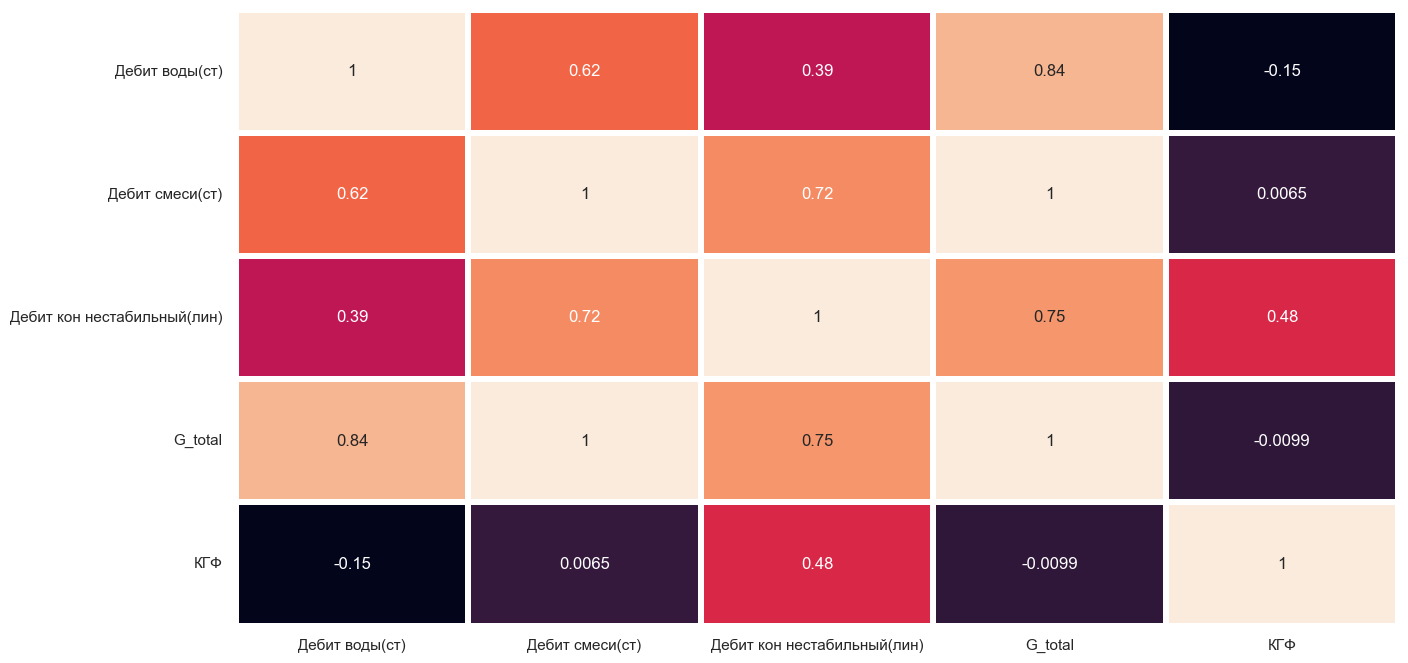

In [32]:
dfT = dfT.drop(['Дебит ст. конд.(ст)', 'Дебит воды(лин)', 'Дебит газа(ст)', 'Дебит газа(лин)'], axis=1)
sns.heatmap(dfT.corr(), annot=True, linewidths=3, cbar=False)

<Axes: >

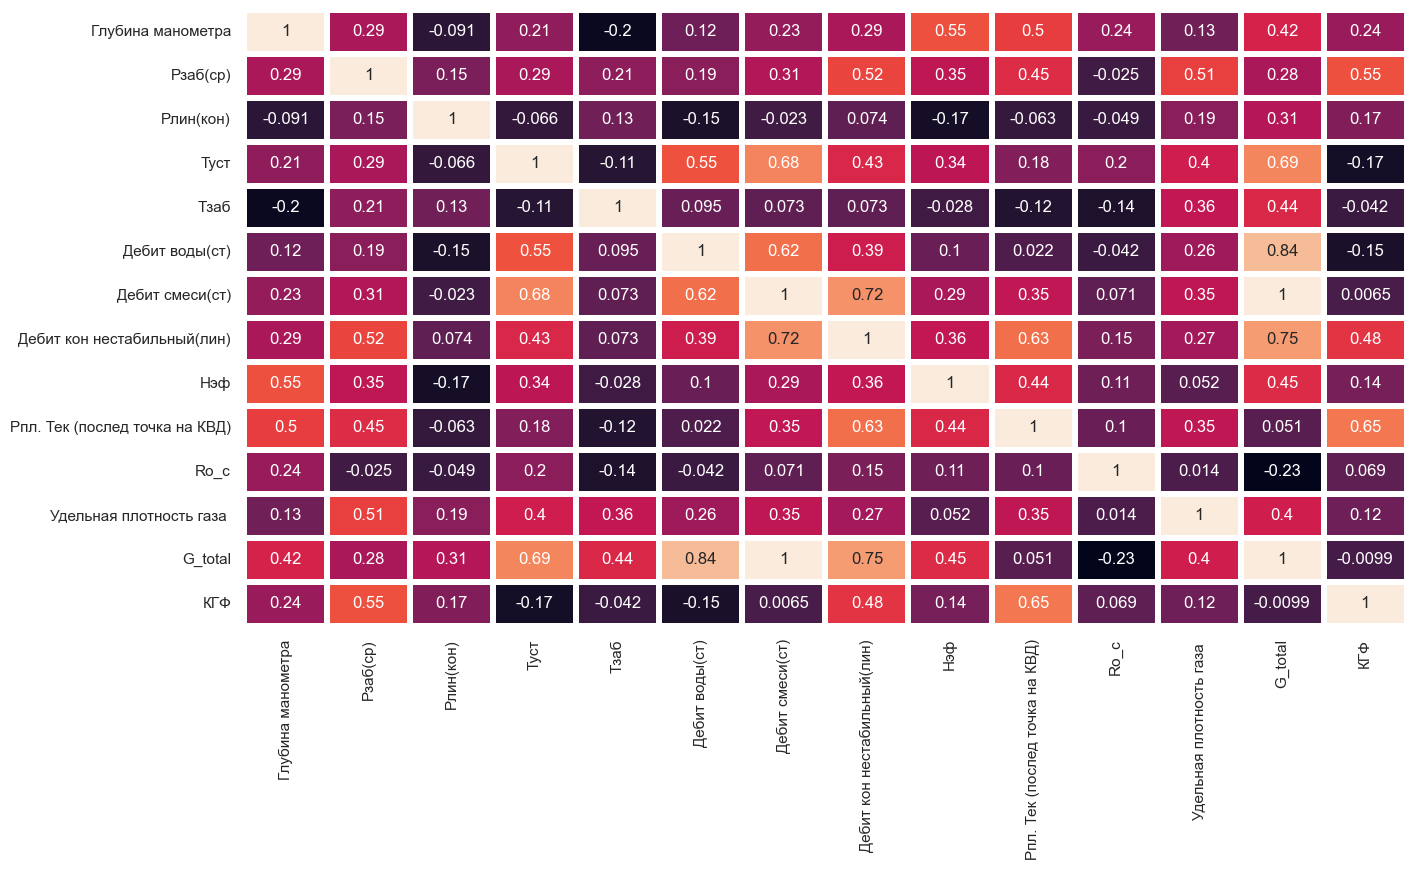

In [33]:
df = df.drop(['Дебит ст. конд.(ст)', 'Дебит воды(лин)', 'Дебит газа(ст)', 'Дебит газа(лин)','Tлин', 'Тна шлейфе', 'Pлин(ср)'], axis=1)
sns.heatmap(df.corr(), annot=True, linewidths=3, cbar=False)

Глубина манометра                 0.006018
Рзаб(ср)                          0.003024
Рлин(кон)                         0.005146
Туст                              0.005598
Тзаб                              0.020895
Дебит воды(ст)                    0.001820
Дебит смеси(ст)                   0.002530
Дебит кон нестабильный(лин)       0.005300
Нэф                               0.002429
Рпл. Тек (послед точка на КВД)    0.858392
Ro_c                              0.042220
Удельная плотность газа           0.046629
dtype: float64

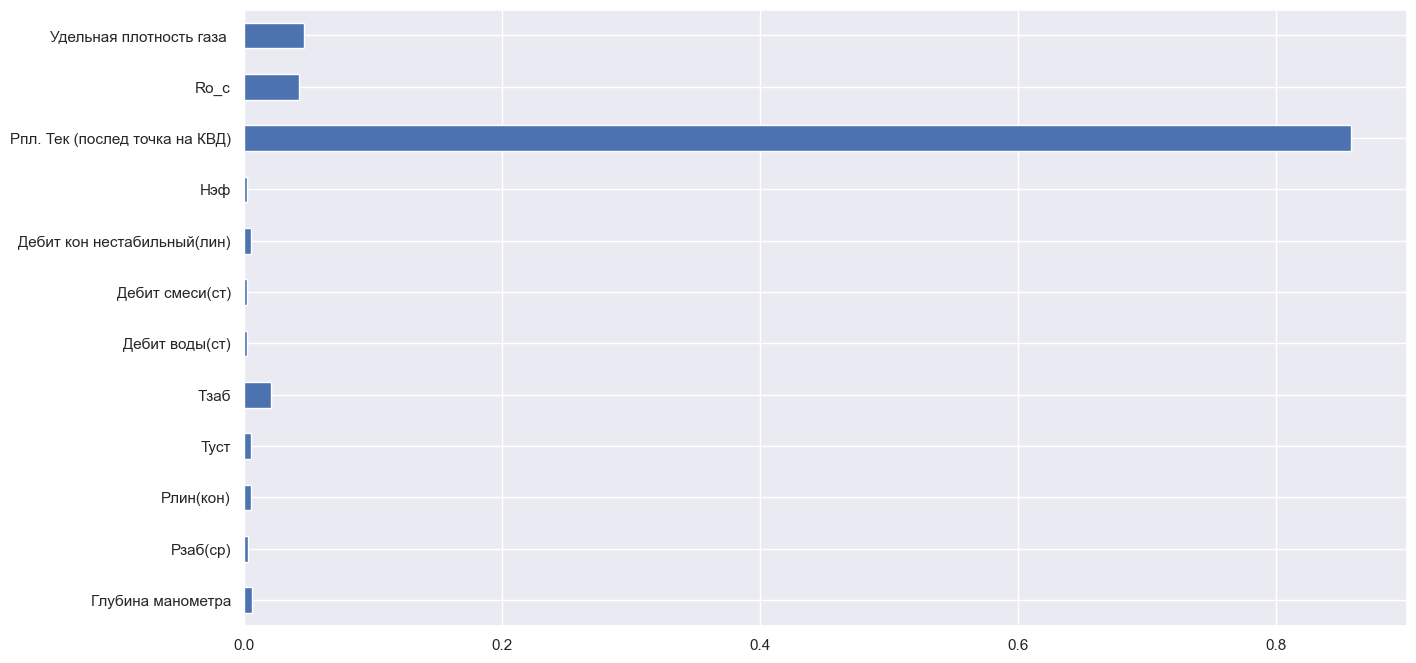

In [34]:
df1=df.fillna(-100)
X=df1.iloc[:, 0:12]
Y=df1.iloc[:, 12]
regr = RandomForestRegressor(max_depth=20, random_state=12341234)
regr.fit(X, Y)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
feat_importances

Глубина манометра                 0.020641
Рзаб(ср)                          0.096396
Рлин(кон)                         0.029679
Туст                              0.049493
Тзаб                              0.023978
Дебит воды(ст)                    0.024874
Дебит смеси(ст)                   0.134284
Дебит кон нестабильный(лин)       0.030033
Нэф                               0.007910
Рпл. Тек (послед точка на КВД)    0.525412
Ro_c                              0.045383
Удельная плотность газа           0.011919
dtype: float64

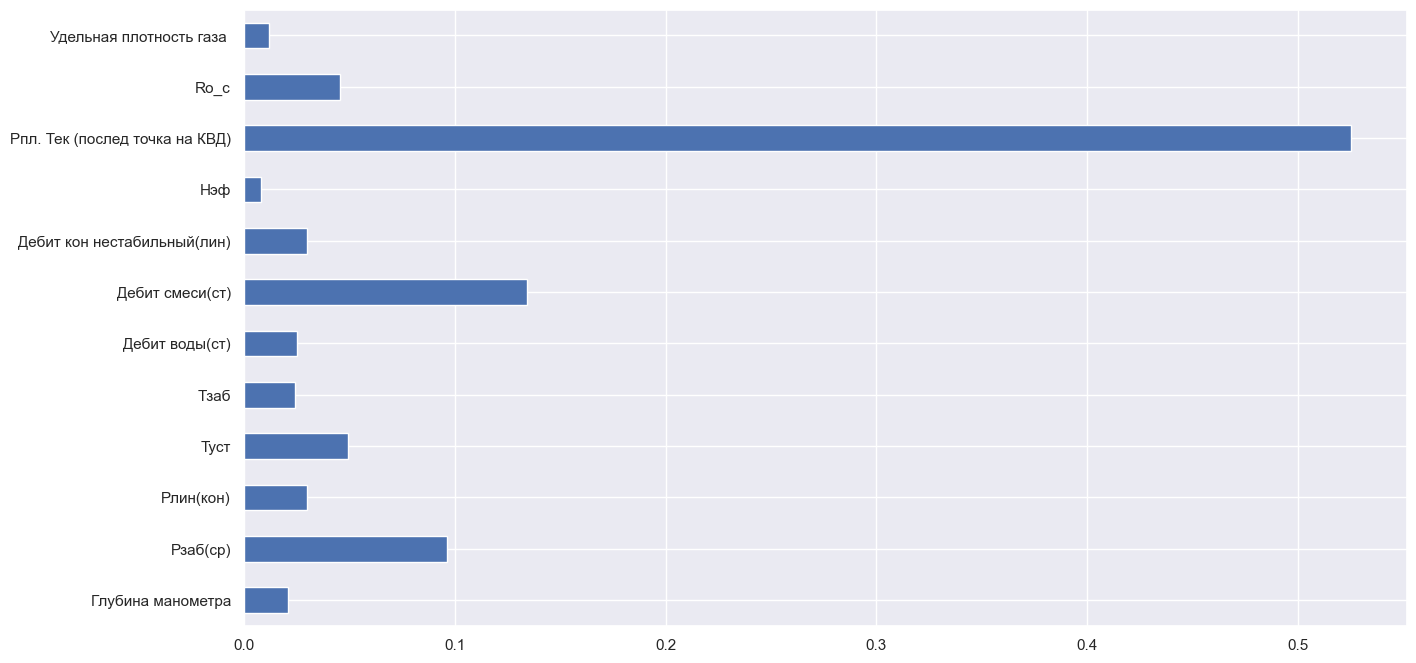

In [35]:
df1=df.fillna(-100)
X=df1.iloc[:, 0:12]
Y=df1.iloc[:, 13]
regr = RandomForestRegressor(max_depth=20, random_state=12341234)
regr.fit(X, Y)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
feat_importances

# Выводы

Наша задача оставить признаки, которые помогут в решении задачи.
1) Из трех признаков "Pпл. Тек" можно оставить "Pпл. Тек (послед точка на КВД)". У него меньше всего пропусков, высокая важность и неплохая корреляция с "КГФ". Остальные два удаляем
2) Подозрителен параметр "Dшт" который в целом при любых собственных значениях имеет одинаковое покрытие в КГФ, что может указывать на независимость от него и в предсказании он скорее всего не поможет. Для G_total график выглядит лучше, но из-за недостаточного объема данных однозначно не получится предсказываеть, имея например значение g_total близкое к 6 на 4 значениях Dшт. Скорее всего он работает вместе с другими признаками и feature_engineering с ним даст плоды.
3) признаки Pсб слабокореллируют с обоими целевыми переменнами по критерию пирсона, поэтому стоит удалить, не помогут в предсказании.
4) признаки Ro_w и Ro_g имели более 60 процентов пропусков, что послужило сигналу к удалению их
5) Очень явно между собой кореллируют Руст(ср) Руст(кон) Рзаб(ср) Рзаб(кон) и судя по названию одни из значений были взяты как среднее. В этой ситуации хочется избежать мультиколлинеарности по 4 признакам и оставить хотя бы 2, руст и рзаб между собой кореллируют, но с другими признаками ведут себя по-разному, так оставим признаки со средним значением (не просто так ведь они были составлены, почтим того, кто усреднял). также заметим, что и они между собой кореллируют, а значит из них можно оставить одну. Выбираем оставить Рзаб(ср) - сильнее кореллирует с целевой переменной.
6) заметим что Рлин(ср) и Рлин(кон) довольно сильно кореллируют, но при этом Рлин(кон) почти не кореллирует с другими признаками и кореллирует с целевой переменной сильнее, чем Рлин(ср), поэтому оставим Рлин(кон).
7) Имея выводы о значимости признака после рандомного леса и полученной большой коллинеарности между Тлин, Тна шлейфе и Туст - оставляем Туст. Также оставляем Тзаб, так как признак наименее похож на остальные и все равно может использоваться для предсказания G_total (корелляция с КГФ отсутствует).
8) Сразу бросается в глаза кореляция Дебит ст конд(ст) и Дебит кон нестабильный, у них она 0.88, оставляем 
Дебит кон нестабильный тк она сильнее влияет на целевую G_total
9) Дебит воды(ст) и дебит воды(лин) также почти одинаковые, оставляем дебит воды ст за большими значениями 
модуля кореляция
10) Максимальная кореляция среди Дебит газа(ст), Дебит газа(лин), Дебит смеси(ст), и у них высокая кореляция с G_total и они не коррелируют с КГФ. Оставляем Дебит смеси(ст)
11) под вопросом остается использование НЭФ тк рандомный лес указывает на наименьшую полезность этого признака